
## 1. 광탄성 실험의 이론적 배경

**1.1 광탄성 효과 (Photoelastic Effect)**

-  **정의**: 광탄성 효과는 투명한 재료에 외부 하중이 가해졌을 때 재료 내부에 발생하는 응력 분포를 편광된 빛을 통해 관찰할 수 있는 현상입니다.
-  **원리**: 편광된 빛이 응력을 받은 광탄성 재료를 통과할 때, 응력 상태에 따라 재료 내부에서 빛의 속도가 변하게 됩니다. 이로 인해 빛의 경로 차이가 발생하며, 이는 이색성(birefringence) 현상으로 나타납니다.
-  **응력 광도법**: 광탄성 실험에서는 편광기와 분석기를 사용하여 이색성으로 인한 간섭 무늬를 관찰하고, 이를 통해 응력의 크기와 방향을 분석합니다.

**1.2 응력\-광학 법칙 (Stress\-Optic Law)**

-  **수식**: 광탄성 재료에서 발생하는 이색성은 재료 내부의 주응력 차이에 비례합니다. 이 관계는 응력\-광학 법칙으로 표현됩니다.

$$\Delta n=C(\sigma_1 -\sigma_2 )$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 여기서,

-  $\Delta n$ : 재료 내부에서 발생하는 이색성 (쌍굴절 정도)
-  C : 광탄성 상수 (Stress\-Optic Coefficient)
-  $\sigma_1 ,\sigma_2$ : 재료 내부의 주응력
-  **응력 광도식**: 실제로 광탄성 실험에서 관찰되는 빛의 간섭 무늬는 재료의 두께와 광탄성 상수에 따라 결정됩니다. 이를 응력 광도식으로 나타낼 수 있습니다.

 $\Delta =\lambda Ct(\sigma 1-\sigma 2)$ �


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 여기서,

-  $\Delta$ : 빛의 위상차 (Interference Order)
-  $t$ : 재료의 두께
-  $\lambda$ : 빛의 파장
## 2. ABAQUS를 이용한 광탄성 모델링
#### **균열이 있는 복합 재료 판의 응력 집중 분석**
-  **모델 설명**:
-  재료: 복합 재료 판(예: 유리 섬유 복합재).
-  크기: 100mm x 100mm의 판에 중앙에 20mm 길이의 균열.
-  균열 방향: 판의 가로 방향으로 진행.
-  하중: 판의 상단과 하단에 압축 하중이 가해짐.
-  **모델링 및 해석 과정**:
-  ABAQUS를 사용하여 복합 재료 판을 모델링하고, 균열 주변의 응력 분포를 계산.
-  MATLAB을 사용하여 ABAQUS에서 얻은 응력 분포 데이터를 시각화.



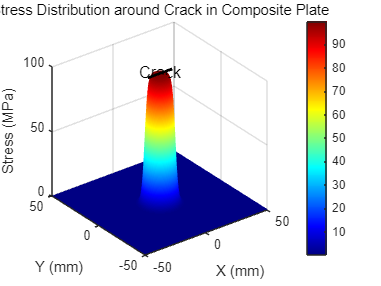

In [1]:
% 균열이 있는 복합재료 판의 응력 분포 시각화
% 데이터를 가정하여 생성

% 판의 크기 및 균열 위치 설정
L = 100; % 판의 길이 (mm)
W = 100; % 판의 너비 (mm)
crack_length = 20; % 균열 길이 (mm)

% 좌표 생성
x = linspace(-L/2, L/2, 200);
y = linspace(-W/2, W/2, 200);
[X, Y] = meshgrid(x, y);

% 균열 주변의 응력 분포를 가정한 함수 (실제 데이터에 따라 수정 필요)
% 실제 상황에서는 ABAQUS의 결과를 불러와서 사용
stress = @(X, Y) 100 ./ (1 + exp(sqrt(X.^2 + Y.^2) - crack_length/2));

% 응력 분포 계산
Z = stress(X, Y);

% 3D 시각화
figure;
surf(X, Y, Z);
colormap('jet');
shading interp;
xlabel('X (mm)');
ylabel('Y (mm)');
zlabel('Stress (MPa)');
title('Stress Distribution around Crack in Composite Plate');
colorbar;
view(3);

% 균열의 위치를 강조
hold on;
plot3([-crack_length/2, crack_length/2], [0, 0], [max(Z(:)), max(Z(:))], 'k-', 'LineWidth', 2);
text(0, 0, max(Z(:)), 'Crack', 'Color', 'k', 'FontSize', 12, 'HorizontalAlignment', 'center');
hold off;

-  이 시각화는 균열이 있는 복합 재료 판에서 발생하는 응력 분포를 보여줍니다.
-  균열 주변의 응력이 집중되는 영역을 시각적으로 확인할 수 있으며, 이는 실제 설계 및 분석에서 중요한 정보를 제공합니다.
## 다리 모델
-  **구조물**: 다리 모형은 양단에 지지되는 단순 지지 보로 모델링됩니다.
-  **하중**: 트럭이 지나갈 때 발생하는 하중은 등분포 하중으로 간주합니다.
-  **시각화**: 다리와 하중을 3D로 시각화하여 구조물에 작용하는 힘을 보여줍니다


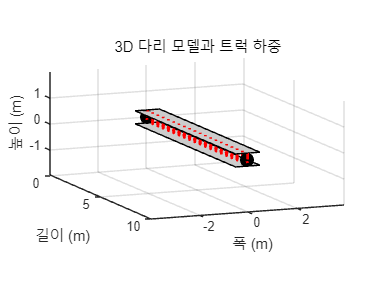

In [2]:
% 보의 길이 및 높이 설정
L = 10; % 보의 길이 (m)
W = 1; % 보의 폭 (m)
H = 0.5; % 보의 높이 (m)

% 하중 설정
P = 2000; % 트럭의 등분포 하중 (N/m)

% 3D 보의 좌표 설정
x = linspace(0, L, 100);
y = [-W/2, W/2];
z = [-H/2, H/2];

% 3D 보 그리기
[X, Y] = meshgrid(x, y);
Z1 = ones(size(X)) * H/2;
Z2 = ones(size(X)) * -H/2;

figure;
hold on;
% 윗면 그리기
surf(X, Y, Z1, 'FaceColor', [0.8 0.8 0.8], 'EdgeColor', 'none');
% 아랫면 그리기
surf(X, Y, Z2, 'FaceColor', [0.8 0.8 0.8], 'EdgeColor', 'none');
% 측면 그리기
fill3([0 0 L L], [-W/2 W/2 W/2 -W/2], [-H/2 -H/2 -H/2 -H/2], [0.8 0.8 0.8]);
fill3([0 0 L L], [-W/2 W/2 W/2 -W/2], [H/2 H/2 H/2 H/2], [0.8 0.8 0.8]);

% 하중 시각화 (등분포 하중을 화살표로 표시)
n_arrows = 20; % 화살표 개수
arrow_x = linspace(0, L, n_arrows);
arrow_y = zeros(size(arrow_x));
arrow_z = H/2 * ones(size(arrow_x));

% 화살표 길이 설정
arrow_length = 0.5;
for i = 1:n_arrows
    quiver3(arrow_x(i), arrow_y(i), arrow_z(i), 0, 0, -arrow_length, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);
end

% 지지점 표시
plot3(0, 0, 0, 'ko', 'MarkerSize', 10, 'MarkerFaceColor', 'k'); % A점 (고정단)
plot3(L, 0, 0, 'ko', 'MarkerSize', 10, 'MarkerFaceColor', 'k'); % B점 (자유단)

% 축 및 제목 설정
xlabel('길이 (m)');
ylabel('폭 (m)');
zlabel('높이 (m)');
title('3D 다리 모델과 트럭 하중');
axis equal;
view(3);
grid on;
hold off;

view([67.64 10.19])

-  **실제 구조물**: 교각 위에 트럭이 지나가면서 교각이 하중을 받는 상황을 나타냅니다.
-  **모델링된 구조물**: 트럭이 교각을 지날 때, 특정 교각 1개에 작용하는 하중을 단순 지지 보로 모델링했습니다. 여러 개의 하중이 보에 작용하는 것으로 간주하여 모델링되었습니다.


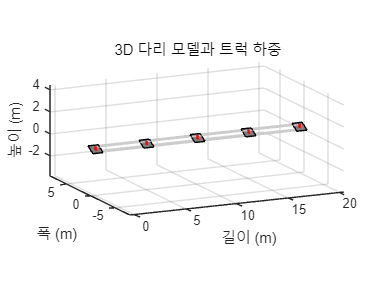

In [3]:
% 교각과 보의 길이 및 하중 설정
bridge_length = 20; % 교각 길이 (m)
bridge_width = 1; % 교각 폭 (m)
bridge_height = 0.5; % 교각 높이 (m)
num_piers = 5; % 교각의 개수

% 하중 설정
truck_load = 1000; % 트럭의 집중 하중 (N)
load_positions = linspace(0, bridge_length, num_piers); % 하중이 작용하는 위치

% 교각 및 보의 3D 모델 생성
figure;
hold on;
grid on;

% 교각 그리기
for i = 1:num_piers
    fill3([load_positions(i)-0.5 load_positions(i)+0.5 load_positions(i)+0.5 load_positions(i)-0.5], ...
          [-bridge_width/2 -bridge_width/2 bridge_width/2 bridge_width/2], ...
          [0 0 bridge_height bridge_height], [0.5 0.5 0.5]);
end

% 보 그리기
[x, y] = meshgrid(linspace(0, bridge_length, 100), [-bridge_width/2, bridge_width/2]);
z_top = bridge_height * ones(size(x));
z_bottom = zeros(size(x));

% 윗면
surf(x, y, z_top, 'FaceColor', [0.8 0.8 0.8], 'EdgeColor', 'none');
% 아랫면
surf(x, y, z_bottom, 'FaceColor', [0.8 0.8 0.8], 'EdgeColor', 'none');

% 하중 시각화 (집중 하중을 화살표로 표시)
for i = 1:num_piers
    quiver3(load_positions(i), 0, bridge_height, 0, 0, -0.5, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);
end

% 축 및 제목 설정
xlabel('길이 (m)');
ylabel('폭 (m)');
zlabel('높이 (m)');
title('3D 다리 모델과 트럭 하중');
axis equal;
view(3);
hold off;

view([-25.58 13.32])

-  **실제 구조물**: 교각 밑에 트럭이 지날 때 발생하는 진동을 흡수하기 위한 탄성 고무판이 설치되어 있습니다.
-  **모델링된 구조물**: 트럭이 지날 때 발생하는 진동을 구조 진동 해석으로 모델링했습니다. 스프링\-질량\-감쇠 시스템으로 표현하여 트럭 하중으로 인한 진동을 분석합니다.
-  m: 교각의 질량
-  k: 스프링 상수
-  u: 변위
-  $P(t)$ : 시간에 따라 변화하는 트럭의 동적 하중

**\- 구조 진동 해석 이론**

-  **스프링\-질량 시스템**:
-  시스템을 단순화하여 스프링\-질량\-감쇠 시스템으로 모델링할 수 있습니다.
-  시스템의 동적 방정식은 다음과 같이 표현됩니다:

$$\ddot{u} +c\dot{u} +ku=P(t)$$

여기서,

-  m: 질량
-  c: 감쇠 계수 (여기서는 감쇠 요소를 간단히 하기 위해 무시할 수 있습니다)
-  k: 스프링 상수
-  u: 변위
-  $P(t)$ : 시간에 따른 외부 하중 (트럭 하중)


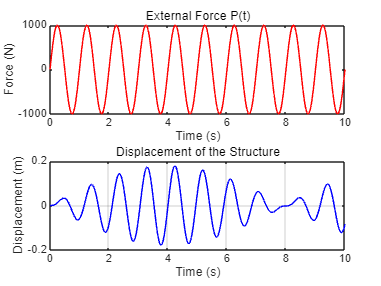

In [4]:
% 시스템 매개변수 설정
m = 1000; % 질량 (kg)
k = 50000; % 스프링 상수 (N/m)
c = 0; % 감쇠 계수 (N·s/m), 단순화를 위해 감쇠 요소는 무시

% 트럭 하중 (진동을 유발하는 외력)
P0 = 1000; % 최대 하중 (N)
omega = 2 * pi * 1; % 트럭 하중의 주파수 (rad/s)

% 외력 함수 정의
P = @(t) P0 * sin(omega * t);

% 시간 설정
tspan = [0 10]; % 시뮬레이션 시간 (0 ~ 10초)
u0 = [0 0]; % 초기 조건 [변위, 속도]

% 시스템의 미분 방정식 정의
odefun = @(t, u) [u(2); (P(t) - k * u(1) - c * u(2)) / m];

% 미분 방정식 풀기
[t, u] = ode45(odefun, tspan, u0);

% 결과 시각화
figure;
subplot(2,1,1);
plot(t, P(t), 'r-');
xlabel('Time (s)');
ylabel('Force (N)');
title('External Force P(t)');

subplot(2,1,2);
plot(t, u(:,1), 'b-');
xlabel('Time (s)');
ylabel('Displacement (m)');
title('Displacement of the Structure');
grid on;

-  첫 번째 그래프: 시간에 따른 외력 P(t)의 변화를 시각화합니다.
-  두 번째 그래프: 구조물의 변위가 시간에 따라 어떻게 변화하는지 보여줍니다.
## **주차장 바닥구조**

**구조 모델링 및 시각화**


승용차의 하중을 받는 주차장 바닥 구조를 간단히 보와 슬래브로 모델링하고, 이 하중을 구조 해석하는 방법을 설명하겠습니다.


**\- 이론적 모델링**

-  **보와 슬래브 모델**:
-  주차장 바닥을 보와 슬래브 구조로 단순화합니다.
-  승용차의 하중은 보 위의 특정 지점에 집중 하중으로 작용한다고 가정합니다.
-  **하중 분포**:
-  승용차의 하중은 차량의 무게를 네 바퀴로 분산하여 보의 여러 지점에 작용하는 집중 하중으로 표현할 수 있습니다.


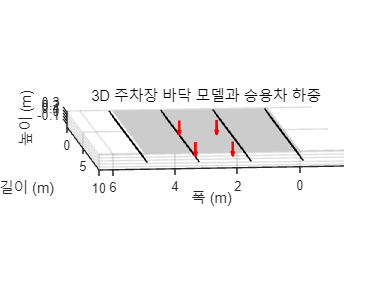

In [5]:
% 주차장 바닥의 크기 설정
slab_length = 10; % 슬래브 길이 (m)
slab_width = 5; % 슬래브 폭 (m)
slab_thickness = 0.3; % 슬래브 두께 (m)

% 보와 슬래브의 위치 설정
num_beams = 4; % 보의 개수
beam_positions = linspace(0, slab_width, num_beams); % 보 위치

% 승용차 하중 설정
car_load = 5000; % 승용차의 총 하중 (N)
num_wheels = 4; % 바퀴 수
wheel_load = car_load / num_wheels; % 각 바퀴에 작용하는 하중

% 승용차 바퀴 위치 (슬래브 위에서 분포)
wheel_positions = [slab_length/4, 3*slab_length/4]; % x축 방향
wheel_offset = 1.2; % y축 방향 오프셋 (m)

% 3D 슬래브 및 보 그리기
figure;
hold on;
grid on;

% 슬래브 윗면 그리기
[x, y] = meshgrid(linspace(0, slab_length, 50), linspace(0, slab_width, 10));
z = slab_thickness * ones(size(x));
surf(x, y, z, 'FaceColor', [0.8 0.8 0.8], 'EdgeColor', 'none');

% 보 그리기
for i = 1:num_beams
    fill3([0 slab_length slab_length 0], ...
          [beam_positions(i)-0.1 beam_positions(i)-0.1 beam_positions(i)+0.1 beam_positions(i)+0.1], ...
          [0 0 slab_thickness slab_thickness], [0.6 0.6 0.6]);
end

% 승용차 하중 시각화 (집중 하중을 화살표로 표시)
for i = 1:length(wheel_positions)
    for j = [-1, 1]
        wheel_x = wheel_positions(i);
        wheel_y = slab_width/2 + j * wheel_offset / 2;
        quiver3(wheel_x, wheel_y, slab_thickness, 0, 0, -0.5, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);
    end
end

% 축 및 제목 설정
xlabel('길이 (m)');
ylabel('폭 (m)');
zlabel('높이 (m)');
title('3D 주차장 바닥 모델과 승용차 하중');
axis equal;
view(3);
hold off;

## **건축구조물**
-  **실제 구조물**: 바람(폭풍, 충격파 등)이 구조물에 작용하여 구조물이 흔들리는 상황을 보여줍니다. 이때 구조물에 작용하는 외부 하중은 시간에 따라 변할 수 있습니다.
-  **모델링된 구조물**: 바람이 구조물에 영향을 줄 때의 진동을 스프링\-질량 시스템으로 모델링했습니다.
-  m: 구조물의 질량
-  k: 스프링 상수, 구조물의 복원력
-  P(t): 시간에 따라 변하는 외부 하중 (바람의 힘)

**\- 구조 진동 해석 이론**

-  **스프링\-질량 시스템**:
-  시스템을 단순화하여 스프링\-질량 시스템으로 모델링할 수 있습니다.
-  시스템의 동적 방정식은 다음과 같이 표현됩니다:

$$m\ddot{u} +c\dot{u} +ku=P(t)$$

여기서,

-  m: 질량
-  c: 감쇠 계수
-  k: 스프링 상수
-  u: 변위
-  P(t): 시간에 따른 외부 하중 (바람에 의한 힘)


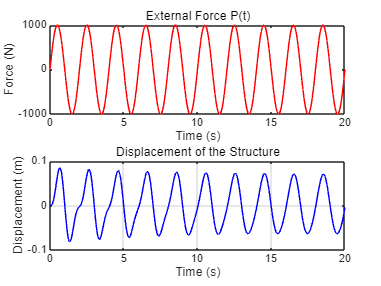

In [6]:
% 시스템 매개변수 설정
m = 500; % 질량 (kg)
k = 20000; % 스프링 상수 (N/m)
c = 100; % 감쇠 계수 (N·s/m)

% 바람에 의한 외력 (진동을 유발하는 외력)
P0 = 1000; % 최대 하중 (N)
omega = 2 * pi * 0.5; % 바람 하중의 주파수 (rad/s)

% 외력 함수 정의
P = @(t) P0 * sin(omega * t);

% 시간 설정
tspan = [0 20]; % 시뮬레이션 시간 (0 ~ 20초)
u0 = [0 0]; % 초기 조건 [변위, 속도]

% 시스템의 미분 방정식 정의
odefun = @(t, u) [u(2); (P(t) - k * u(1) - c * u(2)) / m];

% 미분 방정식 풀기
[t, u] = ode45(odefun, tspan, u0);

% 결과 시각화
figure;
subplot(2,1,1);
plot(t, P(t), 'r-');
xlabel('Time (s)');
ylabel('Force (N)');
title('External Force P(t)');

subplot(2,1,2);
plot(t, u(:,1), 'b-');
xlabel('Time (s)');
ylabel('Displacement (m)');
title('Displacement of the Structure');
grid on;

-  **외력 P****(****t****)**: 바람에 의한 힘이 시간에 따라 어떻게 변하는지 보여줍니다.
-  **구조물 변위**: 바람에 의해 구조물이 어떻게 진동하는지, 그리고 시간이 지남에 따라 진동이 어떻게 감쇠되는지를 나타냅니다.
## **타워 구조물**
-  **실제 구조물**: 타워 구조물이 바람에 의해 영향을 받는 상황을 나타냅니다. 바람이 구조물에 작용하여 진동이 발생할 수 있습니다.
-  **모델링된 구조물**: 타워 구조물을 단순화하여 스프링\-질량 시스템으로 모델링했습니다.
-  m: 타워의 질량
-  k: 스프링 상수, 구조물의 복원력
-  P(t): 시간에 따라 변하는 바람에 의한 외부 하중
-  u: 변위

**\- 구조 진동 해석 이론**

-  **스프링\-질량 시스템**:
-  타워 구조물을 단순화하여 스프링\-질량 시스템으로 모델링할 수 있습니다.
-  시스템의 동적 방정식은 다음과 같이 표현됩니다:

$$m\ddot{u} +c\dot{u} +ku=P(t)$$

여기서,

-  m: 타워의 질량
-  c: 감쇠 계수 (여기서는 무시 가능)
-  k: 스프링 상수
-  u: 변위
-  P(t): 시간에 따른 바람에 의한 외부 하중


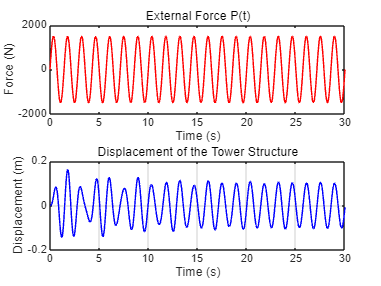

In [7]:
% 시스템 매개변수 설정
m = 800; % 타워의 질량 (kg)
k = 30000; % 스프링 상수 (N/m)
c = 200; % 감쇠 계수 (N·s/m)

% 바람에 의한 외력 (진동을 유발하는 외력)
P0 = 1500; % 최대 하중 (N)
omega = 2 * pi * 0.7; % 바람 하중의 주파수 (rad/s)

% 외력 함수 정의
P = @(t) P0 * sin(omega * t);

% 시간 설정
tspan = [0 30]; % 시뮬레이션 시간 (0 ~ 30초)
u0 = [0 0]; % 초기 조건 [변위, 속도]

% 시스템의 미분 방정식 정의
odefun = @(t, u) [u(2); (P(t) - k * u(1) - c * u(2)) / m];

% 미분 방정식 풀기
[t, u] = ode45(odefun, tspan, u0);

% 결과 시각화
figure;
subplot(2,1,1);
plot(t, P(t), 'r-');
xlabel('Time (s)');
ylabel('Force (N)');
title('External Force P(t)');

subplot(2,1,2);
plot(t, u(:,1), 'b-');
xlabel('Time (s)');
ylabel('Displacement (m)');
title('Displacement of the Tower Structure');
grid on;

-  첫 번째 그래프: 시간에 따른 바람에 의한 외력 P(t)P(t)P(t)의 변화를 시각화합니다.
-  두 번째 그래프: 타워의 변위가 시간에 따라 어떻게 변화하는지 보여줍니다.
## **노량대교와 구조 모델링**

노량대교와 같은 현수교(Suspension Bridge)는 다음과 같은 주요 요소로 구성됩니다.

-  **주탑**: 교량의 양 끝 또는 중간에 위치하여 메인 케이블을 지지하는 역할을 합니다.
-  **메인 케이블**: 주탑에 연결되어 교량의 데크(Bridge Deck)를 지지합니다.
-  **데크(Bridge Deck)**: 교통량을 지지하는 부분이며, 차량, 바람, 지진 등의 하중이 작용합니다.
-  **보강 케이블 및 행어(Hanger)**: 데크와 메인 케이블을 연결하여 하중을 분산시키는 역할을 합니다.


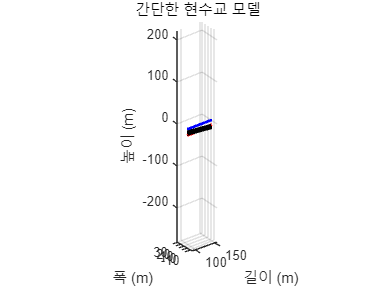

In [8]:
% 교량의 크기 설정
bridge_length = 200; % 교량 길이 (m)
bridge_height = 20; % 주탑 높이 (m)
cable_sag = 15; % 케이블의 처짐 (m)

% 교량과 케이블의 좌표 설정
x = linspace(0, bridge_length, 100);
y = zeros(size(x));
z = -cable_sag * (1 - 4 * (x - bridge_length/2).^2 / bridge_length^2); % 포물선 형태

% 주탑 좌표
tower_x = [0, bridge_length];
tower_y = [0, 0];
tower_z = [0, -bridge_height];

% 3D 교량 모델 그리기
figure;
hold on;
grid on;

% 케이블 그리기
plot3(x, y, z, 'r-', 'LineWidth', 2);

% 주탑 그리기
plot3(tower_x, tower_y, tower_z, 'k-', 'LineWidth', 4);
plot3([tower_x(1), tower_x(1)], [0, 0], [-bridge_height, 0], 'k-', 'LineWidth', 4);
plot3([tower_x(2), tower_x(2)], [0, 0], [-bridge_height, 0], 'k-', 'LineWidth', 4);

% 교량 데크 그리기
plot3([0, bridge_length], [0, 0], [z(1), z(end)], 'b-', 'LineWidth', 2);

% 축 및 제목 설정
xlabel('길이 (m)');
ylabel('폭 (m)');
zlabel('높이 (m)');
title('간단한 현수교 모델');
axis equal;
view(3);
hold off;

##  **트러스 구조**
-  **공간 트러스**:
-  공간 트러스는 삼각형 요소로 구성된 3차원 구조입니다.
-  이러한 삼각형 요소는 구조에 대한 안정성과 강성을 제공하며, 여러 방향의 하중에 대해 효율적으로 저항할 수 있습니다.
-  **구조적 특징**:
-  트러스 구조는 각 구성 요소가 축방향의 힘(압축 또는 인장)을 주로 받도록 설계되어 있습니다.
-  이로 인해 재료의 효율적인 사용이 가능하며, 구조의 무게를 줄일 수 있습니다.

**구조 해석**

-  **유한 요소 해석(FEA)**:
-  트러스 구조는 유한 요소 해석을 통해 각 구성 요소의 응력과 변위를 계산할 수 있습니다.
-  각 요소의 길이 변화, 연결점의 힘을 분석하여 구조물의 안정성과 강도를 평가할 수 있습니다.
-  **모델링**:
-  트러스 구조는 각 노드(결합점)와 요소(직선 부재)로 모델링됩니다.
-  하중과 경계 조건을 설정하여 구조물의 전체 응력 및 변위 분포를 계산합니다.


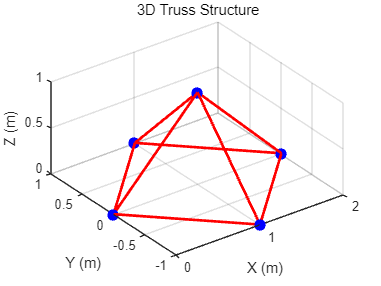

In [9]:
% 트러스의 노드 좌표
nodes = [
    0, 0, 0; % 노드 1
    1, 1, 0; % 노드 2
    2, 0, 0; % 노드 3
    1, -1, 0; % 노드 4
    1, 0, 1; % 노드 5
];

% 트러스의 요소 연결 (노드 인덱스)
elements = [
    1, 2;
    2, 3;
    3, 4;
    4, 1;
    1, 5;
    2, 5;
    3, 5;
    4, 5;
];

% 3D 트러스 모델 시각화
figure;
hold on;
grid on;

% 노드 그리기
plot3(nodes(:,1), nodes(:,2), nodes(:,3), 'bo', 'MarkerSize', 8, 'MarkerFaceColor', 'b');

% 요소 그리기
for i = 1:size(elements, 1)
    plot3([nodes(elements(i,1),1) nodes(elements(i,2),1)], ...
          [nodes(elements(i,1),2) nodes(elements(i,2),2)], ...
          [nodes(elements(i,1),3) nodes(elements(i,2),3)], 'r-', 'LineWidth', 2);
end

% 축 및 제목 설정
xlabel('X (m)');
ylabel('Y (m)');
zlabel('Z (m)');
title('3D Truss Structure');
view(3);
axis equal;
hold off;

view([-36.70 29.12])

## 이순신대교
-  **현수교의 기본 구조**에 트러스 구조를 적용하여, 교량의 데크 부분에 삼각형으로 구성된 트러스를 추가합니다.
-  교량의 강성을 높이고, 하중을 효과적으로 분산시킬 수 있도록 모델링합니다.


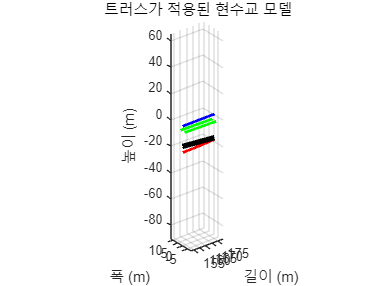

In [10]:
% 교량의 크기 설정
bridge_length = 300; % 교량 길이 (m)
bridge_height = 30; % 주탑 높이 (m)
cable_sag = 20; % 케이블의 처짐 (m)
num_truss_elements = 10; % 트러스 요소의 개수

% 교량과 케이블의 좌표 설정
x = linspace(0, bridge_length, 100);
y = zeros(size(x));
z = -cable_sag * (1 - 4 * (x - bridge_length/2).^2 / bridge_length^2); % 포물선 형태

% 주탑 좌표
tower_x = [0, bridge_length];
tower_y = [0, 0];
tower_z = [0, -bridge_height];

% 트러스 좌표 설정
truss_x = linspace(0, bridge_length, num_truss_elements+1);
truss_y_top = ones(size(truss_x)) * 2; % 상부 트러스 y 좌표
truss_y_bottom = -ones(size(truss_x)) * 2; % 하부 트러스 y 좌표
truss_z = z(1:numel(truss_x)); % 데크 높이에 위치

% 3D 교량 모델 그리기
figure;
hold on;
grid on;

% 케이블 그리기
plot3(x, y, z, 'r-', 'LineWidth', 2);

% 주탑 그리기
plot3(tower_x, tower_y, tower_z, 'k-', 'LineWidth', 4);
plot3([tower_x(1), tower_x(1)], [0, 0], [-bridge_height, 0], 'k-', 'LineWidth', 4);
plot3([tower_x(2), tower_x(2)], [0, 0], [-bridge_height, 0], 'k-', 'LineWidth', 4);

% 교량 데크 그리기
plot3([0, bridge_length], [0, 0], [z(1), z(end)], 'b-', 'LineWidth', 2);

% 트러스 그리기 (상부와 하부 연결)
for i = 1:num_truss_elements
    % 상부 트러스
    plot3([truss_x(i) truss_x(i+1)], [truss_y_top(i) truss_y_top(i+1)], [truss_z(i) truss_z(i+1)], 'g-', 'LineWidth', 2);
    % 하부 트러스
    plot3([truss_x(i) truss_x(i+1)], [truss_y_bottom(i) truss_y_bottom(i+1)], [truss_z(i) truss_z(i+1)], 'g-', 'LineWidth', 2);
    % 상부-하부 연결 트러스
    plot3([truss_x(i) truss_x(i)], [truss_y_top(i) truss_y_bottom(i)], [truss_z(i) truss_z(i)], 'g-', 'LineWidth', 2);
    plot3([truss_x(i+1) truss_x(i+1)], [truss_y_top(i+1) truss_y_bottom(i+1)], [truss_z(i+1) truss_z(i+1)], 'g-', 'LineWidth', 2);
end

% 축 및 제목 설정
xlabel('길이 (m)');
ylabel('폭 (m)');
zlabel('높이 (m)');
title('트러스가 적용된 현수교 모델');
axis equal;
view(3);
hold off;

<p style="text-align:left">
   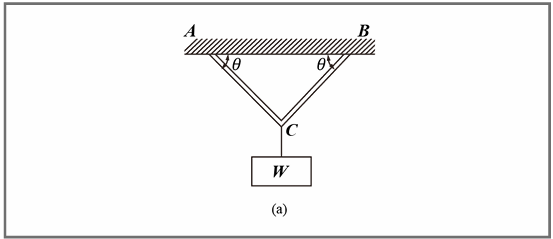
</p>


-  **부재 A****C****와 BC**:
-  두 부재는 위쪽에서 고정된 지점 A와 B에 연결되어 있습니다.
-  두 부재는 아래쪽의 지점 C에서 만납니다.
-  **하중**:
-  지점 C에서 무게 W인 물체를 지지하고 있습니다.
-  이로 인해 부재 AC와 BC에 인장력이 발생합니다.
-  **내력과 외력**:
-  부재의 내력은 물체의 무게 W를 지지하기 위해 작용하며, 이는 부재가 담당하는 하중을 통해 나타납니다.

**내력과 외력의 해석**


이 문제는 정역학을 사용하여 각 부재가 담당하는 하중을 구하는 예시입니다.


**1. 힘의 균형 방정식**

-  **수직 방향의 힘의 합이 0**:

$$T_{AC} \sin (\theta )+T_{BC} \sin (\theta )=W$$

여기서 $T_{AC}$ �와 $T_{BC}$ �는 각각 부재 AC와 BC에 작용하는 인장력입니다.

-  **수평 방향의 힘의 합이 0**:

$$T_{AC} \cos (\theta )=T_{BC} \cos (\theta )$$

이는 $T_{AC} =T_{BC}$ �를 의미하며, 두 부재에 동일한 크기의 인장력이 작용한다는 것을 나타냅니다.


**2. 부재의 인장력 계산**

-  위의 식을 이용하여 각 부재의 인장력 $T_{AC}$ �와 $T_{BC}$ 를 구할 수 있습니다.
-  예를 들어,

$$T_{AC} \sin (\theta )+T_{BC} \sin (\theta )=W$$

$$2T_{AC} \sin (\theta )=W$$

따라서,


 $T_{AC} =T_{BC} =\frac{W}{2\sin (\theta )}$ �


In [11]:
% 주어진 값
W = 1000; % 하중 (N)
theta_deg = 30; % 각도 (도)
theta = deg2rad(theta_deg); % 각도 (라디안)

% 각 부재에 걸리는 하중 계산
T = W / (2 * sin(theta));

% 결과 출력
fprintf('부재 AC와 BC에 걸리는 하중의 크기는 %.2f N입니다.\n', T);

부재 AC와 BC에 걸리는 하중의 크기는 1000.00 N입니다.


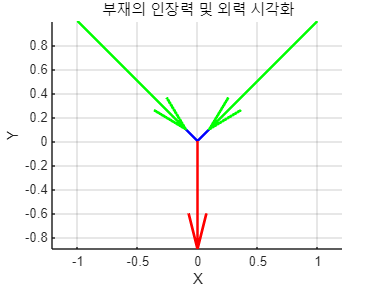

In [12]:

% 각도 설정 (라디안)
theta = pi / 4; % 45도

% 하중
W = 1000; % 무게 (N)

% 부재 인장력 계산
T = W / (2 * sin(theta));

% 부재 좌표 설정
A = [-1, 1]; % x 좌표
B = [1, 1];
C = [0, 0];

% 그림 그리기
figure;
hold on;
grid on;

% 부재 그리기
plot([A(1), C(1)], [A(2), C(2)], 'b-', 'LineWidth', 2);
plot([B(1), C(1)], [B(2), C(2)], 'b-', 'LineWidth', 2);

% 하중 그리기
quiver(C(1), C(2), 0, -W/1000, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);

% 인장력 그리기
quiver(A(1), A(2), cos(theta)*T/500, -sin(theta)*T/500, 'g', 'LineWidth', 2, 'MaxHeadSize', 1);
quiver(B(1), B(2), -cos(theta)*T/500, -sin(theta)*T/500, 'g', 'LineWidth', 2, 'MaxHeadSize', 1);

% 축 및 제목 설정
xlabel('X');
ylabel('Y');
title('부재의 인장력 및 외력 시각화');
axis equal;
hold off;

In [13]:

% 주어진 값
W = 1000; % 하중 (N)
theta_deg = 30; % 각도 (도)
theta = deg2rad(theta_deg); % 각도 (라디안)

% 내력 F 계산
F = W / (2 * sin(theta));

% 결과 출력
fprintf('부재 AC와 BC에 작용하는 내력의 크기는 %.2f N입니다.\n', F);

부재 AC와 BC에 작용하는 내력의 크기는 1000.00 N입니다.


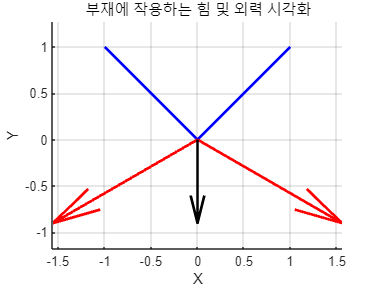

In [14]:
% 부재 좌표 설정
A = [-1, 1]; % x 좌표
B = [1, 1];
C = [0, 0];

% 그림 그리기
figure;
hold on;
grid on;

% 부재 그리기
plot([A(1), C(1)], [A(2), C(2)], 'b-', 'LineWidth', 2);
plot([B(1), C(1)], [B(2), C(2)], 'b-', 'LineWidth', 2);

% 힘 그리기
quiver(C(1), C(2), cos(theta)*F/500, -sin(theta)*F/500, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);
quiver(C(1), C(2), -cos(theta)*F/500, -sin(theta)*F/500, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);

% 외력 표시
quiver(C(1), C(2), 0, -W/1000, 'k', 'LineWidth', 2, 'MaxHeadSize', 1);

% 축 및 제목 설정
xlabel('X');
ylabel('Y');
title('부재에 작용하는 힘 및 외력 시각화');
axis equal;
hold off;

In [15]:

% 주어진 값
W = 1000; % 하중 (N)
theta_deg = 30; % 각도 (도)
theta = deg2rad(theta_deg); % 각도 (라디안)

% 인장력 F 계산
F = W / (2 * sin(theta));

% 결과 출력
fprintf('부재 AC와 BC에 작용하는 인장력의 크기는 %.2f N입니다.\n', F);

부재 AC와 BC에 작용하는 인장력의 크기는 1000.00 N입니다.


<p style="text-align:left">
   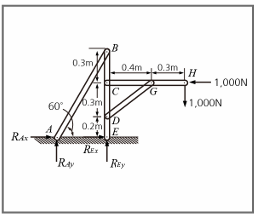
</p>


**문제 설명**

-  그림에서 여러 개의 부재가 A, B, C, D, E와 같은 지점에서 연결되어 있습니다.
-  지점 A와 E는 반력을 제공하는 지점입니다.
-  외력 1,000 N이 H 지점에서 수평 방향으로, G 지점에서 수직 방향으로 작용하고 있습니다.
-  부재에 작용하는 힘과 지점의 반력을 구하기 위해 구조물 전체에 대한 평형방정식을 적용해야 합니다.

**해결 방법**

1.  **구조물 전체에 대한 평형 방정식 적용**:

-  구조물은 정적 평형 상태에 있으므로, 모든 힘과 모멘트의 합은 0이 되어야 합니다.

1.  **반력 계산**:

-  먼저 지점 A와 E에서의 반력( $R_A$ �와 $R_E$ �)을 구합니다.

**평형 방정식**

-  **수평 방향의 힘의 합이 0**:

$$\sum F_x =0$$

-  **수직 방향의 힘의 합이 0**:

$$\sum F_y =0$$

-  **모멘트의 합이 0** (특정 지점을 기준으로):

$$\sum M=0$$

In [16]:

% 주어진 값
W1 = 1000; % 하중 1 (N) at point H
W2 = 1000; % 하중 2 (N) at point G
d1 = 0.9; % 거리 1 from A to H (m)
d2 = 1.2; % 거리 2 from A to G (m)

% 평형 방정식
% ∑M_A = 0
syms REy RAy
eq1 = RAy * d1 - W1 * 0.3 - W2 * 0.6 == 0;

% ∑Fy = 0
eq2 = RAy + REy - W1 - W2 == 0;

% 풀기
sol = solve([eq1, eq2], [RAy, REy]);

RAy = double(sol.RAy);
REy = double(sol.REy);

% 결과 출력
fprintf('지점 A에서의 수직 반력 RAy: %.2f N\n', RAy);

지점 A에서의 수직 반력 RAy: 1000.00 N

In [17]:
fprintf('지점 E에서의 수직 반력 REy: %.2f N\n', REy);

지점 E에서의 수직 반력 REy: 1000.00 N


<p style="text-align:left">
   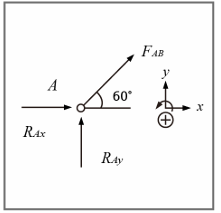
</p>


1.   **부재에 작용하는 힘** $F_{AB} :$

-  주어진 관계식에 따라 $F_{AB}$ 는 $R_{Ay}$ �의 성분을 통해 계산됩니다.
-  수식에서:

 $F_{AB} =-\frac{2}{\sqrt{3}}R_{Ay}$ �

-  $R_{Ay} =-433$ N을 대입하여 계산하면:

$$F_{AB} =-\frac{2}{\sqrt{3}}\times (-433)=\frac{2}{\sqrt{3}}\times 433\approx 500\;\textrm{N}$$

 **2. 수평 반력** $R_{Ax}$ **�**:

-  부재의 수평 방향 성분으로 인해 발생하는 반력으로,

$$R_{Ax} =-250\;\textrm{N}$$

-  이는 수평 방향에서의 평형을 유지하기 위한 반력을 나타냅니다.

 **3. 수평 반력** $R_{Ex}$ **�**:

-  $R_{Ex}$ 는 전체 구조물에서 수평 방향의 평형을 위해 필요한 반력입니다.

$$R_{Ex} =1000-R_{Ax} =1250\;\textrm{N}$$

**해석**

-  $F_{AB}$ **계산** :
-  부재에 작용하는 힘 $F_{AB}$ 는 $R_{Ay}$ 의 수직 성분을 통해 계산되었습니다. 이는 부재의 인장이나 압축 상태를 나타내며, 구조물의 안정성을 보장하기 위해 반드시 고려되어야 합니다.
-   **반력** $R_{Ax}$ **와** $R_{Ex}$ **�**:
-  $R_{Ax}$ 는 부재의 수평 성분에 대응하는 반력입니다. 이 값은 부재가 구조물에 가하는 수평 방향의 힘에 대해 구조물이 저항하는 정도를 나타냅니다.
-  $R_{Ex}$ �는 전체 구조물의 수평 방향에서 평형을 유지하기 위한 반력의 크기입니다. 이는 구조물의 지점에서 하중을 지지하는 데 필수적인 역할을 합니다.

In [18]:
% 주어진 값
RAy = -433; % 수직 반력 (N)
sqrt3 = sqrt(3);

% 부재에 작용하는 힘 F_AB 계산
FAB = (-2/sqrt3) * RAy;

% 수평 반력 RAx 계산
RAx = -250; % 주어진 값
REx = 1000 - RAx; % 수평 방향 평형

% 결과 출력
fprintf('부재 AB에 작용하는 힘 FAB: %.2f N\n', FAB);

부재 AB에 작용하는 힘 FAB: 499.99 N

In [19]:
fprintf('지점 A에서의 수평 반력 RAx: %.2f N\n', RAx);

지점 A에서의 수평 반력 RAx: -250.00 N

In [20]:
fprintf('지점 E에서의 수평 반력 REx: %.2f N\n', REx);

지점 E에서의 수평 반력 REx: 1250.00 N


<p style="text-align:left">
   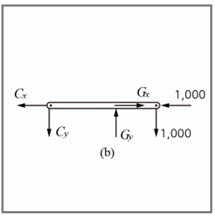
</p>


1.  **지점 G****에서의 반력**:

-  수직 반력 $G_y =1750N$
-  수평 반력 $G_x =2333N$

1.  **지점 C****에서의 반력**:

-  수직 반력 $C_y =-750N$
-  수평 반력 $C_x =-1333N$

1.   **지점** GG**G****의 전체 반력**: $G=\sqrt{G_y^2 +G_x^2 }=\sqrt{1750^2 +2333^2 }=2916\;\textrm{N}$

**해석**

-  **지점 G****에서의 반력**:
-  $G_y$ 는 지점 G에서의 수직 반력입니다.
-  $G_x$ 는 지점 G에서의 수평 반력으로, 주어진 하중에 대응하여 수평 방향의 평형을 유지하는 데 사용됩니다.
-  **지점 C****에서의 반력**:
-  $C_y$ 는 수직 반력으로, 구조물의 다른 부분에 작용하는 하중을 지지하고 있습니다.
-  $C_x$ 는 수평 반력으로, 구조물의 평형을 유지하기 위해 주어진 하중에 대응하고 있습니다.
-  **총 반력 G**:
-  G는 지점 G에서 작용하는 반력의 크기를 나타냅니다. 이는 피타고라스의 정리를 사용하여 계산되었습니다.
-  이 값은 부재의 하중을 지지하기 위한 총 반력의 크기입니다.

**추가 고려 사항**

-  그림에서 $C_x$ 와 $C_y$ 가 반대 방향으로 작용한다는 점을 고려하여 결과가 반영되었습니다.
-  이러한 반력 계산은 구조물의 안전성 및 안정성 분석을 위해 중요하며, 설계 시 부재의 강도와 크기를 결정하는 데 사용됩니다.

In [21]:
% 이미 계산된 값
Gy = 1750; % 수직 반력 Gy
Gx = 2333; % 수평 반력 Gx

% 지점 C의 반력 계산
Cy = -750;
Cx = -1333;

% 전체 반력 G 계산
G = sqrt(Gy^2 + Gx^2);

% 결과 출력
fprintf('지점 G에서의 수직 반력 Gy: %.2f N\n', Gy);

지점 G에서의 수직 반력 Gy: 1750.00 N

In [22]:
fprintf('지점 G에서의 수평 반력 Gx: %.2f N\n', Gx);

지점 G에서의 수평 반력 Gx: 2333.00 N

In [23]:
fprintf('지점 C에서의 수직 반력 Cy: %.2f N\n', Cy);

지점 C에서의 수직 반력 Cy: -750.00 N

In [24]:
fprintf('지점 C에서의 수평 반력 Cx: %.2f N\n', Cx);

지점 C에서의 수평 반력 Cx: -1333.00 N

In [25]:
fprintf('전체 반력 G의 크기: %.2f N\n', G);

전체 반력 G의 크기: 2916.40 N


<p style="text-align:left">
   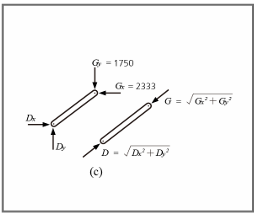
</p>


**부재 G****D****에 작용하는 힘의 구성 요소**

1.  **수직 성분 (** $G_y$ **)**:

-  $G_y =1750N$ 으로, 부재 GD에 작용하는 수직 방향의 힘입니다.
-  이 힘은 부재가 구조물에서 받는 수직 하중을 나타냅니다.

1.  **수평 성분 (** $G_x$ **)**:

-  $G_x =2333N$ 으로, 부재 GD에 작용하는 수평 방향의 힘입니다.
-  이 힘은 부재가 구조물에서 받는 수평 하중을 나타냅니다.

1.  **전체 힘 (G****)**:

-  부재 GD에 작용하는 전체 힘은 피타고라스의 정리를 통해 계산됩니다.

$$G=\sqrt{G_x^2 +G_y^2 }=\sqrt{2333^2 +1750^2 }\approx 2916\;\textrm{N}$$

**해석 및 계산**

-  **압축 부재에 작용하는 힘**:
-  부재 GD는 압축력을 받고 있으며, 이 힘은 $G_x$ ​와 $G_y$ ​로 분해되어 부재에 작용하는 총 힘을 결정합니다.
-  이 힘은 부재의 안정성을 보장하는 데 중요한 역할을 하며, 부재의 강도와 단면적을 결정하는 데 영향을 줍니다.
-  **힘의 분해**:
-  부재에 작용하는 전체 힘은 두 성분인 $G_x$ 와 $G_y$ 로 분해되며, 이는 구조물의 안정성을 평가하는 데 중요한 정보입니다.
-  이 두 성분은 구조물의 평형 상태를 유지하기 위해 필수적입니다.

In [26]:
% 주어진 값
Gx = 2333; % 수평 성분 (N)
Gy = 1750; % 수직 성분 (N)

% 전체 힘 계산
G = sqrt(Gx^2 + Gy^2);

% 결과 출력
fprintf('압축부재 GD에 작용하는 수평 힘 Gx: %.2f N\n', Gx);

압축부재 GD에 작용하는 수평 힘 Gx: 2333.00 N

In [27]:
fprintf('압축부재 GD에 작용하는 수직 힘 Gy: %.2f N\n', Gy);

압축부재 GD에 작용하는 수직 힘 Gy: 1750.00 N

In [28]:
fprintf('압축부재 GD에 작용하는 전체 힘 G: %.2f N\n', G);

압축부재 GD에 작용하는 전체 힘 G: 2916.40 N


**평형 조건에 따른 해석**

1.  **수평 및 수직 성분**:

-  부재의 평형 조건에 의해 $G_x =D_x$ 및 $G_y =D_y$ 가 성립합니다.
-  이는 부재가 평형 상태에 있으므로 수평과 수직 성분이 각각 동일하다는 것을 의미합니다.

1.  **모멘트 평형 방정식**:

-  D 지점에서의 모멘트 평형 방정식을 사용하여 수직 및 수평 성분 간의 관계를 도출합니다.
-  수식에서:

 $\sum M_D =0~~\Rightarrow ~~0.4G_y =0.3G_x$ ​

-  이를 변형하면,

 $\frac{G_y }{G_x }=\frac{3}{4}$ ​


**해석**

-  **모멘트 평형**:
-  모멘트 평형 방정식은 구조물에서 각 지점에서 발생하는 회전 효과를 고려한 것입니다.
-  이 방정식을 통해 수직 성분 $G_y$ ​와 수평 성분 $G_x$ 사이의 비율을 찾을 수 있습니다.
-  **힘의 분해와 관계**:
-  $G_x$ 와 $G_y$ 는 부재에 작용하는 힘을 각각 수평과 수직 성분으로 분해한 것입니다.
-  이 두 힘의 비율은 부재가 평형 상태를 유지하는 데 필요한 조건을 나타냅니다.

In [29]:
% 주어진 비율
ratio = 3/4;

% 수직 및 수평 성분의 비율 관계
syms Gx Gy
eq1 = Gy / Gx - ratio == 0;

% 방정식을 풀어서 Gy에 대한 표현식을 얻음
Gy_expr = solve(eq1, Gy);

% 수평 성분 Gx를 1로 가정하여 Gy 계산
Gx_val = 1; % 임의의 값
Gy_val = double(subs(Gy_expr, Gx, Gx_val)); % Gx_val을 대입하여 Gy 계산

% 결과 출력
fprintf('수평 성분 Gx: %.2f (임의의 비례값)\n', Gx_val);

수평 성분 Gx: 1.00 (임의의 비례값)

In [30]:
fprintf('수직 성분 Gy: %.2f\n', Gy_val);

수직 성분 Gy: 0.75

In [31]:
fprintf('Gy / Gx 비율: %.2f\n', Gy_val / Gx_val);

Gy / Gx 비율: 0.75




**두 힘 부재(Two\-Force Member)**

-  **정의**: 두 힘 부재는 부재의 양 끝에만 힘이 작용하는 경우를 말합니다. 이 부재에는 모멘트나 다른 외력이 작용하지 않고, 오직 두 점 사이에 힘만 작용합니다.
-  **특징**:
-  **크기**: 두 힘의 크기는 동일합니다.
-  **방향**: 두 힘의 방향은 반대입니다. 이는 부재가 평형 상태에 있기 위해 필요한 조건입니다.
-  **압축 또는 인장**: 부재에 작용하는 힘은 부재를 압축하거나 인장하는 방향으로 작용합니다.

**부재 G****D****의 힘 해석**

-  **압축 부재**: 주어진 그림에서 부재 GD는 압축력을 받고 있습니다.
-  $G_x$ 와 $G_y$ 는 부재 GD에 작용하는 힘의 수평 및 수직 성분입니다.
-  부재에 작용하는 이 두 힘의 합성 방향이 부재의 방향을 따라 작용하며, 이로 인해 부재가 압축됩니다.
-  **힘의 합성**:
-  부재의 두 끝에 작용하는 힘은 반대 방향으로 작용하며 크기가 같습니다.
-  이 두 힘의 합성은 부재의 중심을 향해 작용하는 압축력으로 나타납니다.


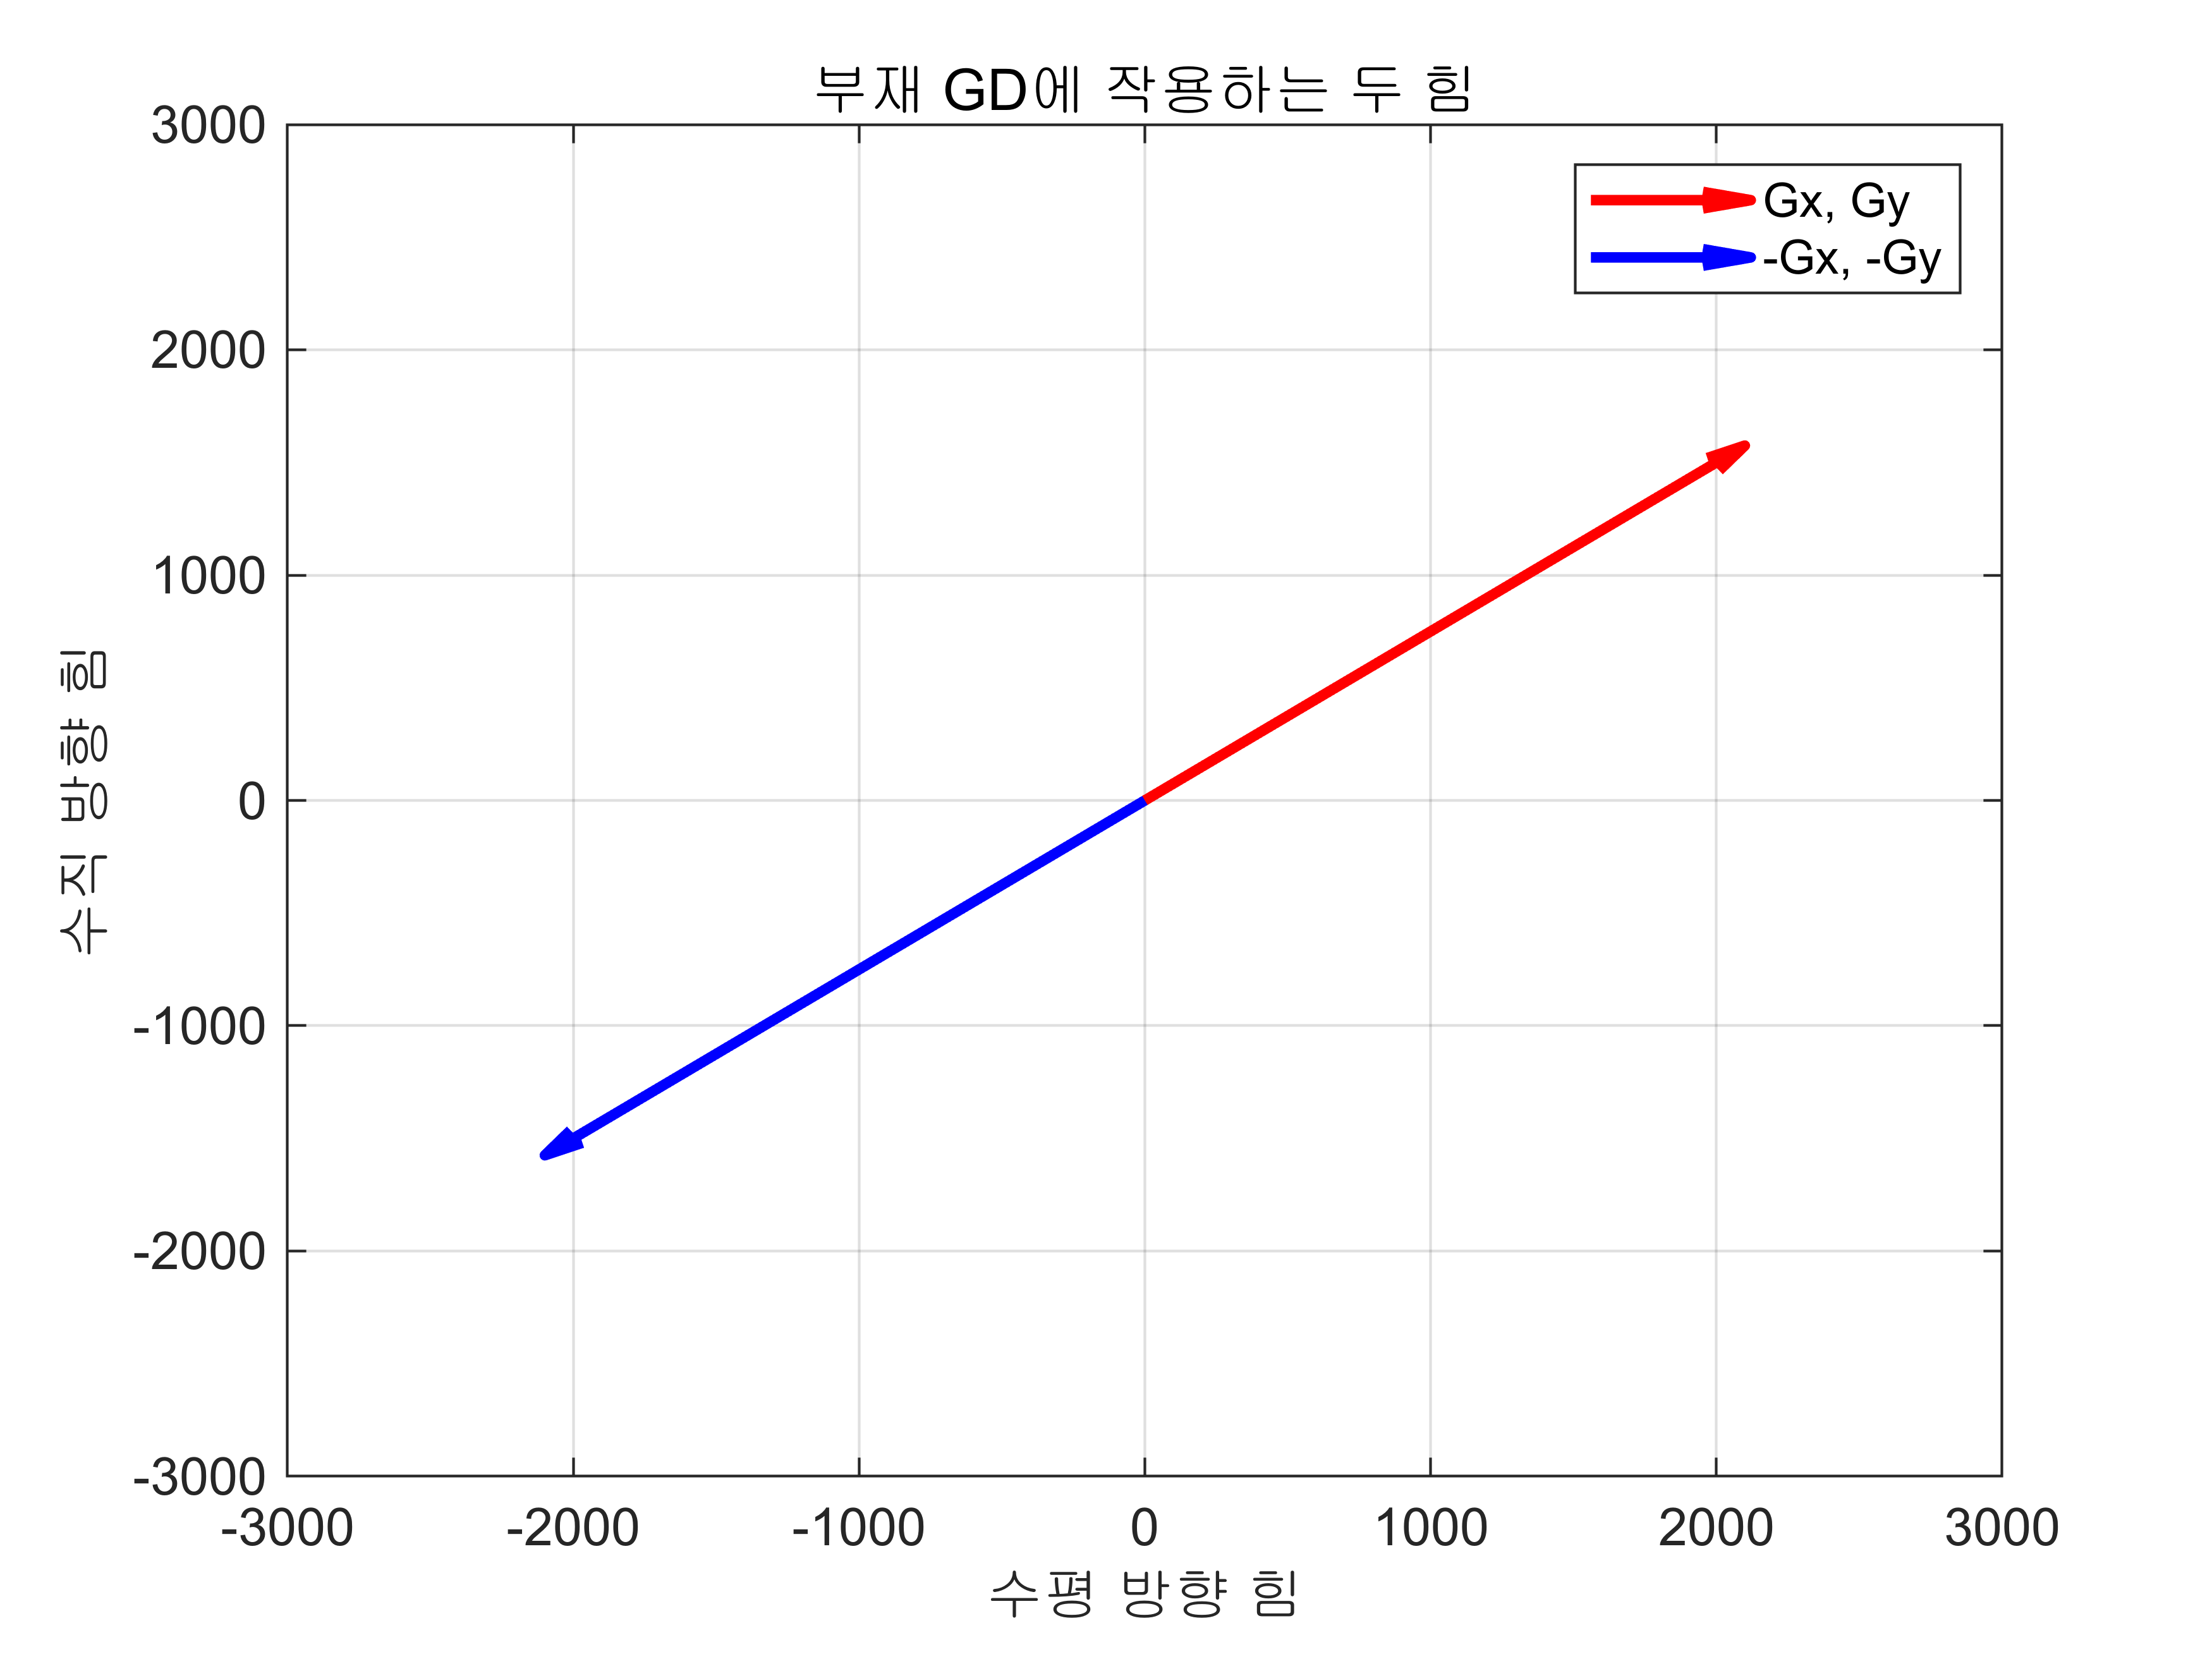

In [32]:
% 부재 GD의 힘 크기
Gx = 2333; % 수평 힘 성분
Gy = 1750; % 수직 힘 성분

% 부재 GD의 방향에 따른 힘의 분해
theta = atan2(Gy, Gx); % 각도 계산

% 전체 힘의 크기
G_total = sqrt(Gx^2 + Gy^2);

% 힘의 시각화
figure;
quiver(0, 0, Gx, Gy, 'r', 'LineWidth', 2); % 힘 벡터 그리기
hold on;
quiver(0, 0, -Gx, -Gy, 'b', 'LineWidth', 2); % 반대 방향 힘 벡터 그리기
xlim([-3000 3000]);
ylim([-3000 3000]);
title('부재 GD에 작용하는 두 힘');
xlabel('수평 방향 힘');
ylabel('수직 방향 힘');
legend('Gx, Gy', '-Gx, -Gy');
grid on;

<p style="text-align:left">
   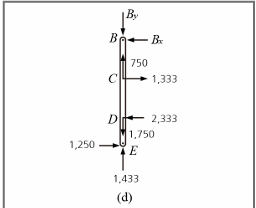
</p>


**부재 BCD****E****에 작용하는 힘 분석**

1.  **수평 방향의 힘 (** $B_x$ **)**:

-  평형 방정식 $\sum F_x =0$ 을 사용하여 $B_x$ 를 계산합니다.
-  $B_x =-250N$ 으로, 수평 방향으로 왼쪽을 향해 작용하는 힘입니다.

1.  **수직 방향의 힘 (** $B_y$ **​****)**:

-  평형 방정식 $\sum F_y =0$ 을 사용하여 $B_y$ ​를 계산합니다.
-  $B_y =-433N$ 으로, 수직 방향으로 아래를 향해 작용하는 힘입니다.

1.  **합력의 방향**:

-  $B_y /B_x =433/250$ 이며, 이는 $\tan 60$ 와 같습니다.
-  이 결과는 부재에 작용하는 힘의 합력이 부재 AB의 방향과 일치한다는 것을 의미합니다.

**해석**

-  **평형 상태**:
-  수평 및 수직 힘의 합이 0이므로 부재 $BCDE$ 는 정적 평형 상태에 있습니다.
-  **합력의 방향**:
-  수평 및 수직 성분을 사용하여 합력의 방향을 계산한 결과, 이 방향은 부재 AB와 일치하는 것으로 나타났습니다.
-  **힘의 분해**:
-  수평과 수직 성분으로 나누어 부재에 작용하는 힘을 분석하면, 구조물의 안정성과 하중 전달 경로를 이해하는 데 도움이 됩니다.

In [33]:
% 주어진 힘 성분
Bx = -250; % 수평 성분 (N)
By = -433; % 수직 성분 (N)

% 합력의 크기와 방향
resultant_magnitude = sqrt(Bx^2 + By^2);
resultant_angle = atan2(By, Bx) * (180 / pi); % 각도 (도 단위)

% 결과 출력
fprintf('수평 성분 Bx: %.2f N\n', Bx);

수평 성분 Bx: -250.00 N

In [34]:
fprintf('수직 성분 By: %.2f N\n', By);

수직 성분 By: -433.00 N

In [35]:
fprintf('합력의 크기: %.2f N\n', resultant_magnitude);

합력의 크기: 499.99 N

In [36]:
fprintf('합력의 각도: %.2f 도\n', resultant_angle);

합력의 각도: -120.00 도


<p style="text-align:left">
   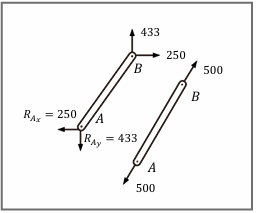
</p>


**부재 AB****의 힘 해석**

1.  **부재 A****B****의 특성**:

-  부재 AB는 두 힘 부재로, 양 끝에만 힘이 작용합니다.
-  이 부재는 인장 상태에 있으며, 양 끝에서 서로 반대 방향으로 당기는 힘을 받고 있습니다.

1.  **작용하는 힘**:

-  수평 방향의 반력 ( $R_{Ax}$ ​):
-  $\displaystyle R_{Ax} =250N$
-  부재의 A 지점에서 오른쪽으로 향하는 수평 힘
-  수직 방향의 반력 ( $R_{Ay}$ ):
-  $\displaystyle R_{Ay} =433N$
-  부재의 A 지점에서 위쪽으로 향하는 수직 힘
-  부재의 끝 지점에서 500N의 힘이 작용하며, 이는 부재를 인장 상태로 유지합니다.

1.  **두 힘 부재의 특성**:

-  두 힘 부재는 양 끝에서 동일한 크기의 힘이 반대 방향으로 작용합니다.
-  이러한 힘은 부재의 길이 방향으로 작용하며, 부재가 인장되거나 압축되도록 합니다.

**해석**

-  **평형 상태**:
-  부재의 양 끝에 작용하는 힘은 크기가 같고 방향이 반대이므로 부재는 평형 상태를 유지합니다.
-  **인장 부재**:
-  이 경우 부재 AB는 인장 상태에 있으며, 힘이 부재를 당기고 있습니다.
-  **힘의 합성**:
-  부재에 작용하는 수평 및 수직 성분의 힘을 합성하여 부재의 인장 또는 압축 상태를 분석할 수 있습니다.

In [37]:
% 주어진 힘 성분
Rax = 250; % 수평 반력 (N)
Ray = 433; % 수직 반력 (N)
F_end = 500; % 부재의 끝에서 작용하는 인장력 (N)

% 합력의 크기와 방향
resultant_magnitude = sqrt(Rax^2 + Ray^2);
resultant_angle = atan2(Ray, Rax) * (180 / pi); % 각도 (도 단위)

% 결과 출력
fprintf('수평 반력 Rax: %.2f N\n', Rax);

수평 반력 Rax: 250.00 N

In [38]:
fprintf('수직 반력 Ray: %.2f N\n', Ray);

수직 반력 Ray: 433.00 N

In [39]:
fprintf('합력의 크기: %.2f N\n', resultant_magnitude);

합력의 크기: 499.99 N

In [40]:
fprintf('합력의 각도: %.2f 도\n', resultant_angle);

합력의 각도: 60.00 도



<p style="text-align:left">
   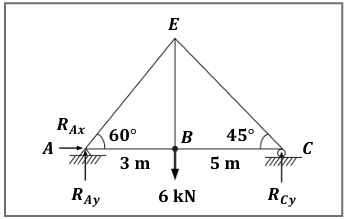
</p>


**각 지점에서의 반력 계산**

1.  **수직 방향의 힘의 평형**:

-  구조물이 정적 평형 상태에 있으므로 수직 방향의 힘의 합은 0이어야 합니다.
-  수직 방향의 평형 방정식:

$$\sum F_y =0:R_{Ay} -6+R_{Cy} =0$$

-  이 방정식을 통해 지점 A와 C에서의 수직 반력 사이의 관계를 구할 수 있습니다.

1.  **모멘트 평형 방정식**:

-  임의의 지점을 기준으로 모멘트의 합이 0이어야 합니다.
-  여기서는 지점 A를 기준으로 모멘트 평형을 구합니다.

$$\sum M_A =0:(-3\times 6)+(8\times R_{Cy} )=0$$

-  이를 통해 지점 C에서의 수직 반력 $R_{Cy}$ ​를 구할 수 있습니다.

**계산 과정**

1.  **지점 C****에서의 수직 반력 (** $R_{Cy}$ **​****)**:

-  모멘트 평형 방정식에서 $R_{Cy}$ ​를 구하면:

$$R_{Cy} =\frac{3\times 6}{8}=2.25\;\textrm{kN}$$

1.   **지점** AA**A****에서의 수직 반력 (** $R_{Ay}$ **​****)**:

-  수직 방향의 평형 방정식에 $R_{Cy}$ ​ 값을 대입하면:

$$R_{Ay} =6-R_{Cy} =6-2.25=3.75\;\textrm{kN}$$

**결과**

-  **지점 C****에서의 수직 반력**: $R_{Cy} =2.25kN$
-  **지점 A****에서의 수직 반력**: $R_{Ay} =3.75kN$

In [41]:
% 모멘트 평형 방정식에서 RCy 구하기
RCy = (3 * 6) / 8; % kN

% 수직 방향 평형 방정식에서 RAy 구하기
RAy = 6 - RCy; % kN

% 결과 출력
fprintf('지점 C에서의 수직 반력 RCy: %.2f kN\n', RCy);

지점 C에서의 수직 반력 RCy: 2.25 kN

In [42]:
fprintf('지점 A에서의 수직 반력 RAy: %.2f kN\n', RAy);

지점 A에서의 수직 반력 RAy: 3.75 kN


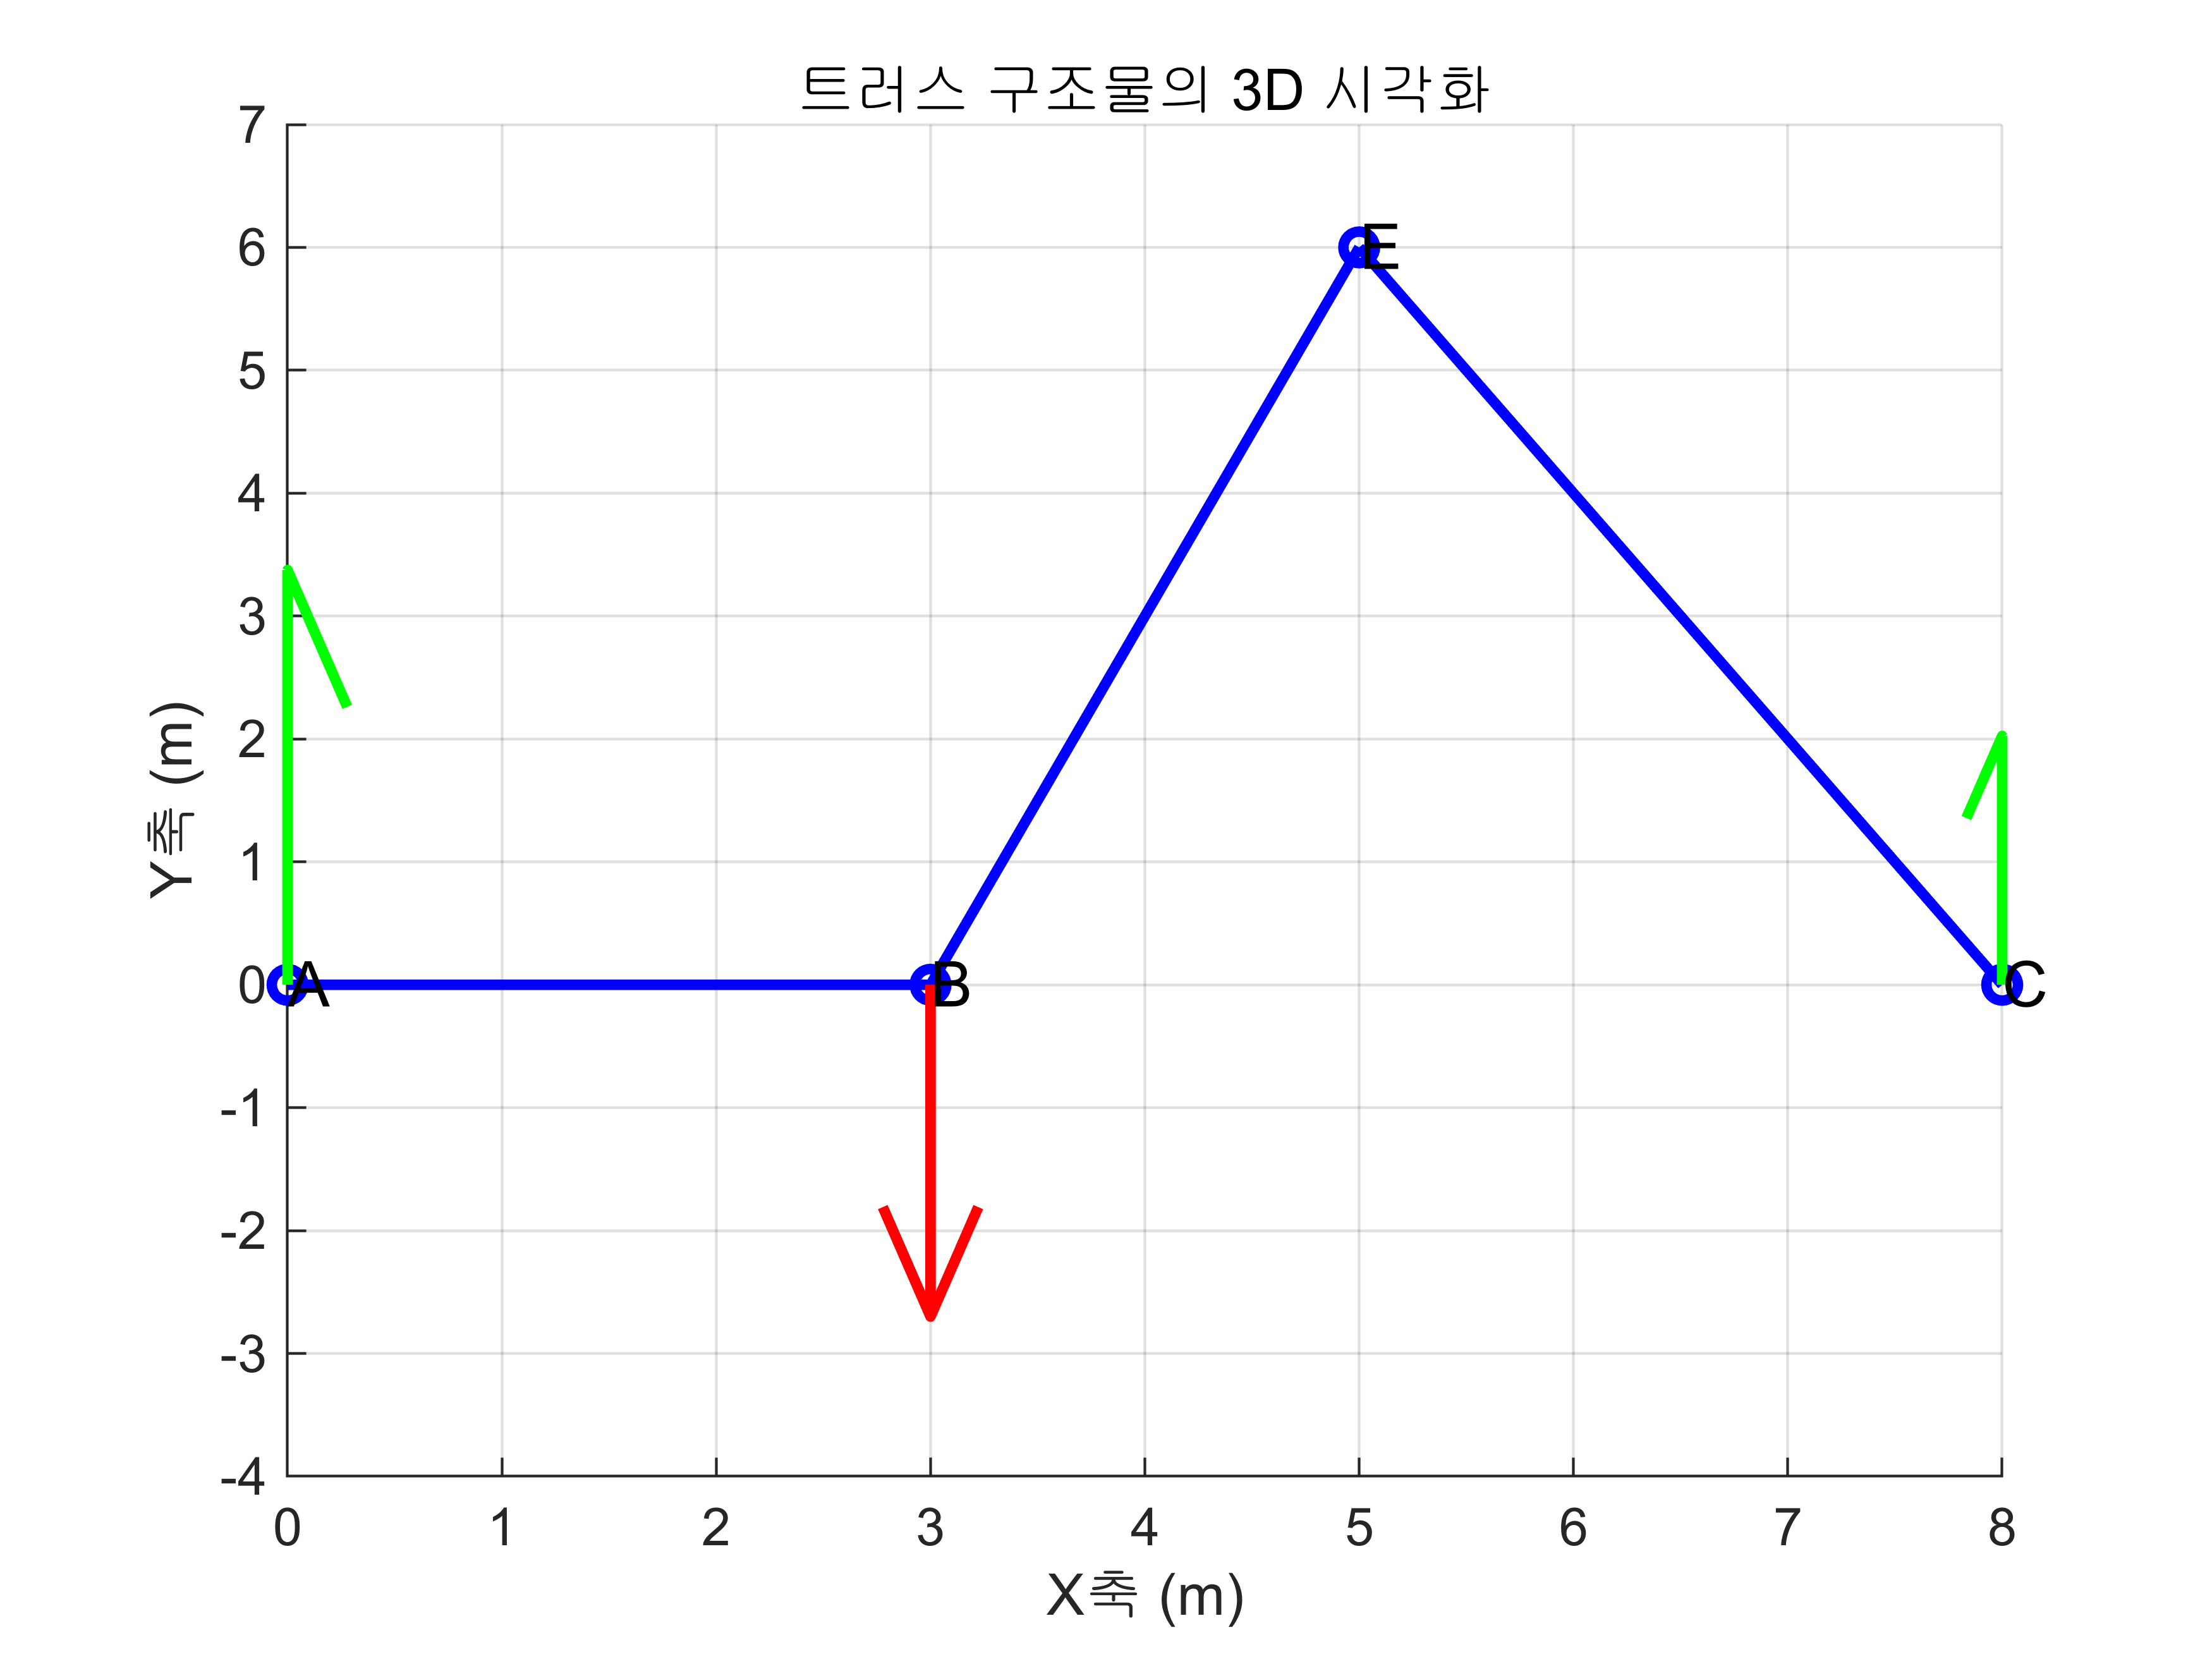

In [43]:
% 3D 트러스 구조 시각화

% 지점 A와 C의 좌표
A = [0, 0, 0];
B = [3, 0, 0];
C = [8, 0, 0];
E = [5, 6, 0];

% 부재의 연결을 나타내는 선
members = {A, B; B, E; E, C};

% 3D 시각화 설정
figure;
hold on;

% 각 부재 그리기
for i = 1:size(members, 1)
    start = members{i, 1};
    end_point = members{i, 2};
    plot3([start(1), end_point(1)], [start(2), end_point(2)], [start(3), end_point(3)], 'bo-', 'LineWidth', 2);
end

% 하중 표시 (B점에서 6kN 아래로 작용)
quiver3(B(1), B(2), B(3), 0, -3, 0, 'r', 'LineWidth', 2, 'MaxHeadSize', 1);

% 반력 표시
% A 지점에서의 반력
quiver3(A(1), A(2), A(3), 0, 3.75, 0, 'g', 'LineWidth', 2, 'MaxHeadSize', 1);
% C 지점에서의 반력
quiver3(C(1), C(2), C(3), 0, 2.25, 0, 'g', 'LineWidth', 2, 'MaxHeadSize', 1);

% 그래프 설정
xlabel('X축 (m)');
ylabel('Y축 (m)');
zlabel('Z축');
title('트러스 구조물의 3D 시각화');
grid on;

% 축의 크기 설정
xlim([0, 8]);
ylim([-4, 7]);
zlim([0, 1]);

% 각 지점에 레이블 추가
text(A(1), A(2), A(3), 'A', 'FontSize', 12, 'Color', 'black');
text(B(1), B(2), B(3), 'B', 'FontSize', 12, 'Color', 'black');
text(C(1), C(2), C(3), 'C', 'FontSize', 12, 'Color', 'black');
text(E(1), E(2), E(3), 'E', 'FontSize', 12, 'Color', 'black');

hold off;

<p style="text-align:left">
   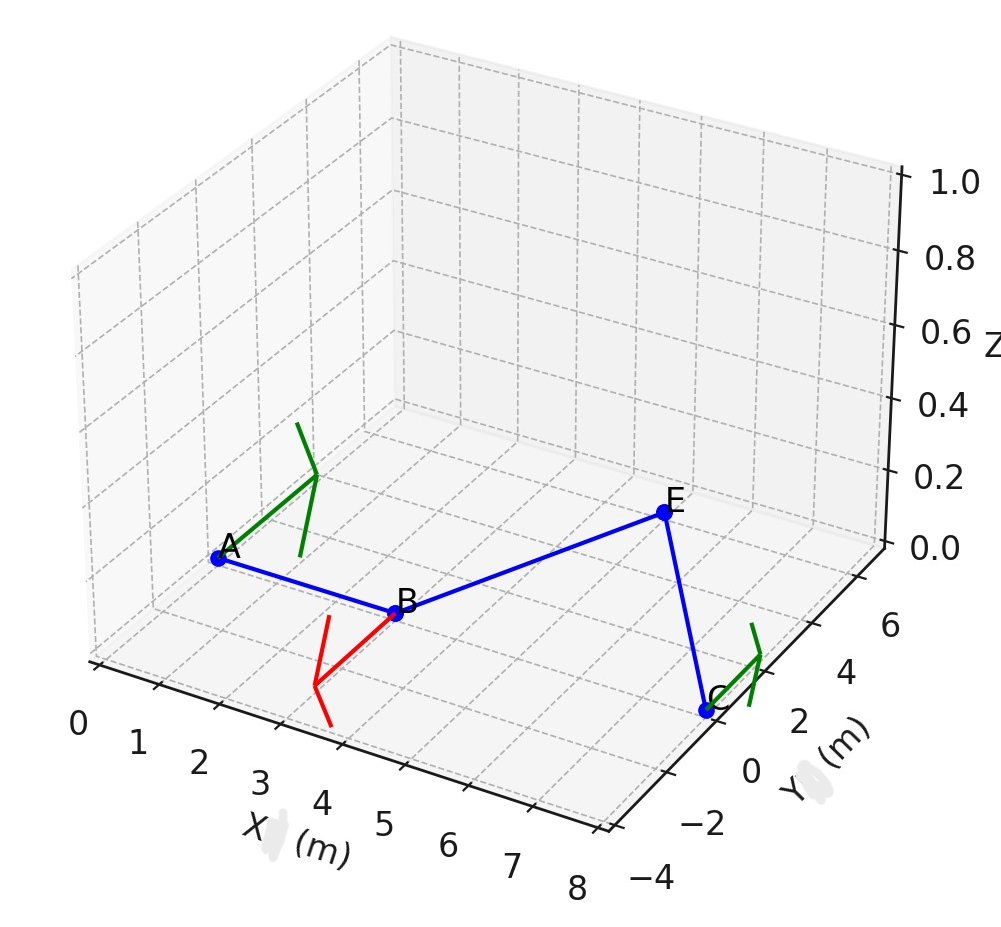
</p>


<p style="text-align:left">
   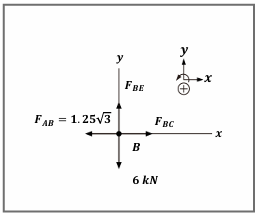
</p>


**절점 B의 힘 분석**

1.  **수평 방향의 평형**:

-  부재 AB의 힘은 이미 알려져 있고, 이는 $1.25\sqrt{3}$ ​ kN입니다.
-  수평 방향의 힘 평형 방정식:

$$\sum F_x =0:-1.25\sqrt{3}+F_{BC} =0$$

-  이를 통해 $F_{BC}$ ​를 계산할 수 있습니다.

1.  **수직 방향의 평형**:

-  수직 방향의 힘 평형 방정식은 $F_{BE}$ ​와 작용하는 하중 6 kN에 대한 식을 나타냅니다:

$$\sum F_y =0:F_{BE} -6=0$$

**계산 과정**

-  **부재 BC** **의 힘** $F_{BC}$ **​**:

$$F_{BC} =1.25\sqrt{3}\;\textrm{kN}kN$$

-  **부재 BE** **의 힘** $F_{BE} :$

$$F_{BE} =6\;\textrm{kN}$$

In [44]:
% 주어진 값
FAB = 1.25 * sqrt(3); % kN

% 수평 및 수직 방향 평형 방정식 설정
syms FBC FBE

% 수평 방향의 평형 방정식
eq1 = -FAB + FBC == 0;

% 수직 방향의 평형 방정식
eq2 = FBE - 6 == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [FBC, FBE]);

% 결과 값
FBC_val = double(sol.FBC);
FBE_val = double(sol.FBE);

% 결과 출력
fprintf('부재 BC에 걸리는 힘 FBC: %.2f√3 kN\n', FBC_val/sqrt(3));

부재 BC에 걸리는 힘 FBC: 1.25√3 kN

In [45]:
fprintf('부재 BE에 걸리는 힘 FBE: %.2f kN\n', FBE_val);

부재 BE에 걸리는 힘 FBE: 6.00 kN



<p style="text-align:left">
   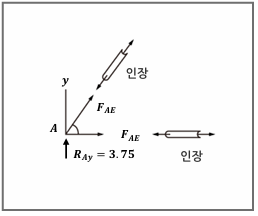
</p>


**부재 A****E** **의 힘** $F_{AE}$ :

-  수직 방향 평형 방정식으로부터 FAEF\_{AE}FAE​를 계산합니다:

$$F_{AE} =-\frac{R_{Ay} }{\sin 60^{\circ } }=-\frac{3.75}{\sin 60^{\circ } }=-2.5\sqrt{3}\;\textrm{kN}$$

-  여기서 부호가 음수인 이유는 부재 AE가 압축 부재임을 나타냅니다.

**부재 A****B** **의 힘** $F_{AB}$ **​**:

-  수평 방향 평형 방정식으로부터 $F_{AB}$ ​를 계산합니다:

$$F_{AB} =-F_{AE} \cos 60^{\circ } =2.5\sqrt{3}\times \frac{1}{2}=1.25\sqrt{3}\;\textrm{kN}$$

-  이 값은 부재 AB가 인장 부재임을 나타냅니다.

In [46]:
% 각도
theta = 60; % degrees

% 수직 반력
RAy = 3.75; % kN

% 부재 AE의 힘 계산
FAE = -RAy / sind(theta);

% 부재 AB의 힘 계산
FAB = -FAE * cosd(theta);

% 결과 출력
fprintf('부재 AE에 걸리는 힘 FAE: %.2f√3 kN\n', FAE/sqrt(3));
fprintf('부재 AB에 걸리는 힘 FAB: %.2f√3 kN\n', FAB/sqrt(3));

부재 AB에 걸리는 힘 FAB: 2.17 kN
부재 AE에 걸리는 힘 FAE: -4.33 kN


<p style="text-align:left">
   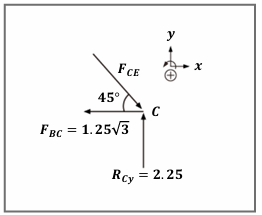
</p>


**절점 C의 힘 분석**

1.  **수평 방향의 평형**:

-  부재 BC의 힘은 $1.25\sqrt{3}kN$ 이며, 이는 수평 방향으로 작용합니다.
-  부재 CE의 힘의 수평 성분을 포함하여 수평 방향의 평형 방정식을 설정합니다:

$$\sum F_x =0:-1.25\sqrt{3}+F_{CE} \cos 45^{\circ } =0$$

1.  **수직 방향의 평형**:

-  지점 C에서의 수직 반력 $R_{Cy}$ 와 부재 CE의 힘의 수직 성분이 평형을 이룹니다:

$$\sum F_y =0:2.25-F_{CE} \sin 45^{\circ } =0$$

**계산 과정**

-  **부재 CE** **의 힘** $F_{CE}$ **​**:

$$F_{CE} =\frac{2.25}{\sin 45^{\circ } }=3.18\;\textrm{kN}$$

-  이 값은 부재 CE가 압축력을 받고 있음을 나타냅니다.

In [47]:
% 각도
theta = 45; % degrees

% 수직 반력
RCy = 2.25; % kN

% 수직 방향을 사용하여 FCE 계산
FCE_val = RCy / sind(theta);

% 결과 출력
fprintf('부재 CE에 걸리는 압축력 FCE: %.2f kN\n', FCE_val);

부재 CE에 걸리는 압축력 FCE: 3.18 kN


<p style="text-align:left">
   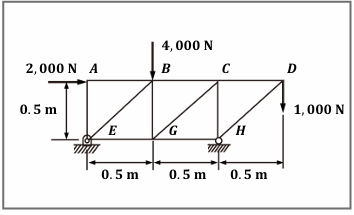
</p>


-  **수평 방향의 평형 방정식**:

$$\sum F_x =0\Rightarrow 2000+R_{Ex} =0$$

따라서,


$$R_{Ex} =-2000\,\textrm{N}$$

-  **수직 방향의 평형 방정식**:

$$\sum F_y =0\Rightarrow R_{Ey} +R_{Hy} -4000-1000=0$$

따라서,


$$R_{Ey} +R_{Hy} =5000\,\textrm{N}$$

-  **점 E****에 대한 모멘트 평형**:

$$\sum M_E =0$$

$$0.5\times 2000+0.5\times 4000+1.5\times 1000-1.0\times R_{Hy} =0$$

$$1000+2000+1500-R_{Hy} =0$$

따라서,


$$R_{Hy} =4500\,\textrm{N}$$

-  **수직 방향의 반력 계산**:

$$R_{Ey} +4500=5000$$

따라서,


$$R_{Ey} =500\,\textrm{N}$$

**최종 결과**

-  **절점 H****에서의 수직 반력**:

$$R_{Hy} =4500\,\textrm{N}$$

-  **절점 E****에서의 수직 반력**:

$$R_{Ey} =500\,\textrm{N}$$

-  **절점 E****에서의 수평 반력**:

$$R_{Ex} =-2000\,\textrm{N}$$

In [48]:
% 기호 변수 선언
syms REy RHy REx

% 수평 방향의 평형 방정식
eq1 = 2000 + REx == 0;

% 수직 방향의 평형 방정식
eq2 = REy + RHy - 4000 - 1000 == 0;

% 점 E에 대한 모멘트 평형 방정식
eq3 = 0.5 * 2000 + 0.5 * 4000 + 1.5 * 1000 - 1.0 * RHy == 0;

% 방정식 풀기
sol = solve([eq1, eq2, eq3], [REx, REy, RHy]);

% 결과 출력
REx_val = double(sol.REx);
REy_val = double(sol.REy);
RHy_val = double(sol.RHy);

fprintf('절점 E에서의 수평 반력 (REx): %.2f N\n', REx_val);

절점 E에서의 수평 반력 (REx): -2000.00 N

In [49]:
fprintf('절점 E에서의 수직 반력 (REy): %.2f N\n', REy_val);

절점 E에서의 수직 반력 (REy): 500.00 N

In [50]:
fprintf('절점 H에서의 수직 반력 (RHy): %.2f N\n', RHy_val);

절점 H에서의 수직 반력 (RHy): 4500.00 N



<p style="text-align:left">
   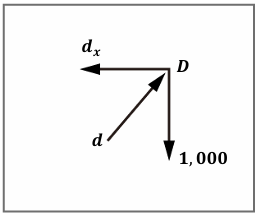
</p>


-  **수평 방향의 평형 (** $\sum F_x =0$ **)**:

$$d\cos 45^{\circ } -d_x =0$$

따라서,


$$d_x =d\cos 45^{\circ }$$

-  **수직 방향의 평형 (** $\sum F_y =0$ **)**:

$$d\sin 45^{\circ } -1000=0$$

따라서,


$$d=\frac{1000}{\sin 45^{\circ } }=1000\sqrt{2}\,\textrm{N}$$

-  **내력 계산**:

$$d=1000\sqrt{2}\,\textrm{N}\approx 1414.2\,\textrm{N}$$

$$d_x =d\cos 45^{\circ } =1000\,\textrm{N}$$

In [51]:
% 기호 변수 선언
syms d dx

% 수평 방향의 평형 방정식
eq1 = d * cosd(45) - dx == 0;

% 수직 방향의 평형 방정식
eq2 = d * sind(45) - 1000 == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [d, dx]);

% 결과 출력
d_val = double(sol.d);
dx_val = double(sol.dx);

fprintf('내력 d: %.2f N\n', d_val);

내력 d: 1414.21 N

In [52]:
fprintf('수평 성분 dx: %.2f N\n', dx_val);

수평 성분 dx: 1000.00 N



<p style="text-align:left">
   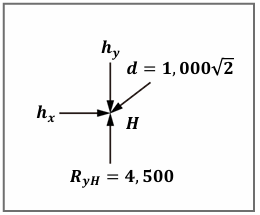
</p>


-  **수평 방향의 평형 (** $\sum F_x =0$ **)**:

$$h_x -d\cos 45^{\circ } =0$$

따라서,


$$h_x =d\cos 45^{\circ }$$

-  **수직 방향의 평형 (** $\sum F_y =0$ **)**:

$$-h_y -d\sin 45^{\circ } +4500=0$$

따라서,


$$h_y =-d\sin 45^{\circ } +4500$$

-  **내력 계산**:
-  주어진 값: $d=1000\sqrt{2}$ ​

$$h_x =1000\,\textrm{N}$$

$$h_y =3500\,\textrm{N}$$

In [53]:
% 기호 변수 선언
syms hx hy d

% 주어진 값
d_val = 1000 * sqrt(2);

% 수평 방향의 평형 방정식
eq1 = hx - d * cosd(45) == 0;

% 수직 방향의 평형 방정식
eq2 = -hy - d * sind(45) + 4500 == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [hx, hy]);

% 결과 출력
hx_val = double(subs(sol.hx, d, d_val));
hy_val = double(subs(sol.hy, d, d_val));

fprintf('수평 성분 hx: %.2f N\n', hx_val);

수평 성분 hx: 1000.00 N

In [54]:
fprintf('수직 성분 hy: %.2f N\n', hy_val);

수직 성분 hy: 3500.00 N


<p style="text-align:left">
   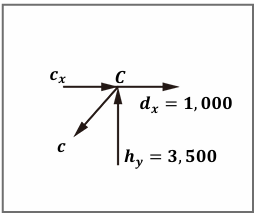
</p>


-  **수평 방향의 평형 (** $\sum F_x =0$ **)**:

$$c_x +d_x -c\cos 45^{\circ } =0$$

주어진 값:


$$d_x =1000$$

 $c_x =c\cos 45^{\circ } -d_x$ ​

-  **수직 방향의 평형 (** $\sum F_y =0$ **)**:

$$h_y -c\sin 45^{\circ } =0$$

주어진 값:


$$h_y =3500$$

$$c=\frac{h_y }{\sin 45^{\circ } }=3500\sqrt{2}\,\textrm{N}$$

-  **내력 계산**:

$$c=3500\sqrt{2}\,\textrm{N}\approx 4949.75\,\textrm{N}$$

$$c_x =2500\,\textrm{N}$$

In [55]:
% 기호 변수 선언
syms cx c dx hy

% 주어진 값
dx_val = 1000;
hy_val = 3500;

% 수평 방향의 평형 방정식
eq1 = cx + dx - c * cosd(45) == 0;

% 수직 방향의 평형 방정식
eq2 = hy - c * sind(45) == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [cx, c]);

% 결과 출력 - subs를 통해 모든 변수에 값을 대입
cx_val = double(subs(sol.cx, [dx hy], [dx_val hy_val]));
c_val = double(subs(sol.c, [dx hy], [dx_val hy_val]));

fprintf('내력 c: %.2f N\n', c_val);

내력 c: 4949.75 N

In [56]:
fprintf('수평 성분 cx: %.2f N\n', cx_val);

수평 성분 cx: 2500.00 N



<p style="text-align:left">
   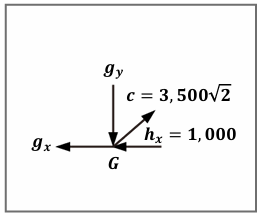
</p>


1.  **수평 방향의 평형 (** $\sum F_x =0$ **)**:

$$-g_x -h_x +c\cos 45^{\circ } =0$$

주어진 값:


$$h_x =1000,$$

$$c=3500\sqrt{2}$$

 $g_x =c\cos 45^{\circ } -h_x$ ​

1.  **수직 방향의 평형 (** $\sum F_y =0$ **)**:

$$-g_y +c\sin 45^{\circ } =0$$

$$g_y =c\sin 45^{\circ }$$

1.  **내력 계산**:

$$c=3500\sqrt{2}\,\textrm{N}\approx 4949.75\,\textrm{N}$$

$$g_x =2500\,\textrm{N}$$

$$g_y =3500\,\textrm{N}$$

In [57]:
% 기호 변수 선언
syms gx gy c hx

% 주어진 값
hx_val = 1000;
c_val = 3500 * sqrt(2);

% 수평 방향의 평형 방정식
eq1 = -gx - hx + c * cosd(45) == 0;

% 수직 방향의 평형 방정식
eq2 = -gy + c * sind(45) == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [gx, gy]);

% 결과 출력
gx_val = double(subs(sol.gx, {hx, c}, {hx_val, c_val}));
gy_val = double(subs(sol.gy, c, c_val));

fprintf('수평 성분 gx: %.2f N\n', gx_val);

수평 성분 gx: 2500.00 N

In [58]:
fprintf('수직 성분 gy: %.2f N\n', gy_val);

수직 성분 gy: 3500.00 N


<p style="text-align:left">
   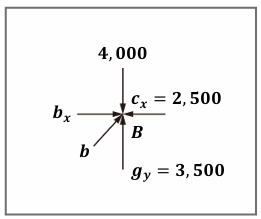
</p>


-  **수평 방향의 평형 (** $\sum F_x =0$ **)**:

$$b_x +b\cos 45^{\circ } -c_x =0$$

주어진 값:


$$c_x =2500$$

$$b_x =c_x -b\cos 45^{\circ }$$

-  **수직 방향의 평형 (** $\sum F_y =0$ **)**:

$$b\sin 45^{\circ } +g_y -4000=0$$

주어진 값:


$$g_y =3500$$

 $b=\frac{4000-g_y }{\sin 45^{\circ } }$ ​​

-  **내력 계산**:

 $ $ b=500\sqrt{2}\,\textrm{N}\approx 707.11\,\textrm{N
} $ $

$$b_x =2000\,\textrm{N}$$

In [59]:
% 기호 변수 선언
syms bx b cx gy

% 주어진 값
cx_val = 2500;
gy_val = 3500;

% 수평 방향의 평형 방정식
eq1 = bx + b * cosd(45) - cx == 0;

% 수직 방향의 평형 방정식
eq2 = b * sind(45) + gy - 4000 == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [bx, b]);

% 변수 값 대입
bx_val = double(subs(sol.bx, [cx gy], [cx_val gy_val]));
b_val = double(subs(sol.b, [cx gy], [cx_val gy_val]));

% 결과 출력
fprintf('수평 성분 bx: %.2f N\n', bx_val);

수평 성분 bx: 2000.00 N

In [60]:
fprintf('내력 b: %.2f N\n', b_val);

내력 b: 707.11 N



<p style="text-align:left">
   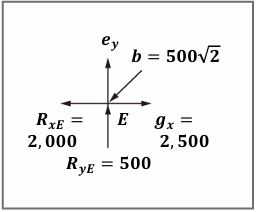
</p>


-  수평 방향의 평형 방정식:

$$-R_{xE} +g_x -b\cos 45^{\circ } =0$$

여기서


$$R_{xE} =2000,$$

$$g_x =2500,$$

 $b=500\sqrt{2}$ ​

-  수직 방향의 평형 방정식:

$$e_y +R_{yE} -b\sin 45^{\circ } =0$$

여기서


 $R_{yE} =500,b=500\sqrt{2}$ ​


위의 두 개의 방정식을 사용하여 $e_y$ 를 구할 수 있습니다.


In [61]:
% 주어진 값
R_xE = 2000;
R_yE = 500;
g_x = 2500;
b = 500 * sqrt(2);

% 수평 방향의 방정식
eq1 = -R_xE + g_x - b * cosd(45);

% 수직 방향의 방정식에서 e_y 구하기
e_y = -R_yE + b * sind(45);

% 결과 출력
fprintf('수직 성분 e_y: %.2f N\n', e_y);

수직 성분 e_y: 0.00 N


<p style="text-align:left">
   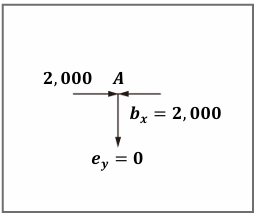
</p>


In [62]:
% 주어진 수평 성분
external_force = 2000;

% 수평 방향의 평형 방정식
bx = external_force;

% 결과 출력
fprintf('수평 성분 b_x: %.2f N\n', bx);

수평 성분 b_x: 2000.00 N


<p style="text-align:left">
   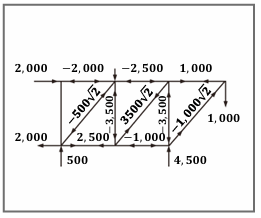
</p>



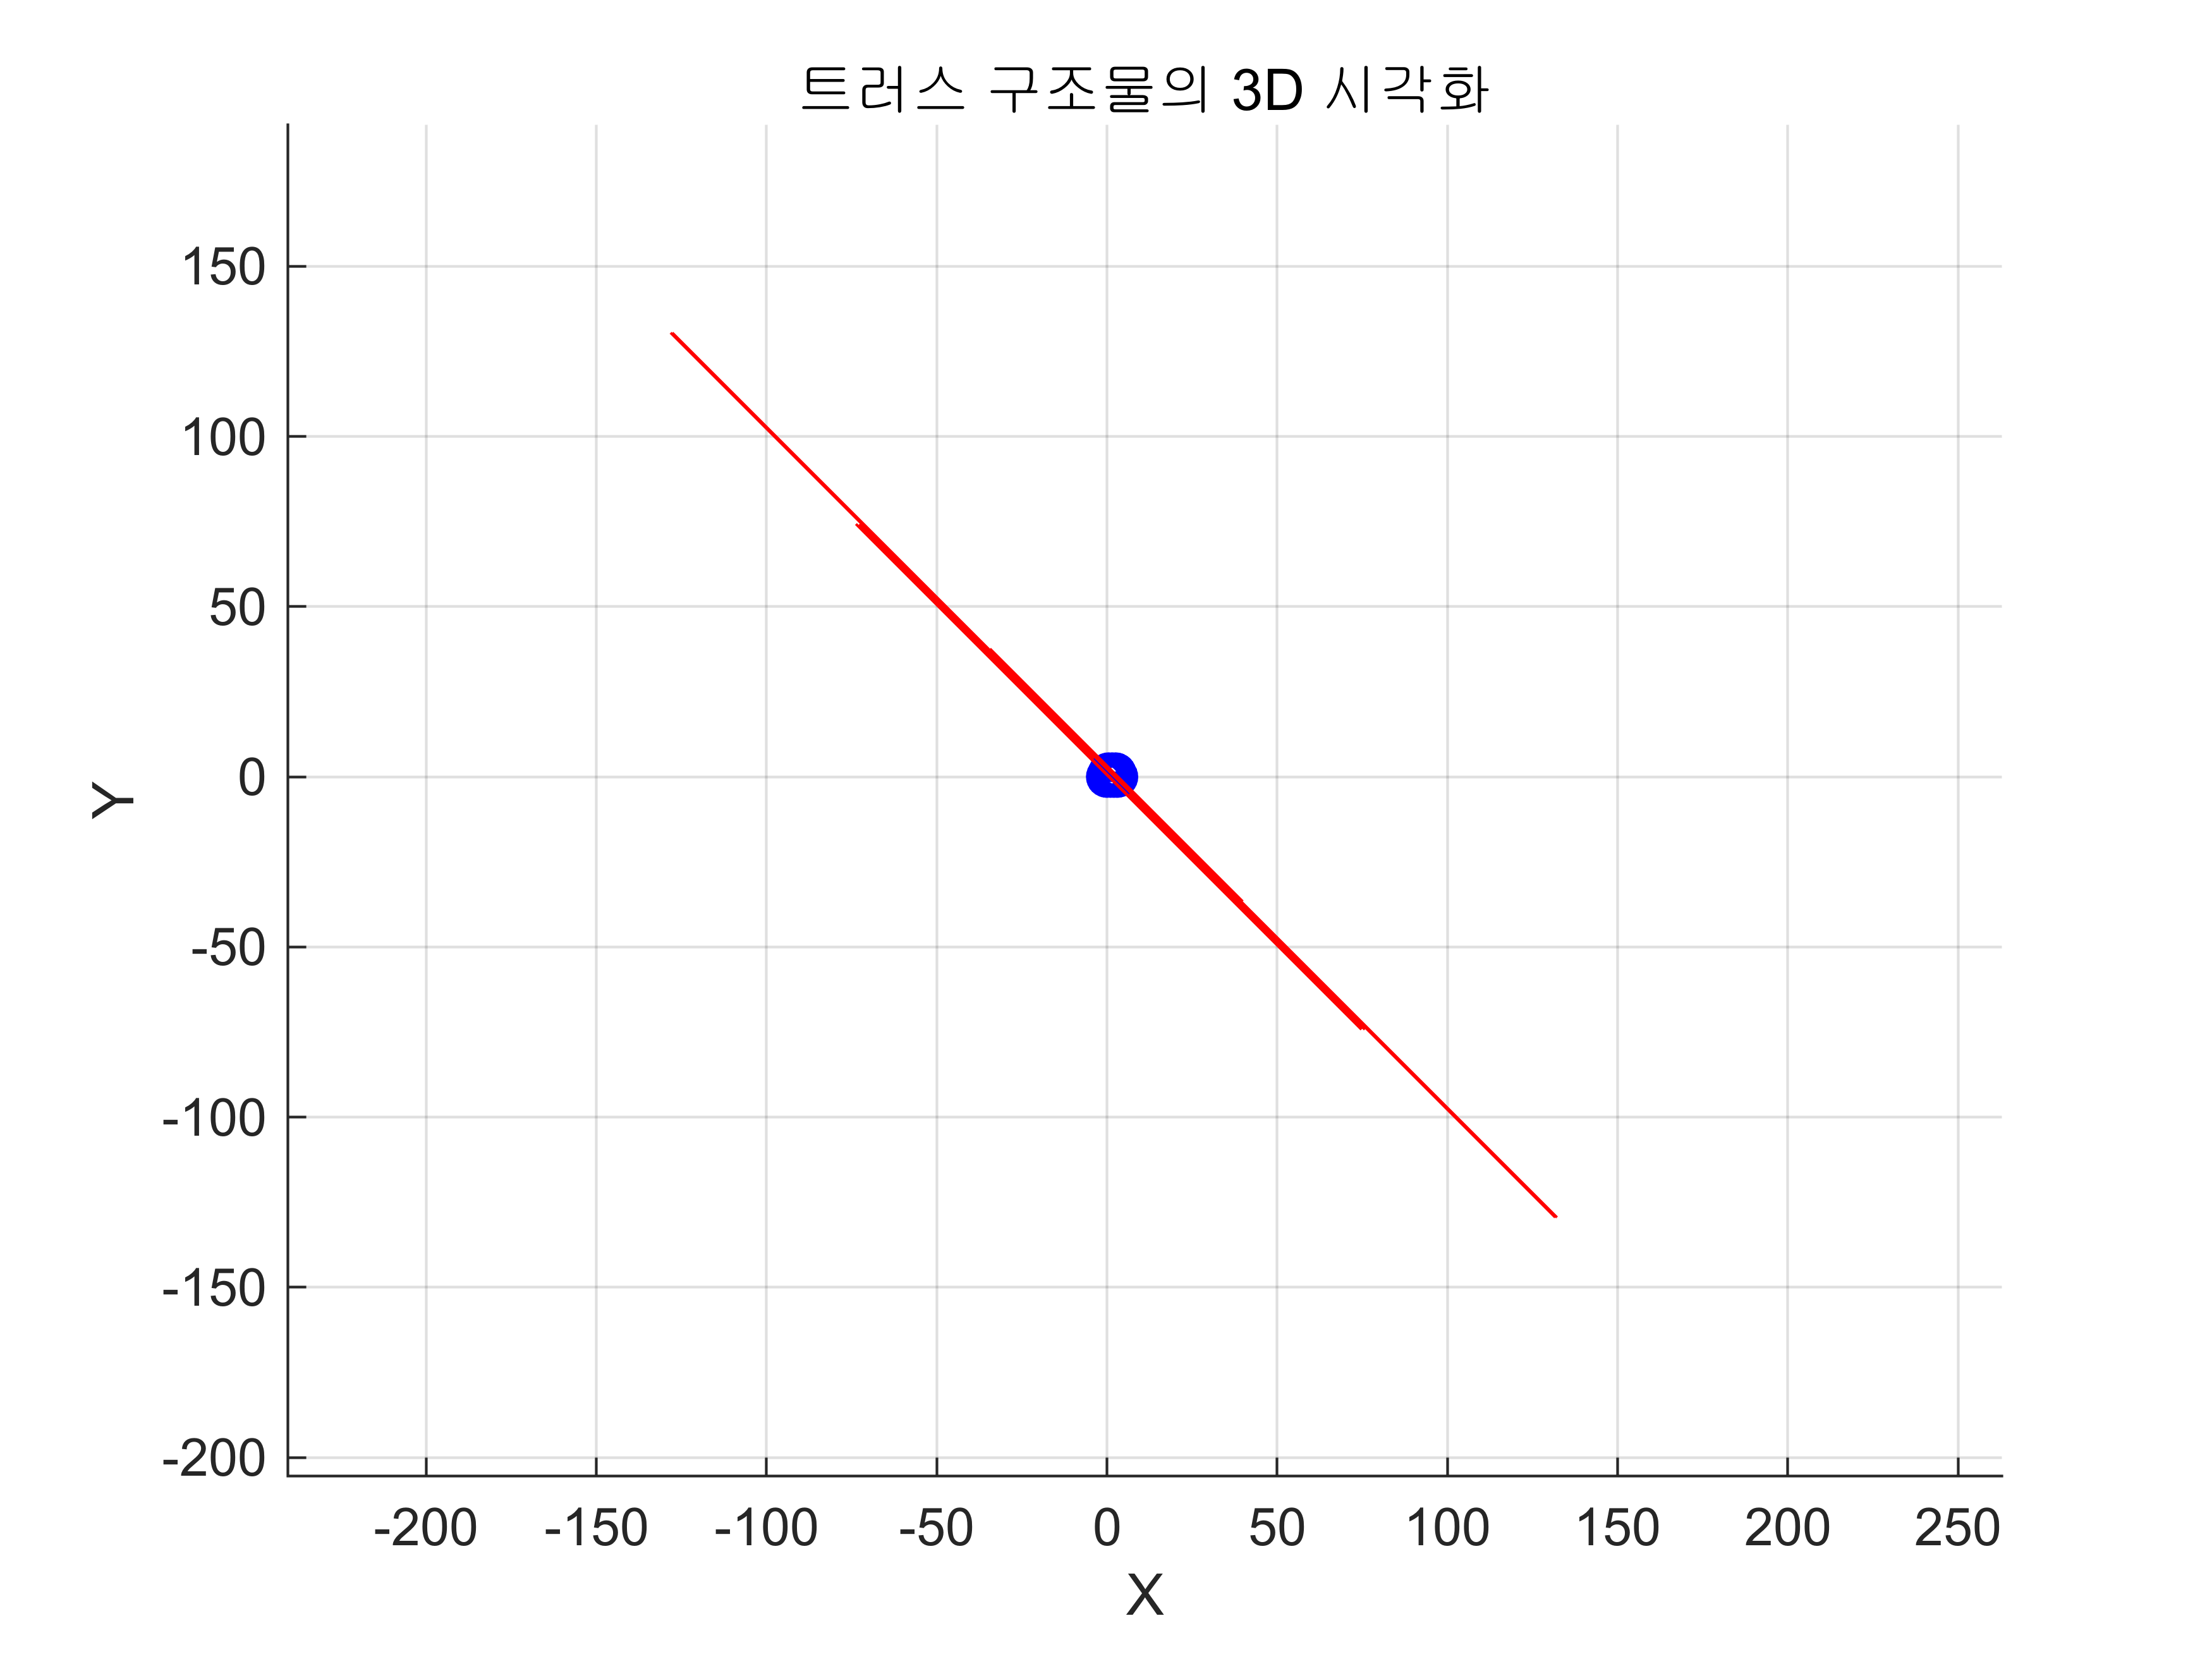

In [63]:
% MATLAB 코드 예시: 트러스 구조물 3D 시각화

% 노드의 좌표 설정 (간단한 예시)
nodes = [0 0 0;    % Node A
         1 0 0;    % Node B
         2 0 0;    % Node C
         3 0 0;    % Node D
         0.5 1 0;  % Node E
1.5 1 0;  % Node G
         2.5 1 0]; % Node H

% 부재의 연결 설정 (각 부재의 시작 노드와 끝 노드)
elements = [1 2; % Element AB
            2 3; % Element BC
            3 4; % Element CD
            1 5; % Element AE
            2 5; % Element BE
            2 6; % Element BG
            3 6; % Element CG
            3 7; % Element CH
            4 7];% Element DH

% 각 부재의 내력 값 (예시 값)
forces = [2000; -2000; -2500; 500; -500; -1000; 3500; -3500; 1000];

% 3D 그래프 설정
figure;
hold on;
grid on;
axis equal;
xlabel('X');
ylabel('Y');
zlabel('Force (N)');
title('트러스 구조물의 3D 시각화');

% 부재 그리기
for i = 1:size(elements, 1)
    % 시작 노드와 끝 노드 좌표
    node1 = elements(i, 1);
    node2 = elements(i, 2);
    x = [nodes(node1, 1), nodes(node2, 1)];
    y = [nodes(node1, 2), nodes(node2, 2)];
    z = [0, 0]; % z축은 힘의 크기로 표현

    % 부재 그리기
    plot3(x, y, z, 'b-o', 'LineWidth', 2);

    % 힘의 크기를 z축으로 화살표 표시
    quiver3(mean(x), mean(y), 0, 0, 0, forces(i), 'r', 'MaxHeadSize', 0.5);
end

hold off;

xlim([-248 256])
ylim([-226 171])

<p style="text-align:left">
   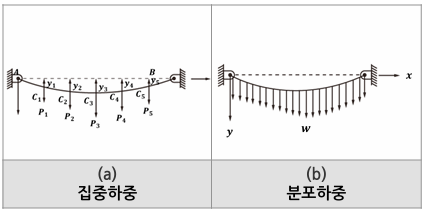
</p>



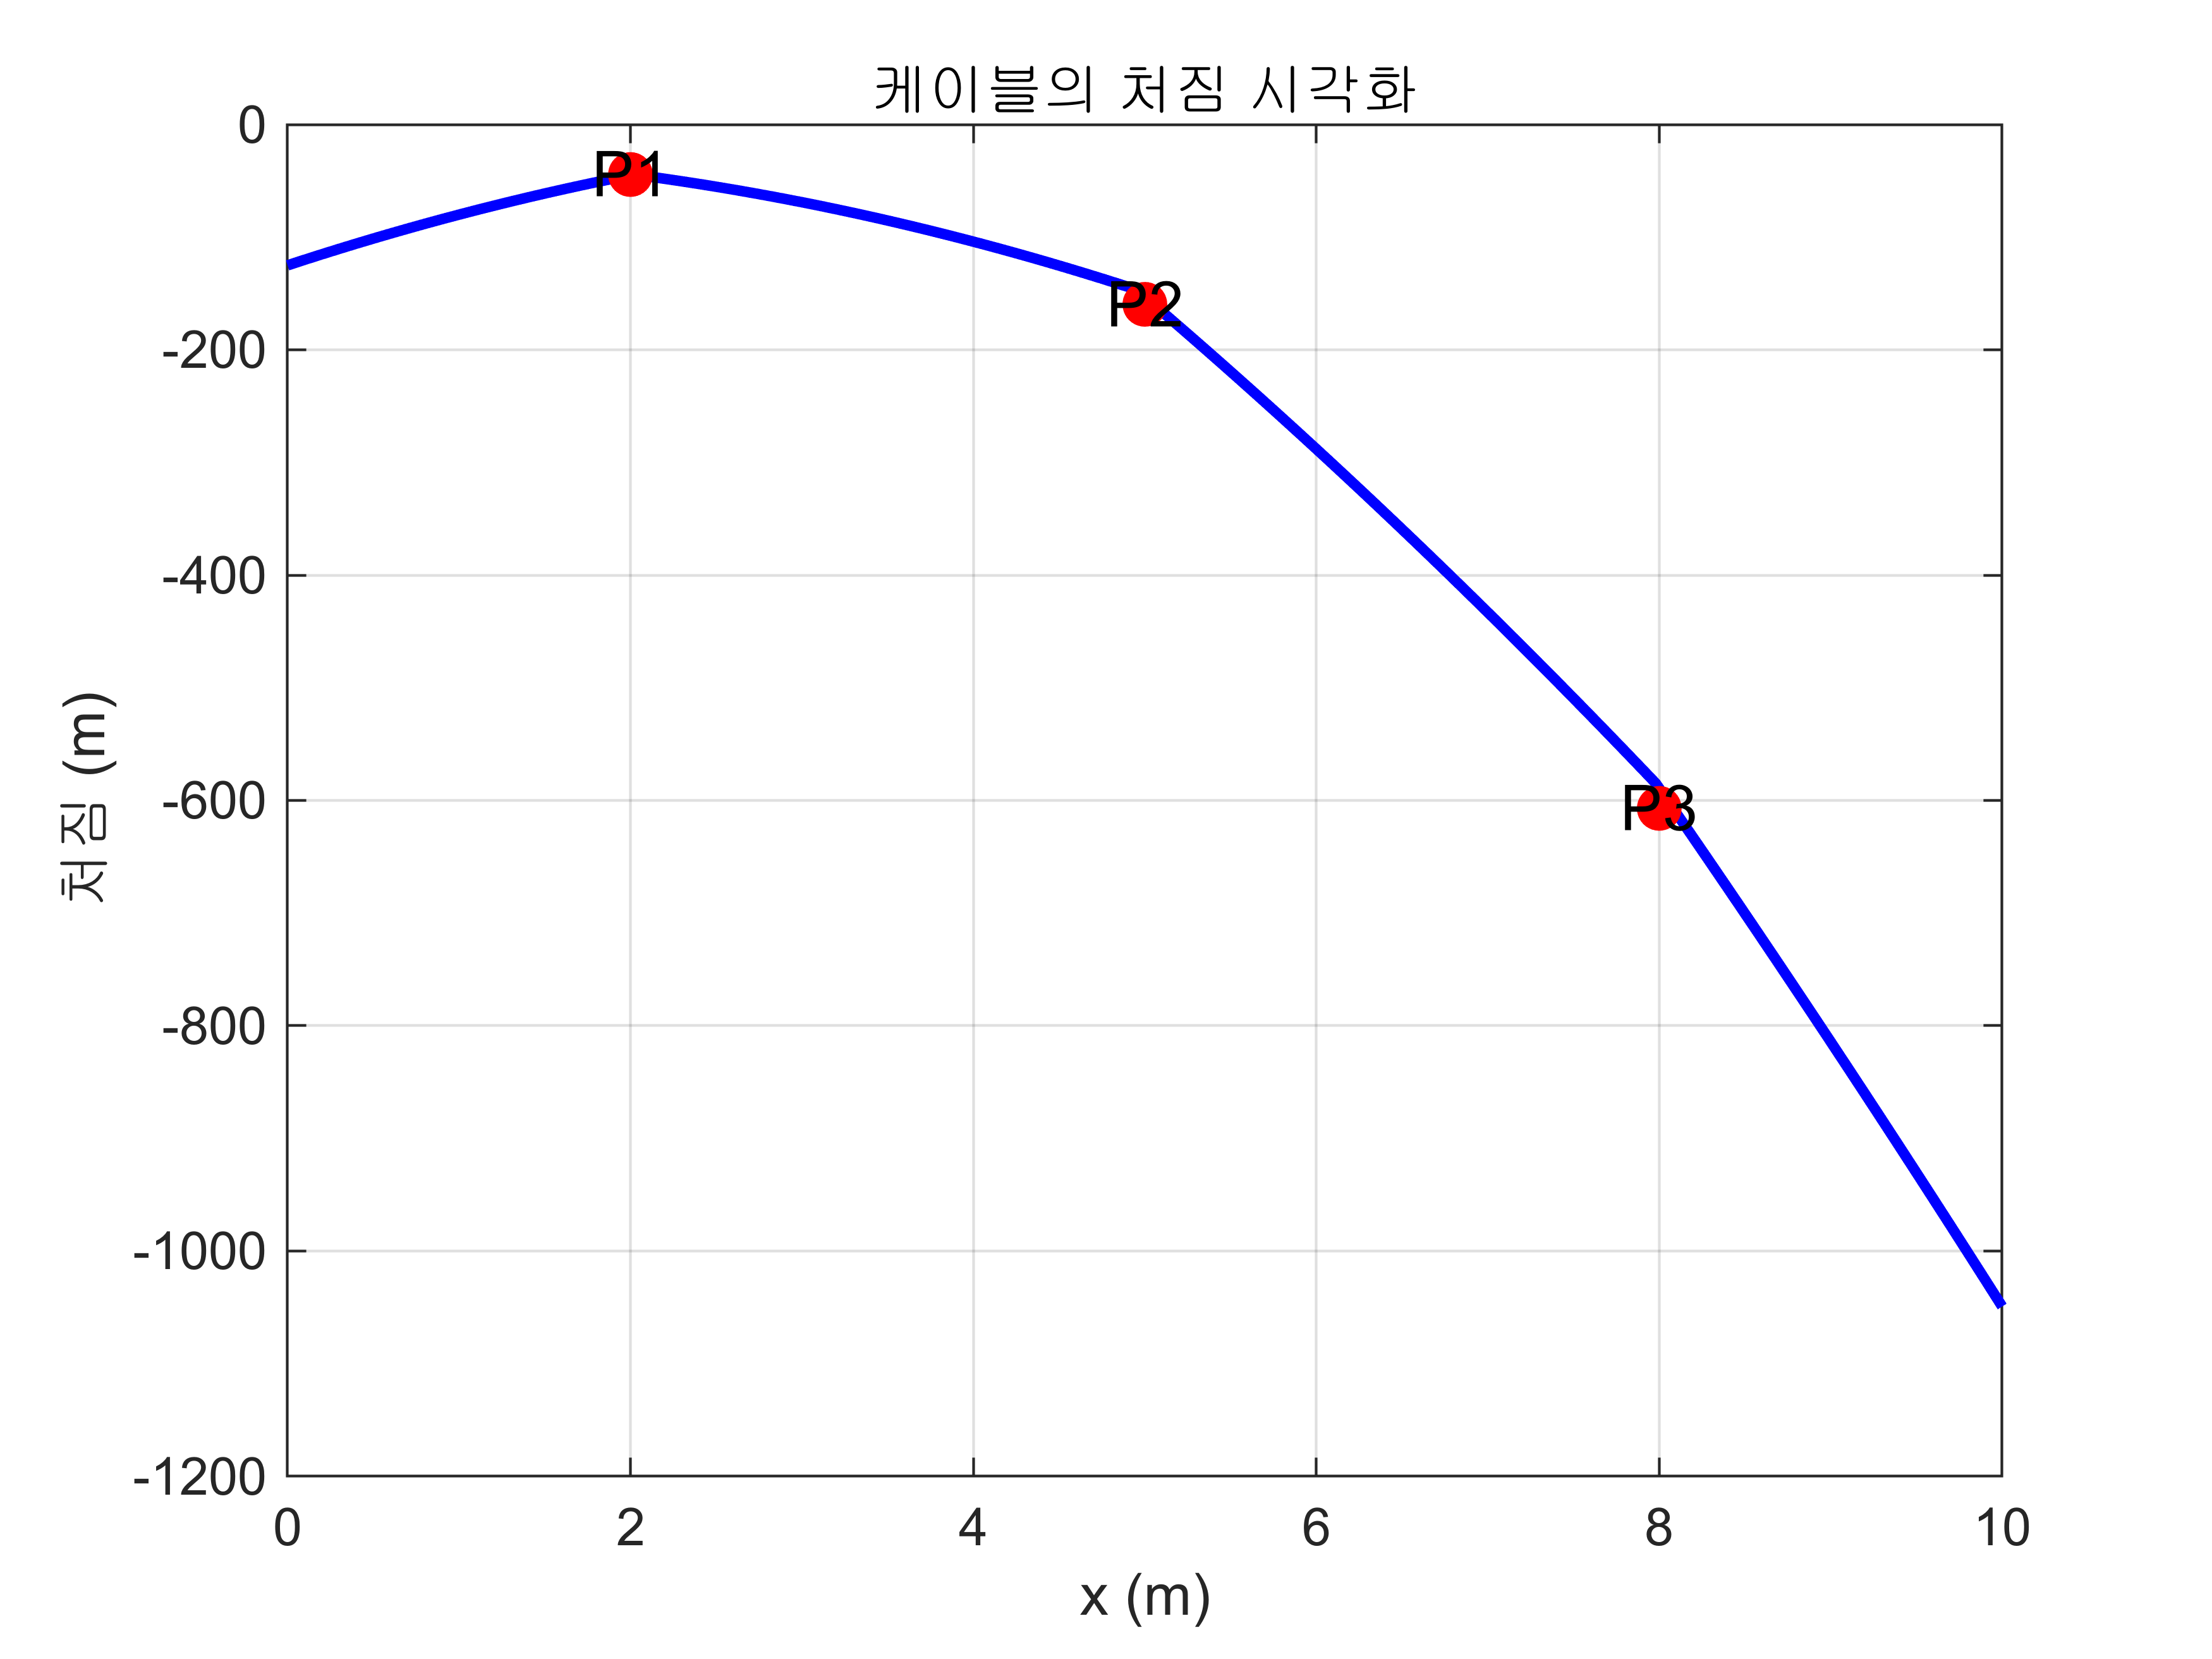

In [64]:
% 케이블의 길이와 분할
L = 10; % 케이블의 총 길이 (m)
n = 100; % 케이블을 분할할 수 (더 많을수록 정확)

% 케이블의 위치 배열
x = linspace(0, L, n);
y = zeros(1, n); % 초기 케이블의 처짐을 0으로 초기화

% 집중하중 설정
P = [500, 800, 600]; % 집중하중 (N)
P_pos = [2, 5, 8]; % 집중하중의 위치 (m)

% 분포하중 설정
w = 100; % 분포하중 (N/m)

% 집중하중에 의한 처짐 계산
for i = 1:length(P)
    % 하중이 작용하는 위치에 가장 가까운 인덱스 찾기
    [~, idx] = min(abs(x - P_pos(i)));
    y(idx:end) = y(idx:end) - P(i) * (x(idx:end) - x(idx)) / L; % 선형적으로 처짐 추가
end

% 분포하중에 의한 처짐 계산
y = y - w * (x - L/2).^2 / (2 * L); % 분포하중에 의한 포물선 형태의 처짐

% 그래프 그리기
figure;
plot(x, y, 'b-', 'LineWidth', 2);
hold on;

% 집중하중 표시
for i = 1:length(P_pos)
    plot(P_pos(i), y(find(x >= P_pos(i), 1)), 'ro', 'MarkerSize', 8, 'MarkerFaceColor', 'r');
    text(P_pos(i), y(find(x >= P_pos(i), 1)) - 0.2, ['P' num2str(i)], 'FontSize', 12, 'HorizontalAlignment', 'center');
end

% 그래프 설정
xlabel('x (m)');
ylabel('처짐 (m)');
title('케이블의 처짐 시각화');
grid on;
hold off;

<p style="text-align:left">
   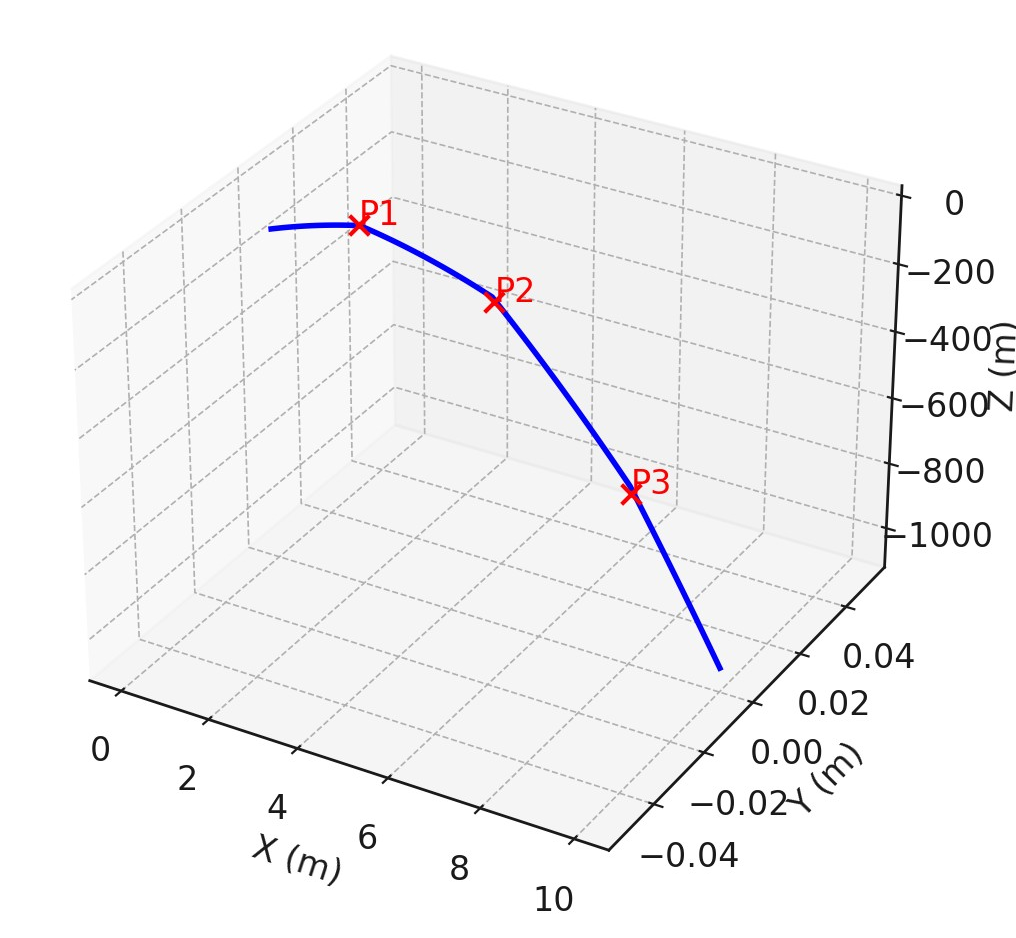
</p>



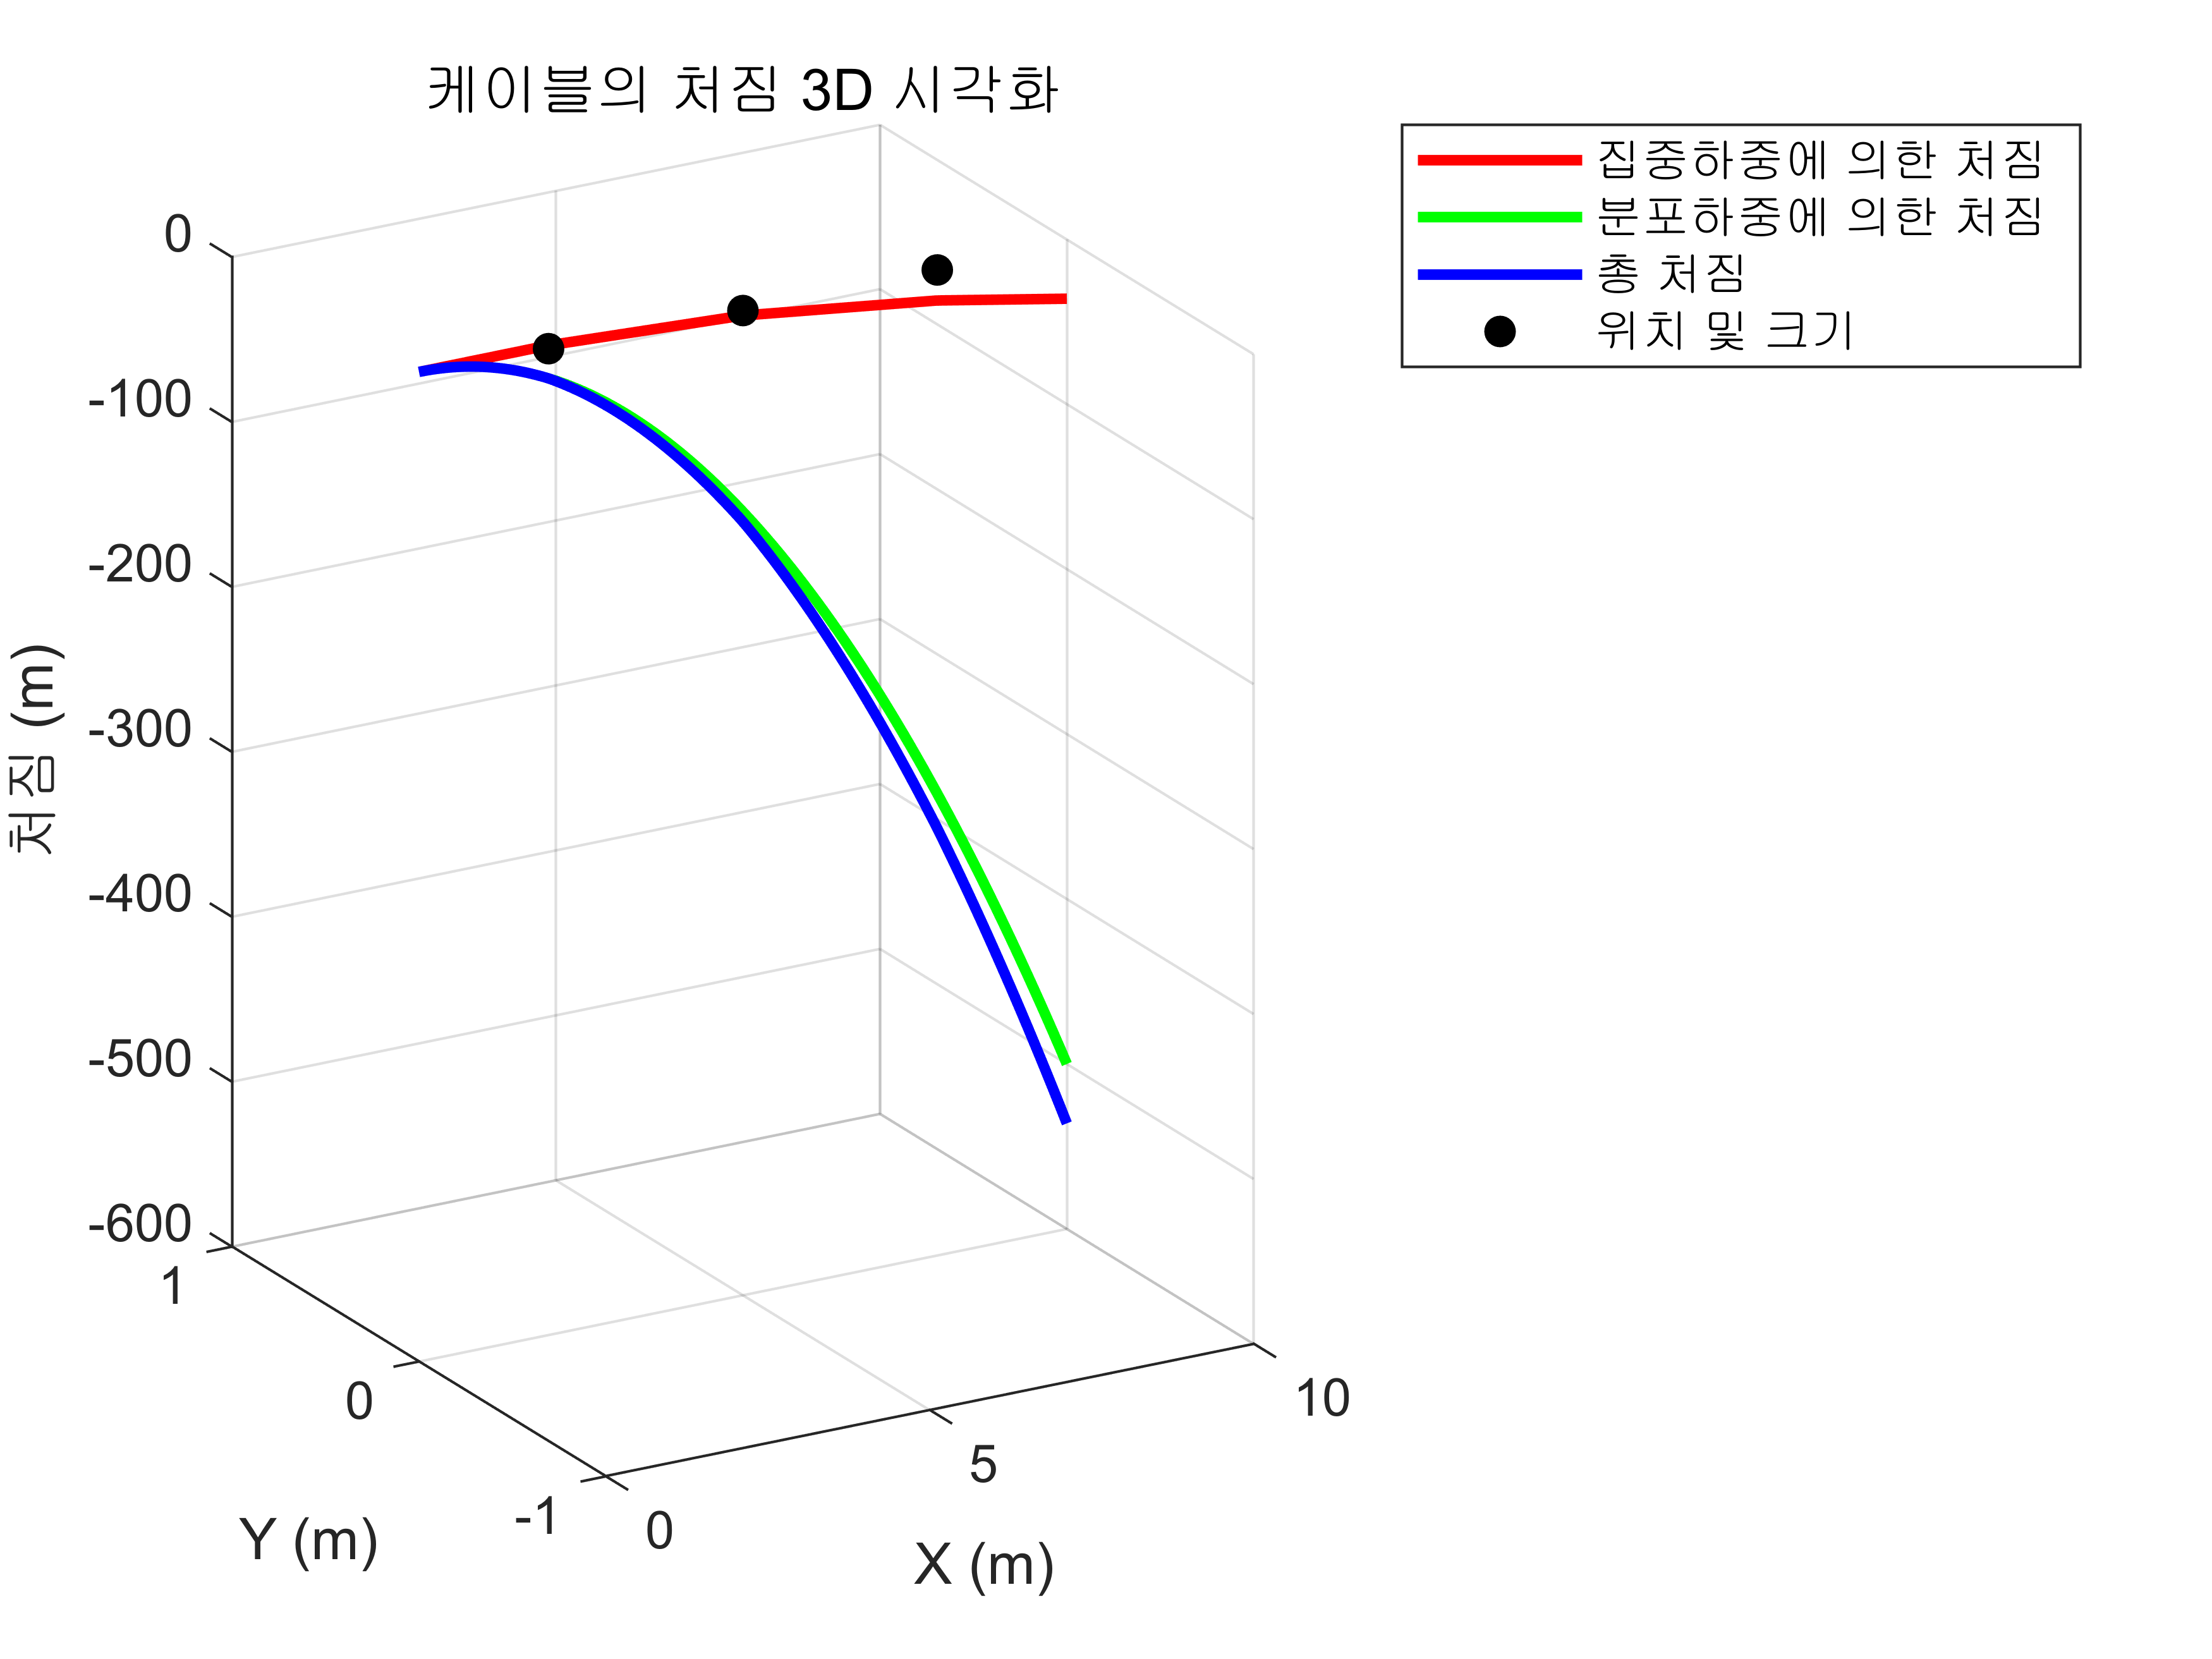

In [65]:
% 케이블 길이 및 지점 설정
L = 10; % 케이블 길이 (m)
x = linspace(0, L, 100); % 케이블 지점

% 집중하중 설정
P1 = 200; % 1번째 집중하중 (N)
P2 = 300; % 2번째 집중하중 (N)
P3 = 250; % 3번째 집중하중 (N)

% 집중하중 위치
xP1 = 2;
xP2 = 5;
xP3 = 8;

% 분포하중 설정
w = 100; % 분포하중 (N/m)

% 케이블 처짐 계산 (단순 모델링)
y_concentrated = zeros(size(x));
y_distributed = zeros(size(x));
for i = 1:length(x)
    % 집중하중에 의한 처짐
    if x(i) >= xP1
        y_concentrated(i) = y_concentrated(i) - P1 * (x(i) - xP1) / 100;
    end
    if x(i) >= xP2
        y_concentrated(i) = y_concentrated(i) - P2 * (x(i) - xP2) / 100;
    end
    if x(i) >= xP3
        y_concentrated(i) = y_concentrated(i) - P3 * (x(i) - xP3) / 100;
    end

    % 분포하중에 의한 처짐
    y_distributed(i) = -w * x(i)^2 / (2 * L);
end

% 총 처짐
y_total = y_concentrated + y_distributed;

% 3D 그래프 그리기
figure;
plot3(x, zeros(size(x)), y_concentrated, 'r', 'LineWidth', 2); hold on; % 집중하중에 의한 처짐
plot3(x, zeros(size(x)), y_distributed, 'g', 'LineWidth', 2); % 분포하중에 의한 처짐
plot3(x, zeros(size(x)), y_total, 'b', 'LineWidth', 2); % 총 처짐
scatter3([xP1, xP2, xP3], [0, 0, 0], [-P1, -P2, -P3] / 100, 'ko', 'filled'); % 집중하중 위치 표시
grid on;
xlabel('X (m)');
ylabel('Y (m)');
zlabel('처짐 (m)');
legend('집중하중에 의한 처짐', '분포하중에 의한 처짐', '총 처짐', '위치 및 크기');
title('케이블의 처짐 3D 시각화');
view(-30, 15);
hold off;

<p style="text-align:left">
   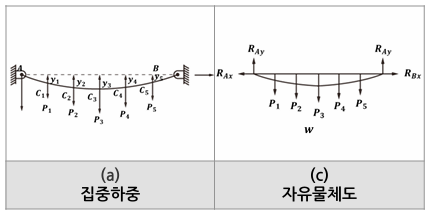
</p>



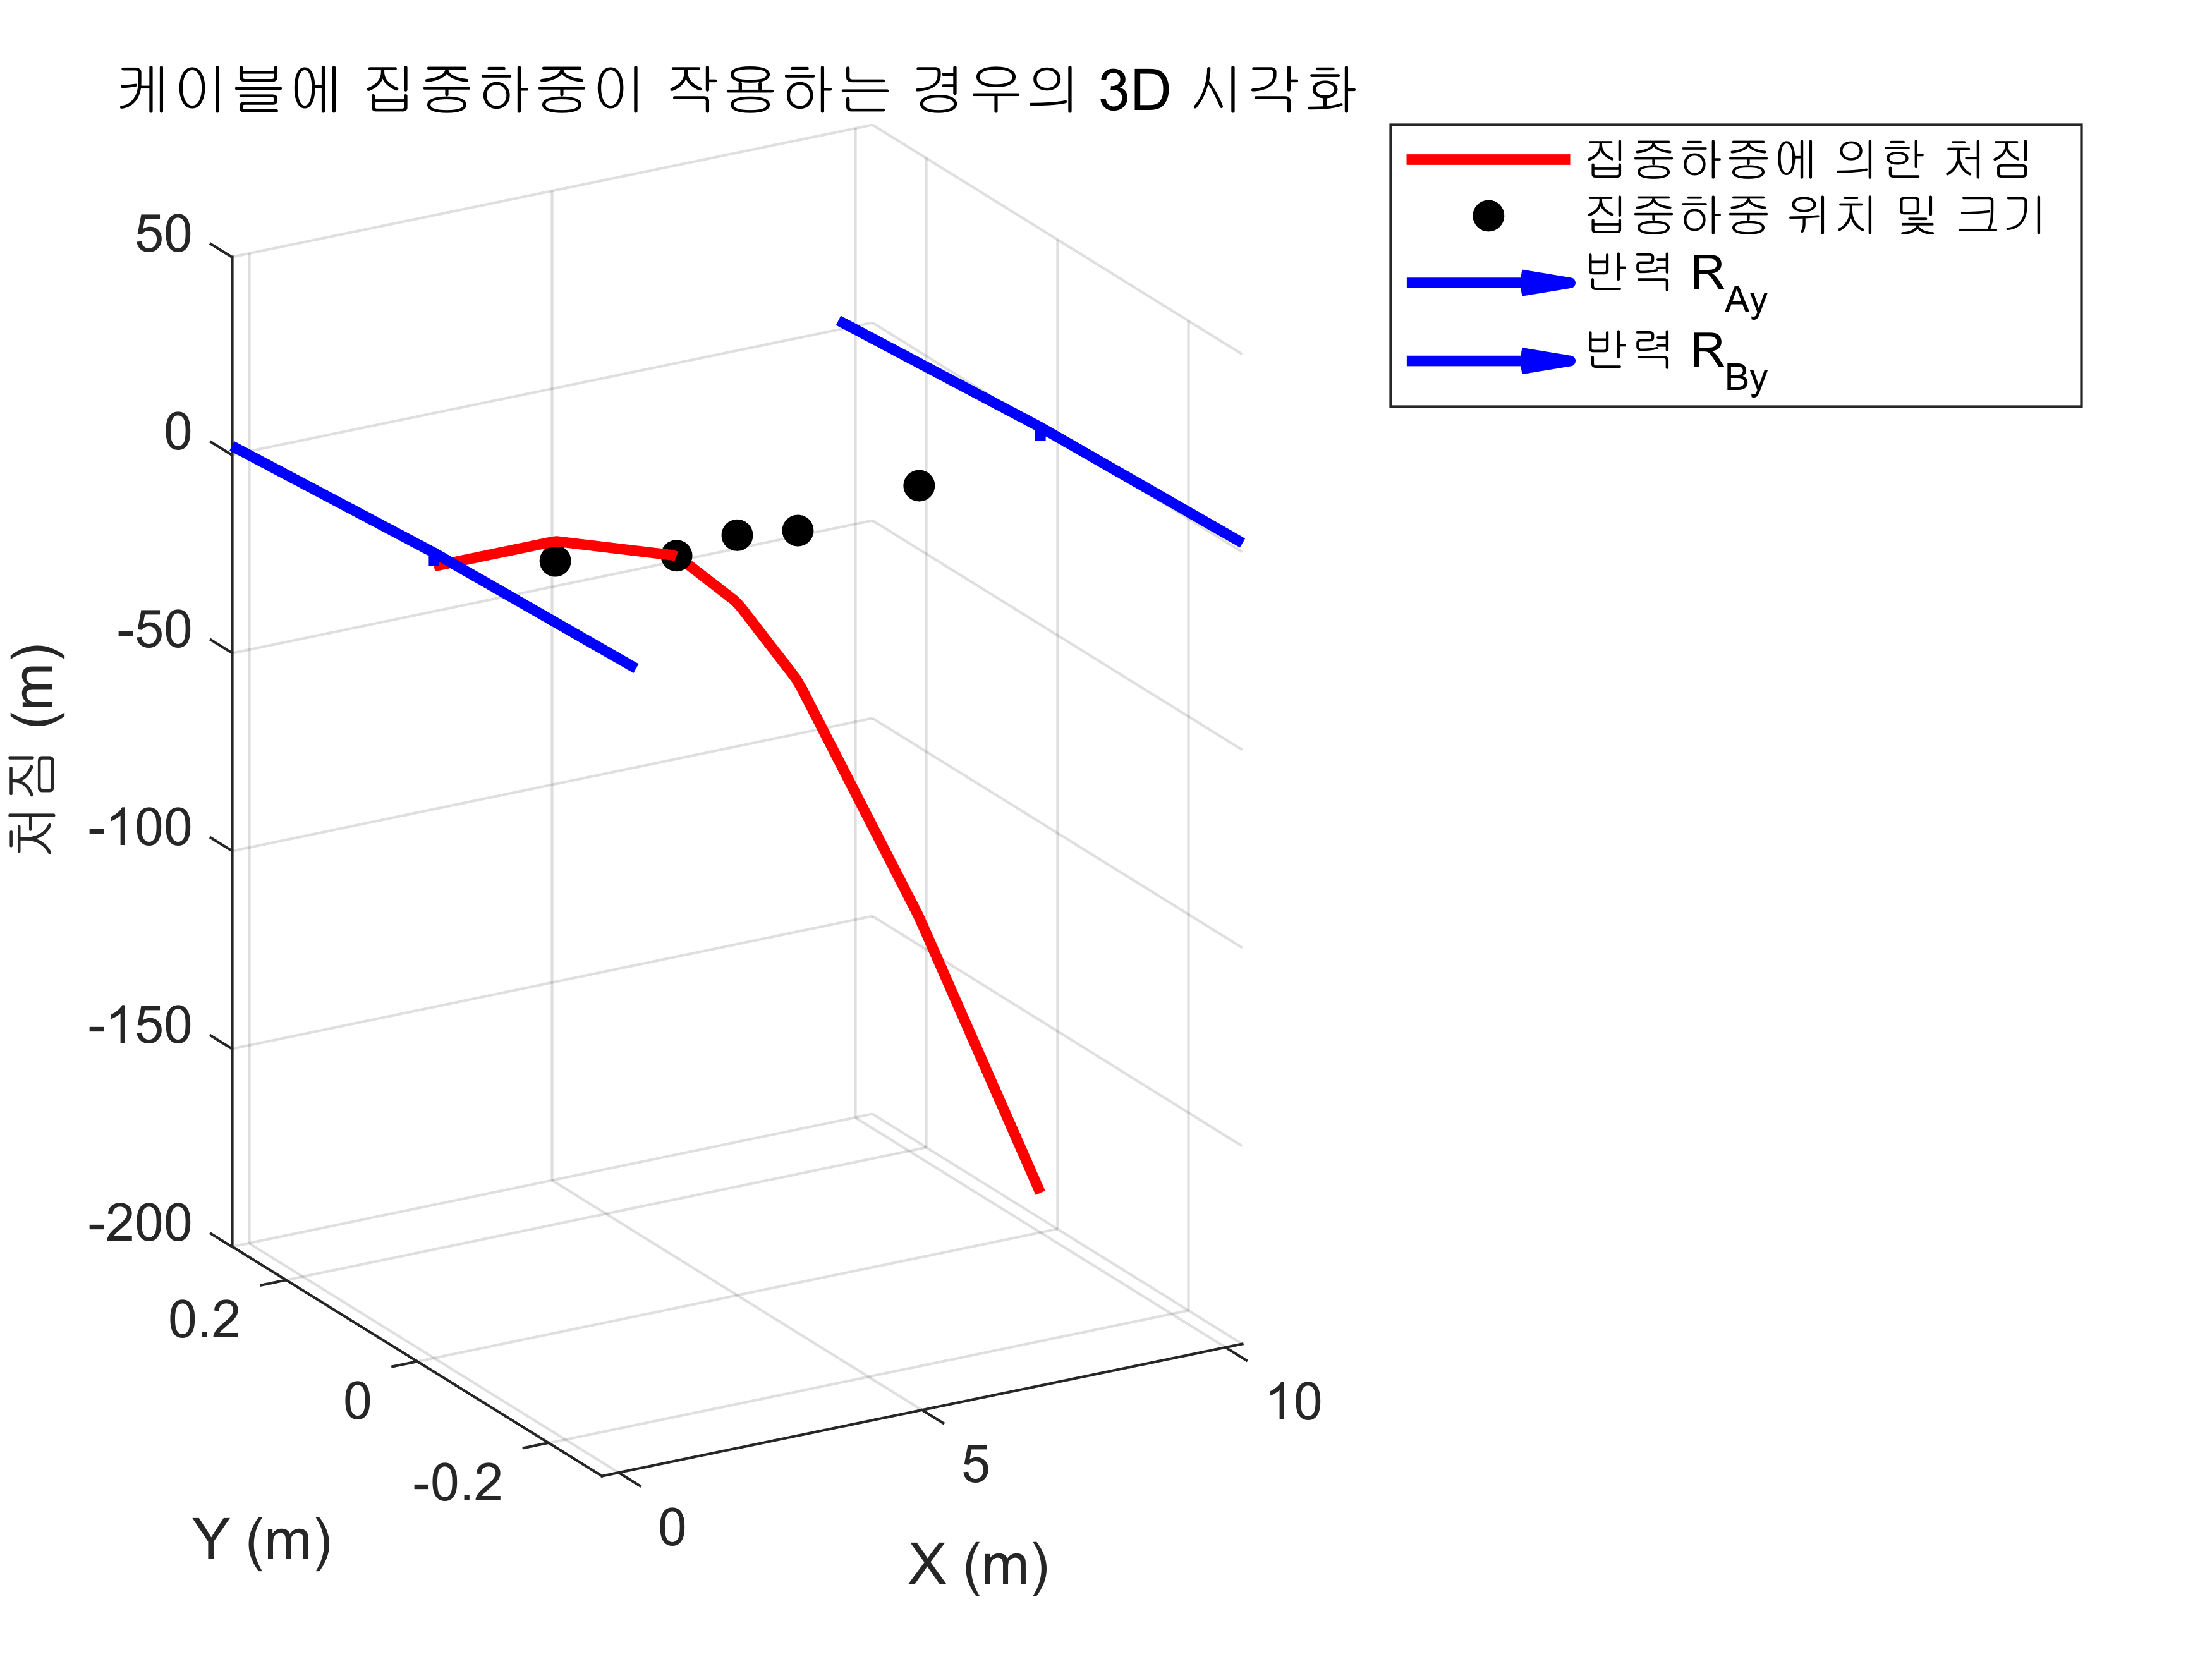

In [66]:
% 케이블 길이 및 지점 설정
L = 10; % 케이블 길이 (m)
x = linspace(0, L, 100); % 케이블 지점

% 집중하중 설정 (각 하중이 중심에서 대칭적으로 배치됨)
P = [500, 1000, 800, 1000, 500]; % 집중하중 크기 (N)
xP = [2, 4, 5, 6, 8]; % 집중하중 위치 (m)

% 케이블의 양 끝 고정 지점의 반력 계산
RAy = sum(P) / 2; % 좌측 반력 (N)
RBy = sum(P) / 2; % 우측 반력 (N)

% 케이블 처짐 계산 (단순 모델링)
y_concentrated = zeros(size(x));
for i = 1:length(x)
    for j = 1:length(P)
        if x(i) >= xP(j)
            y_concentrated(i) = y_concentrated(i) - P(j) * (x(i) - xP(j)) / 100;
        end
    end
end

% 3D 그래프 그리기
figure;
plot3(x, zeros(size(x)), y_concentrated, 'r', 'LineWidth', 2); hold on; % 집중하중에 의한 처짐
scatter3(xP, zeros(size(xP)), -P / 100, 'ko', 'filled'); % 집중하중 위치 및 크기 표시
quiver3(0, 0, 0, 0, 0, RAy / 500, 'b', 'LineWidth', 2, 'MaxHeadSize', 1); % 좌측 반력 표시
quiver3(L, 0, 0, 0, 0, RBy / 500, 'b', 'LineWidth', 2, 'MaxHeadSize', 1); % 우측 반력 표시
grid on;
xlabel('X (m)');
ylabel('Y (m)');
zlabel('처짐 (m)');
legend('집중하중에 의한 처짐', '집중하중 위치 및 크기', '반력 R_A_y', '반력 R_B_y');
title('케이블에 집중하중이 작용하는 경우의 3D 시각화');
view(-30, 15);
hold off;


<p style="text-align:left">
   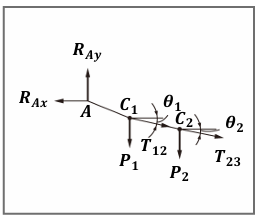
</p>



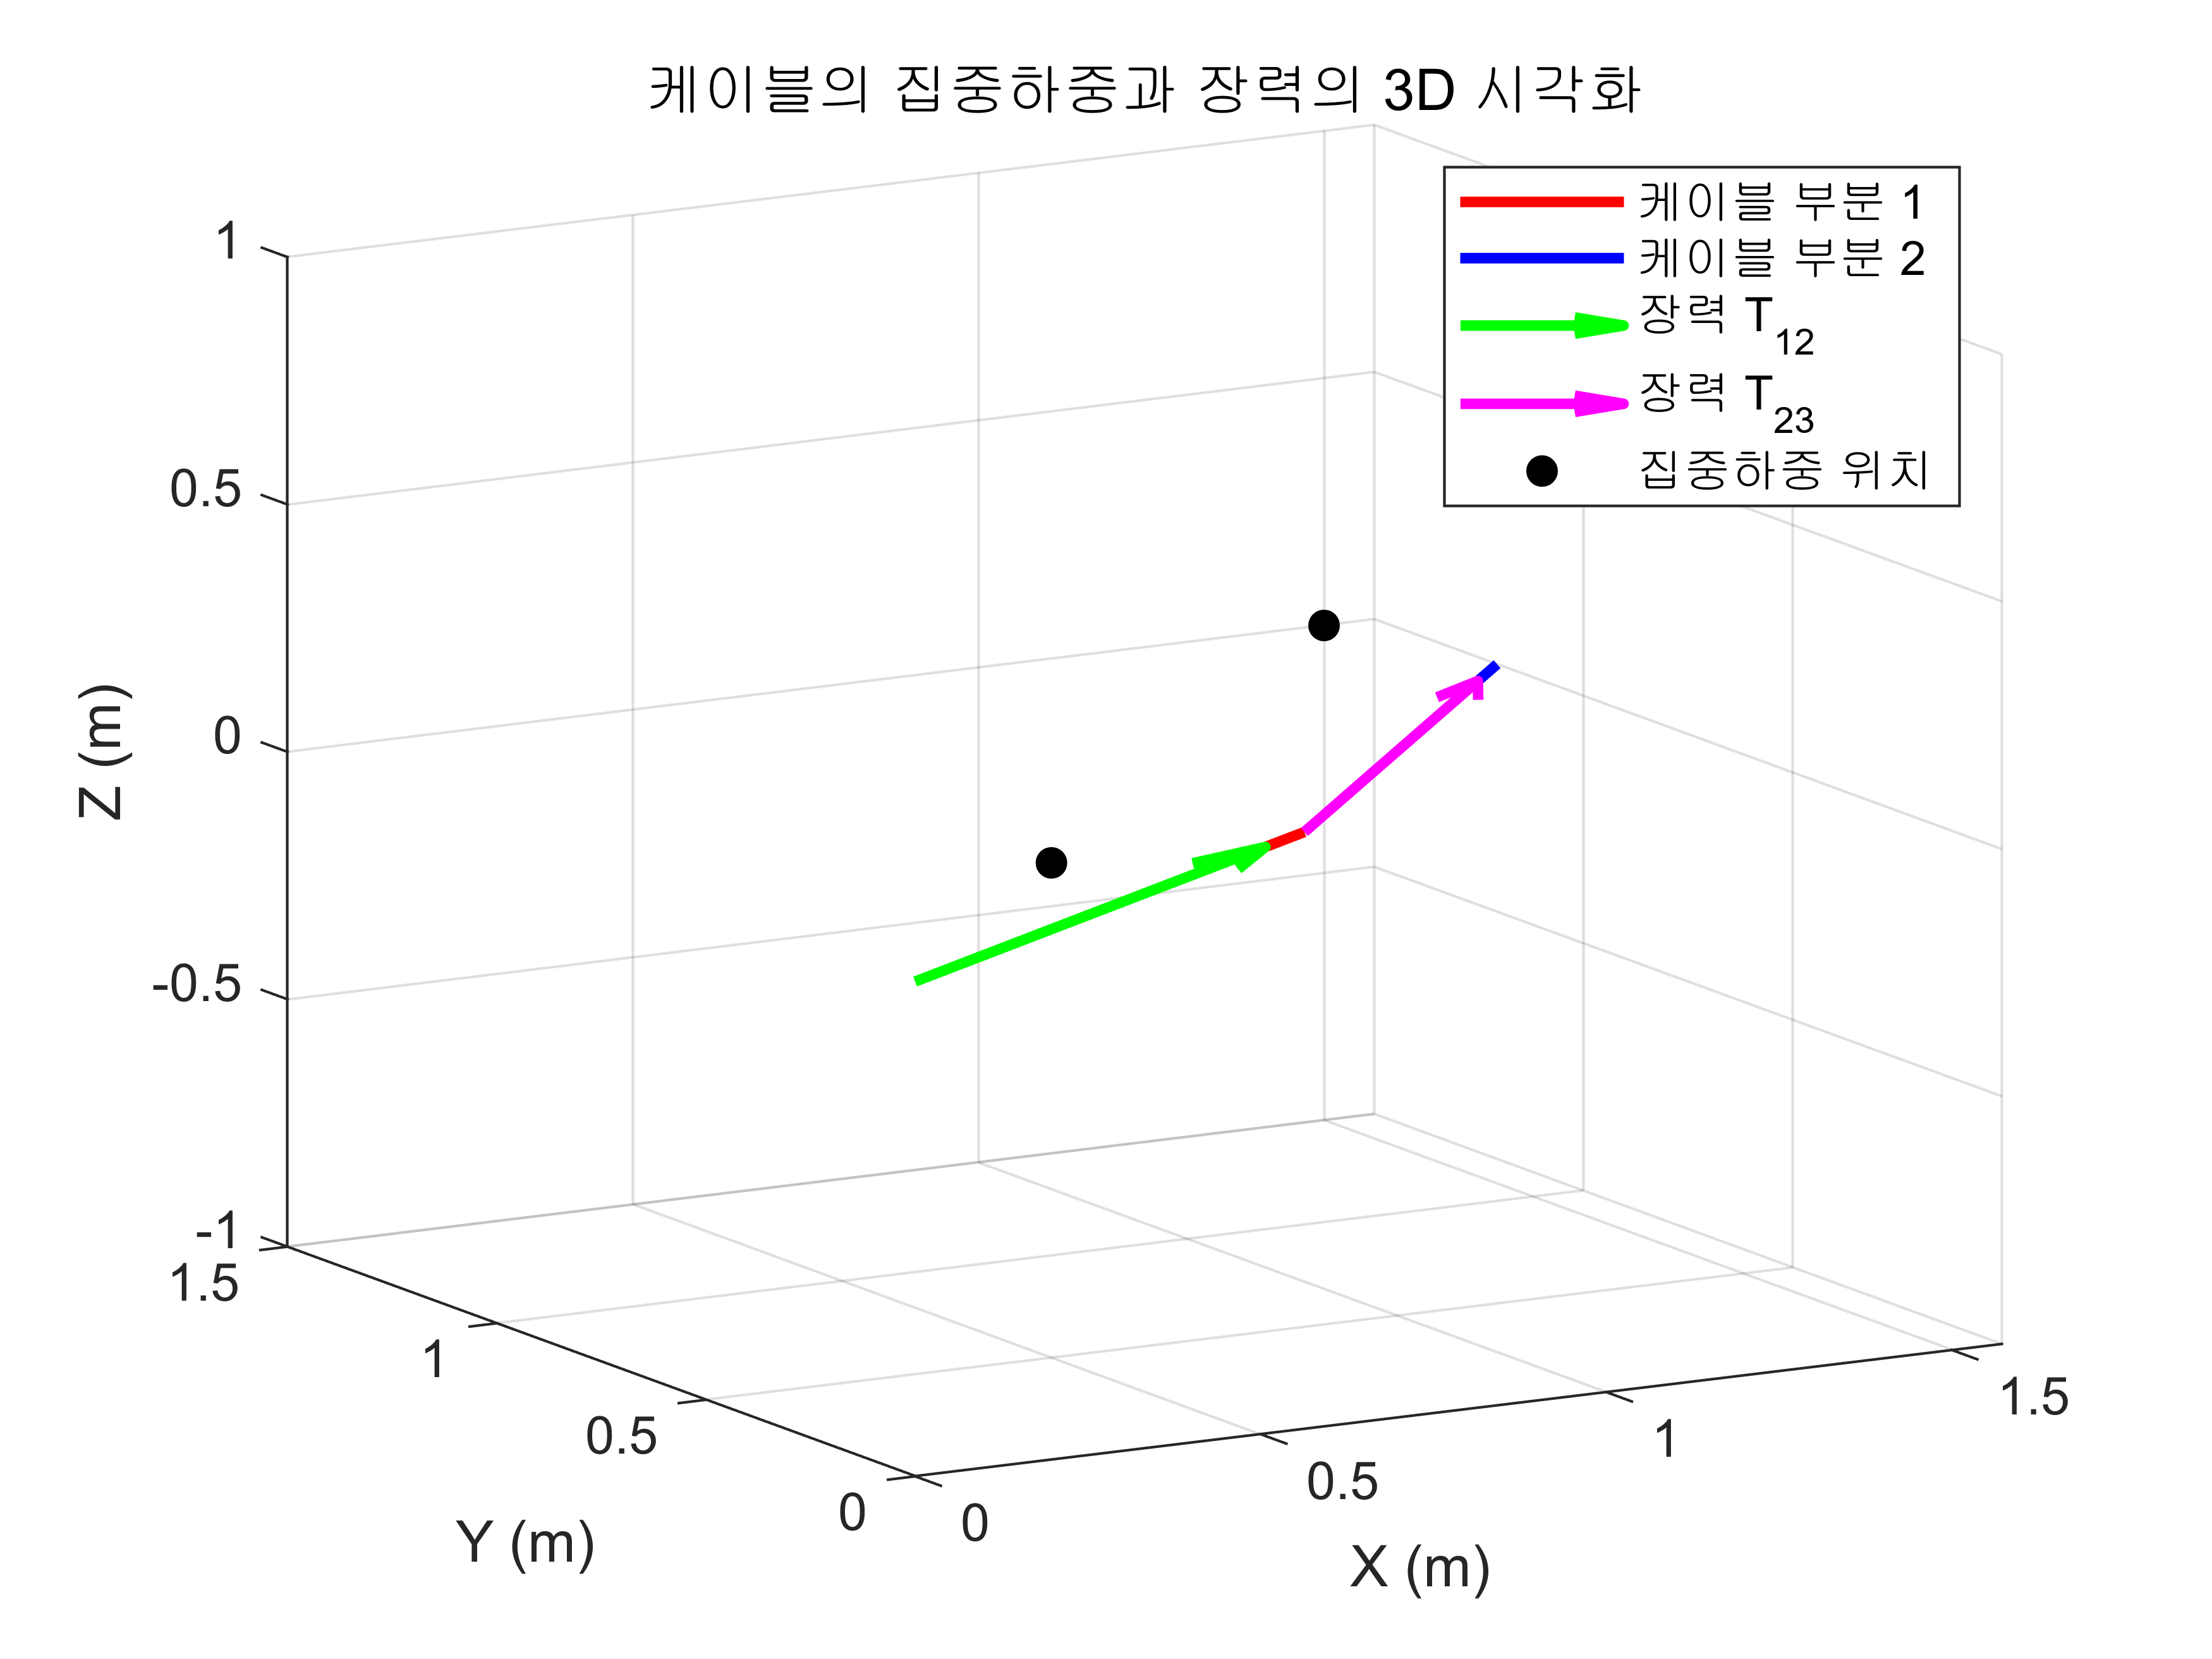

In [67]:
% 각도 및 힘 설정
theta1 = 30; % 각도 θ1 (deg)
theta2 = 45; % 각도 θ2 (deg)
RAx = 1000; % 수평 반력 (N)
P1 = 500; % 집중하중 P1 (N)
P2 = 800; % 집중하중 P2 (N)

% 장력 계산
T23 = RAx / cosd(theta2);
T12 = RAx / cosd(theta1);

% 수평 성분 확인
RAx_check1 = T12 * cosd(theta1);
RAx_check2 = T23 * cosd(theta2);

% 3D 그래프 그리기
figure;
hold on;
% 케이블 각 부분의 시각화
plot3([0, cosd(theta1)], [0, sind(theta1)], [0, 0], 'r', 'LineWidth', 2); % 첫 번째 케이블 부분
plot3([cosd(theta1), cosd(theta1) + cosd(theta2)], [sind(theta1), sind(theta1) + sind(theta2)], [0, 0], 'b', 'LineWidth', 2); % 두 번째 케이블 부분

% 힘의 벡터 시각화
quiver3(0, 0, 0, cosd(theta1), sind(theta1), 0, 'g', 'LineWidth', 2, 'MaxHeadSize', 0.5); % T12 벡터
quiver3(cosd(theta1), sind(theta1), 0, cosd(theta2), sind(theta2), 0, 'm', 'LineWidth', 2, 'MaxHeadSize', 0.5); % T23 벡터

% 집중하중 표시
scatter3(0.5, 0.5, 0, 'ko', 'filled');
scatter3(1.5, 1.5, 0, 'ko', 'filled');

% 그래프 설정
grid on;
xlabel('X (m)');
ylabel('Y (m)');
zlabel('Z (m)');
title('케이블의 집중하중과 장력의 3D 시각화');
legend('케이블 부분 1', '케이블 부분 2', '장력 T_{12}', '장력 T_{23}', '집중하중 위치');
view(-30, 15);
hold off;

In [68]:

% 결과 출력
fprintf('장력 T12: %.2f N\n', T12);

장력 T12: 1154.70 N

In [69]:
fprintf('장력 T23: %.2f N\n', T23);

장력 T23: 1414.21 N

In [70]:
fprintf('수평 반력 RAx: %.2f N\n', RAx);

수평 반력 RAx: 1000.00 N

In [71]:
fprintf('확인된 수평 성분 (T12): %.2f N\n', RAx_check1);

확인된 수평 성분 (T12): 1000.00 N

In [72]:
fprintf('확인된 수평 성분 (T23): %.2f N\n', RAx_check2);

확인된 수평 성분 (T23): 1000.00 N


<p style="text-align:left">
   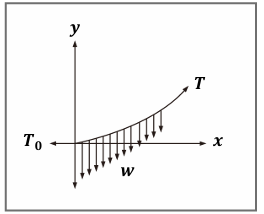
</p>



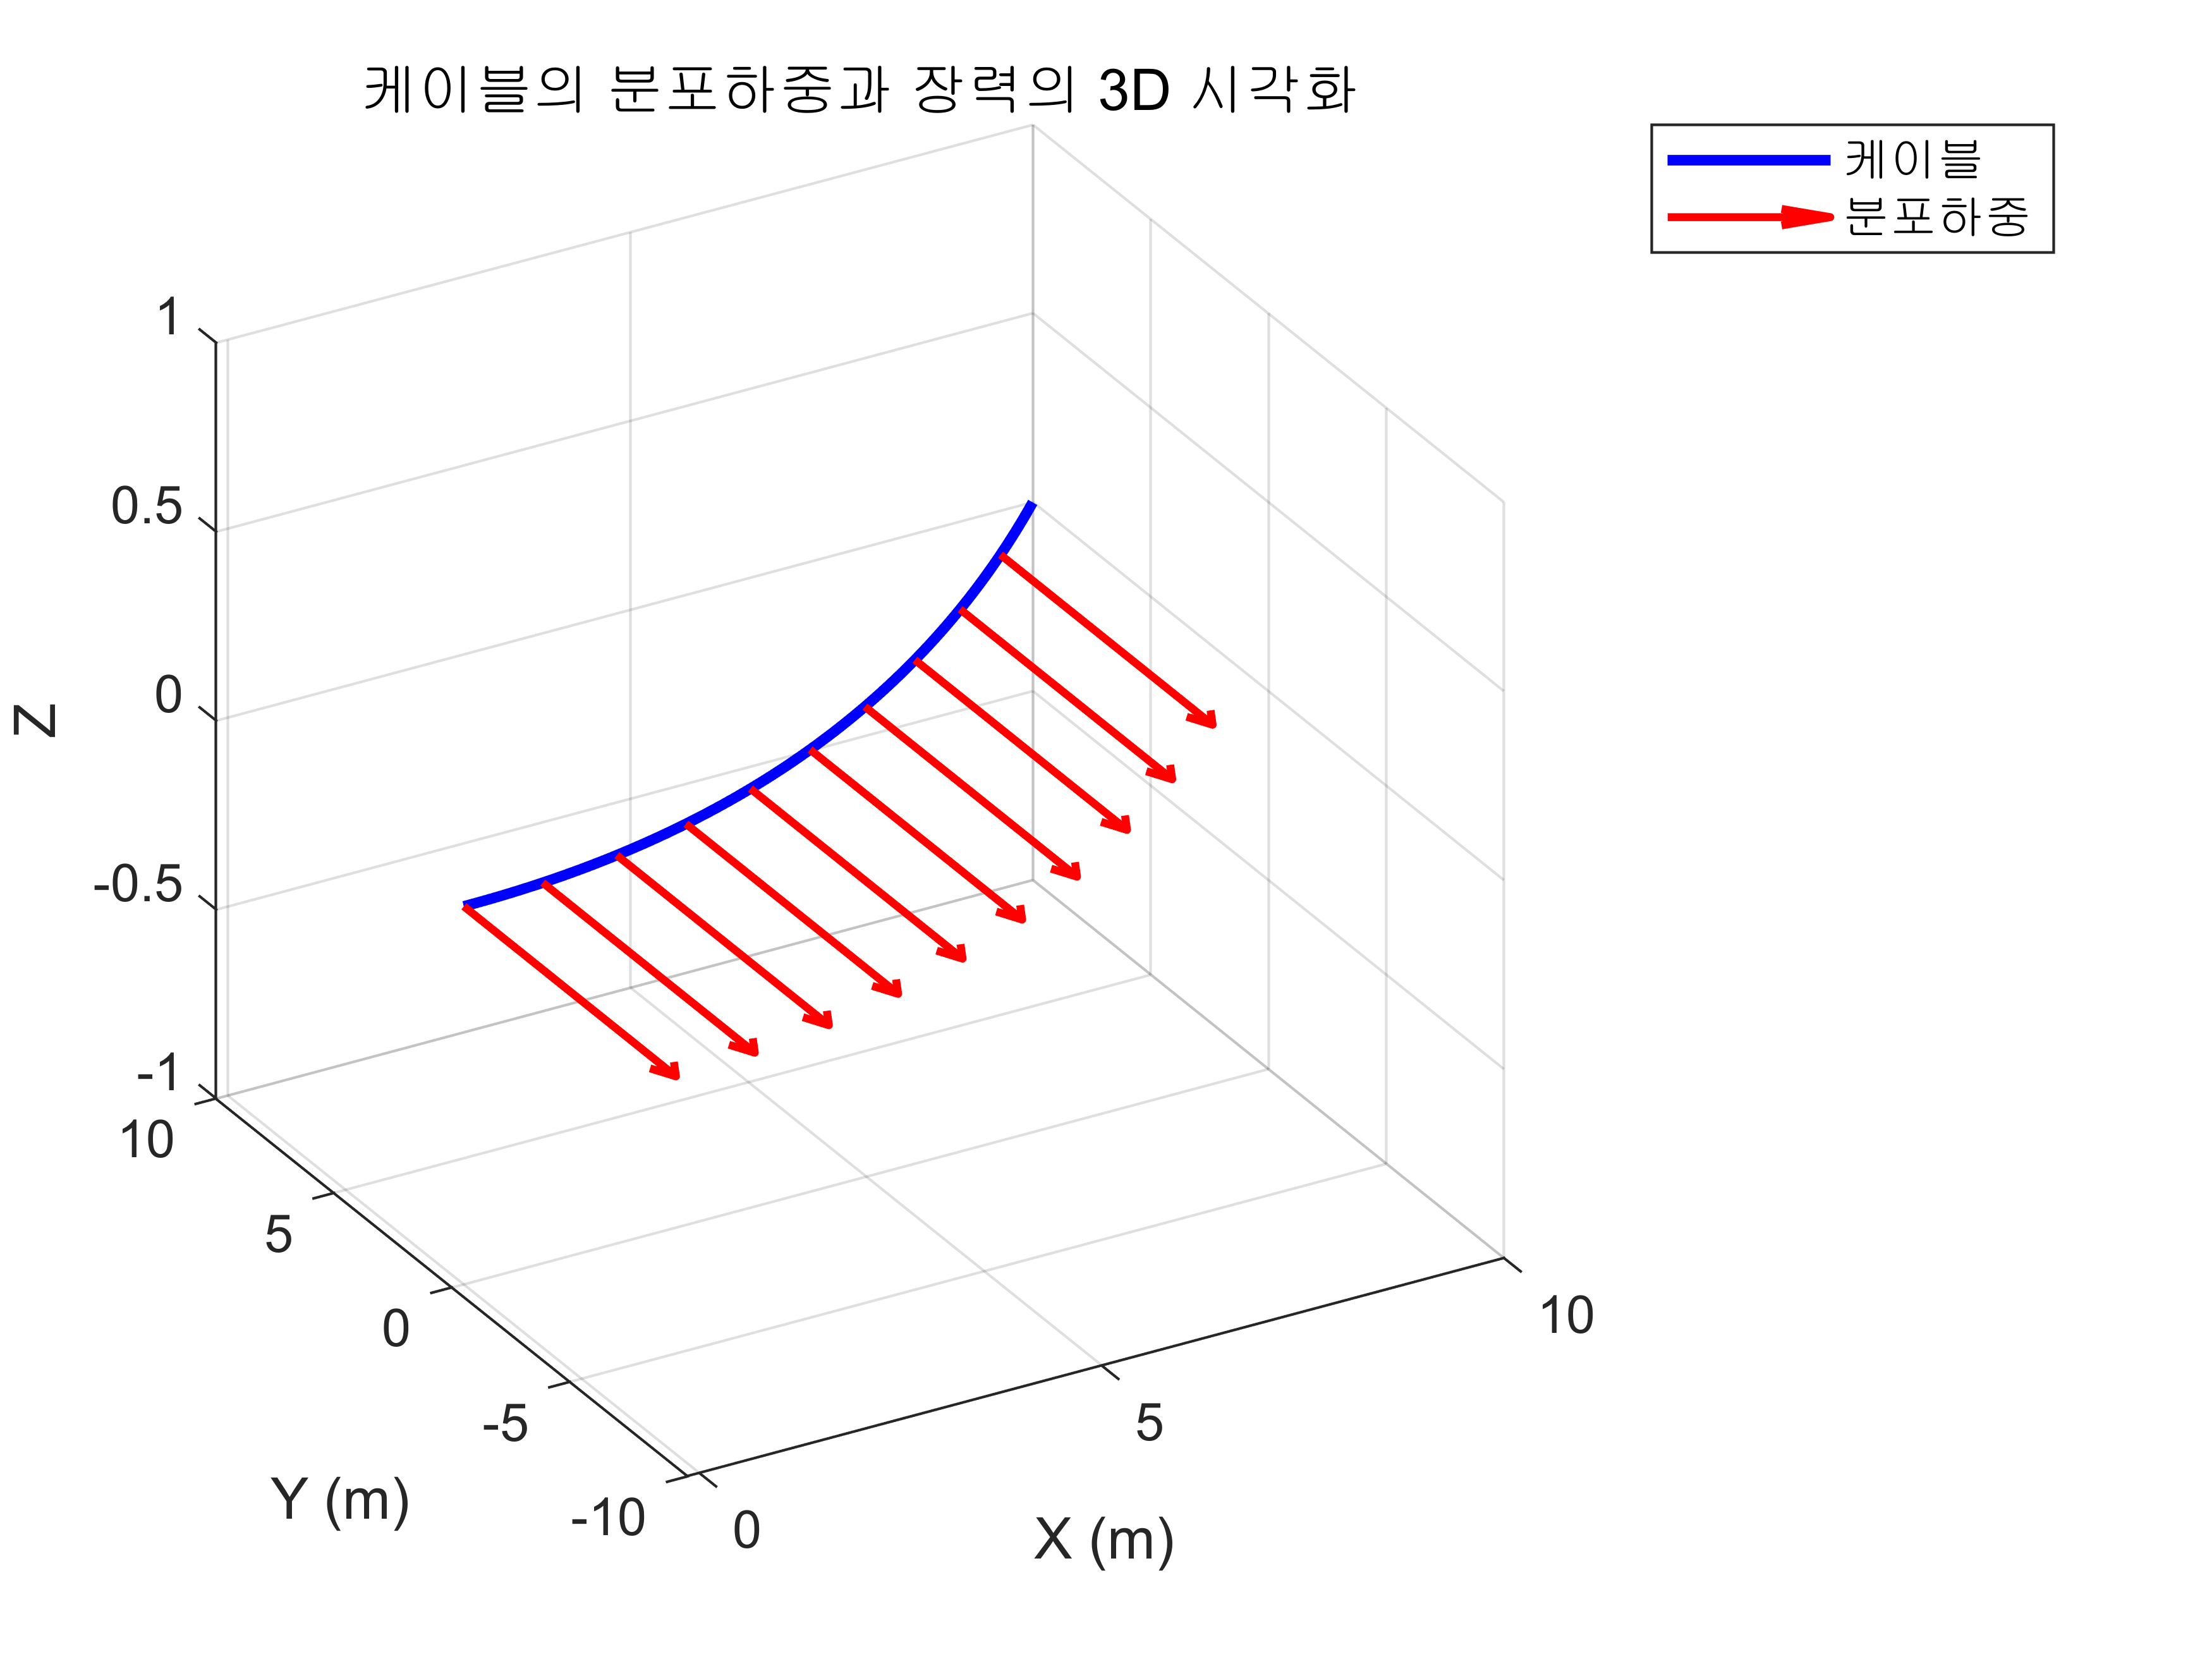

In [73]:
% 매개변수 설정
L = 10; % 케이블의 길이 (m)
w = 100; % 단위 길이당 분포하중 (N/m)
To = 500; % 케이블의 초기 장력 (N)

% 위치 벡터 설정
x = linspace(0, L, 100); % x축 위치
y = (w / (2 * To)) * x.^2; % 포물선 형태로 늘어나는 케이블의 y축 위치

% 케이블의 장력 T
T = sqrt(To^2 + (w * x).^2);

% 3D 그래프 그리기
figure;
plot3(x, y, zeros(size(x)), 'b', 'LineWidth', 2); % 케이블의 3D 궤적
hold on;

% 분포하중을 시각화하기 위해 화살표 그리기
for i = 1:10:length(x)
    quiver3(x(i), y(i), 0, 0, -w/10, 0, 'r', 'LineWidth', 1.5);
end

% 그래프 설정
grid on;
xlabel('X (m)');
ylabel('Y (m)');
zlabel('Z');
title('케이블의 분포하중과 장력의 3D 시각화');
legend('케이블', '분포하중');
view(-30, 30);
hold off;

In [74]:

% 결과 출력
fprintf('케이블의 총 장력 T: %.2f N (x = L에서의 값)\n', T(end));

케이블의 총 장력 T: 1118.03 N (x = L에서의 값)

In [75]:
% 매개변수 설정
L = 10; % 케이블의 길이 (m)
w = 100; % 단위 길이당 분포하중 (N/m)

% 케이블에 작용하는 총 하중 W 계산
syms x
dW = w * x; % 미소 하중
W = int(dW, x, 0, L); % 총 하중
W_val = double(W);

% 하중의 작용점 x_bar 계산
x_bar = int(x * dW, x, 0, L) / W; % 작용점
x_bar_val = double(x_bar);

% 결과 출력
fprintf('총 하중 W: %.2f N\n', W_val);

총 하중 W: 5000.00 N

In [76]:
fprintf('하중의 작용점 x_bar: %.2f m\n', x_bar_val);

하중의 작용점 x_bar: 6.67 m


<p style="text-align:left">
   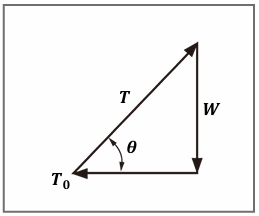
</p>


In [77]:
% 기호 변수 선언
syms T theta

% 주어진 값
T0 = 500; % x 방향의 장력 성분 (N)
W = 1000; % 수직 방향의 하중 (N)

% 평형 방정식
eq1 = T * cos(theta) - T0 == 0; % ΣFx = 0
eq2 = T * sin(theta) - W == 0;  % ΣFy = 0

% 방정식 풀기
sol = solve([eq1, eq2], [T, theta]);

% 결과
T_val = double(sol.T);
theta_val = double(sol.theta) * 180 / pi; % 라디안을 도로 변환

% 결과 출력
fprintf('장력 T: %.2f N\n', T_val);

장력 T: 1118.03 N
장력 T: -1118.03 N

In [78]:
fprintf('각도 θ: %.2f 도\n', theta_val);

각도 θ: 63.43 도
각도 θ: -116.57 도


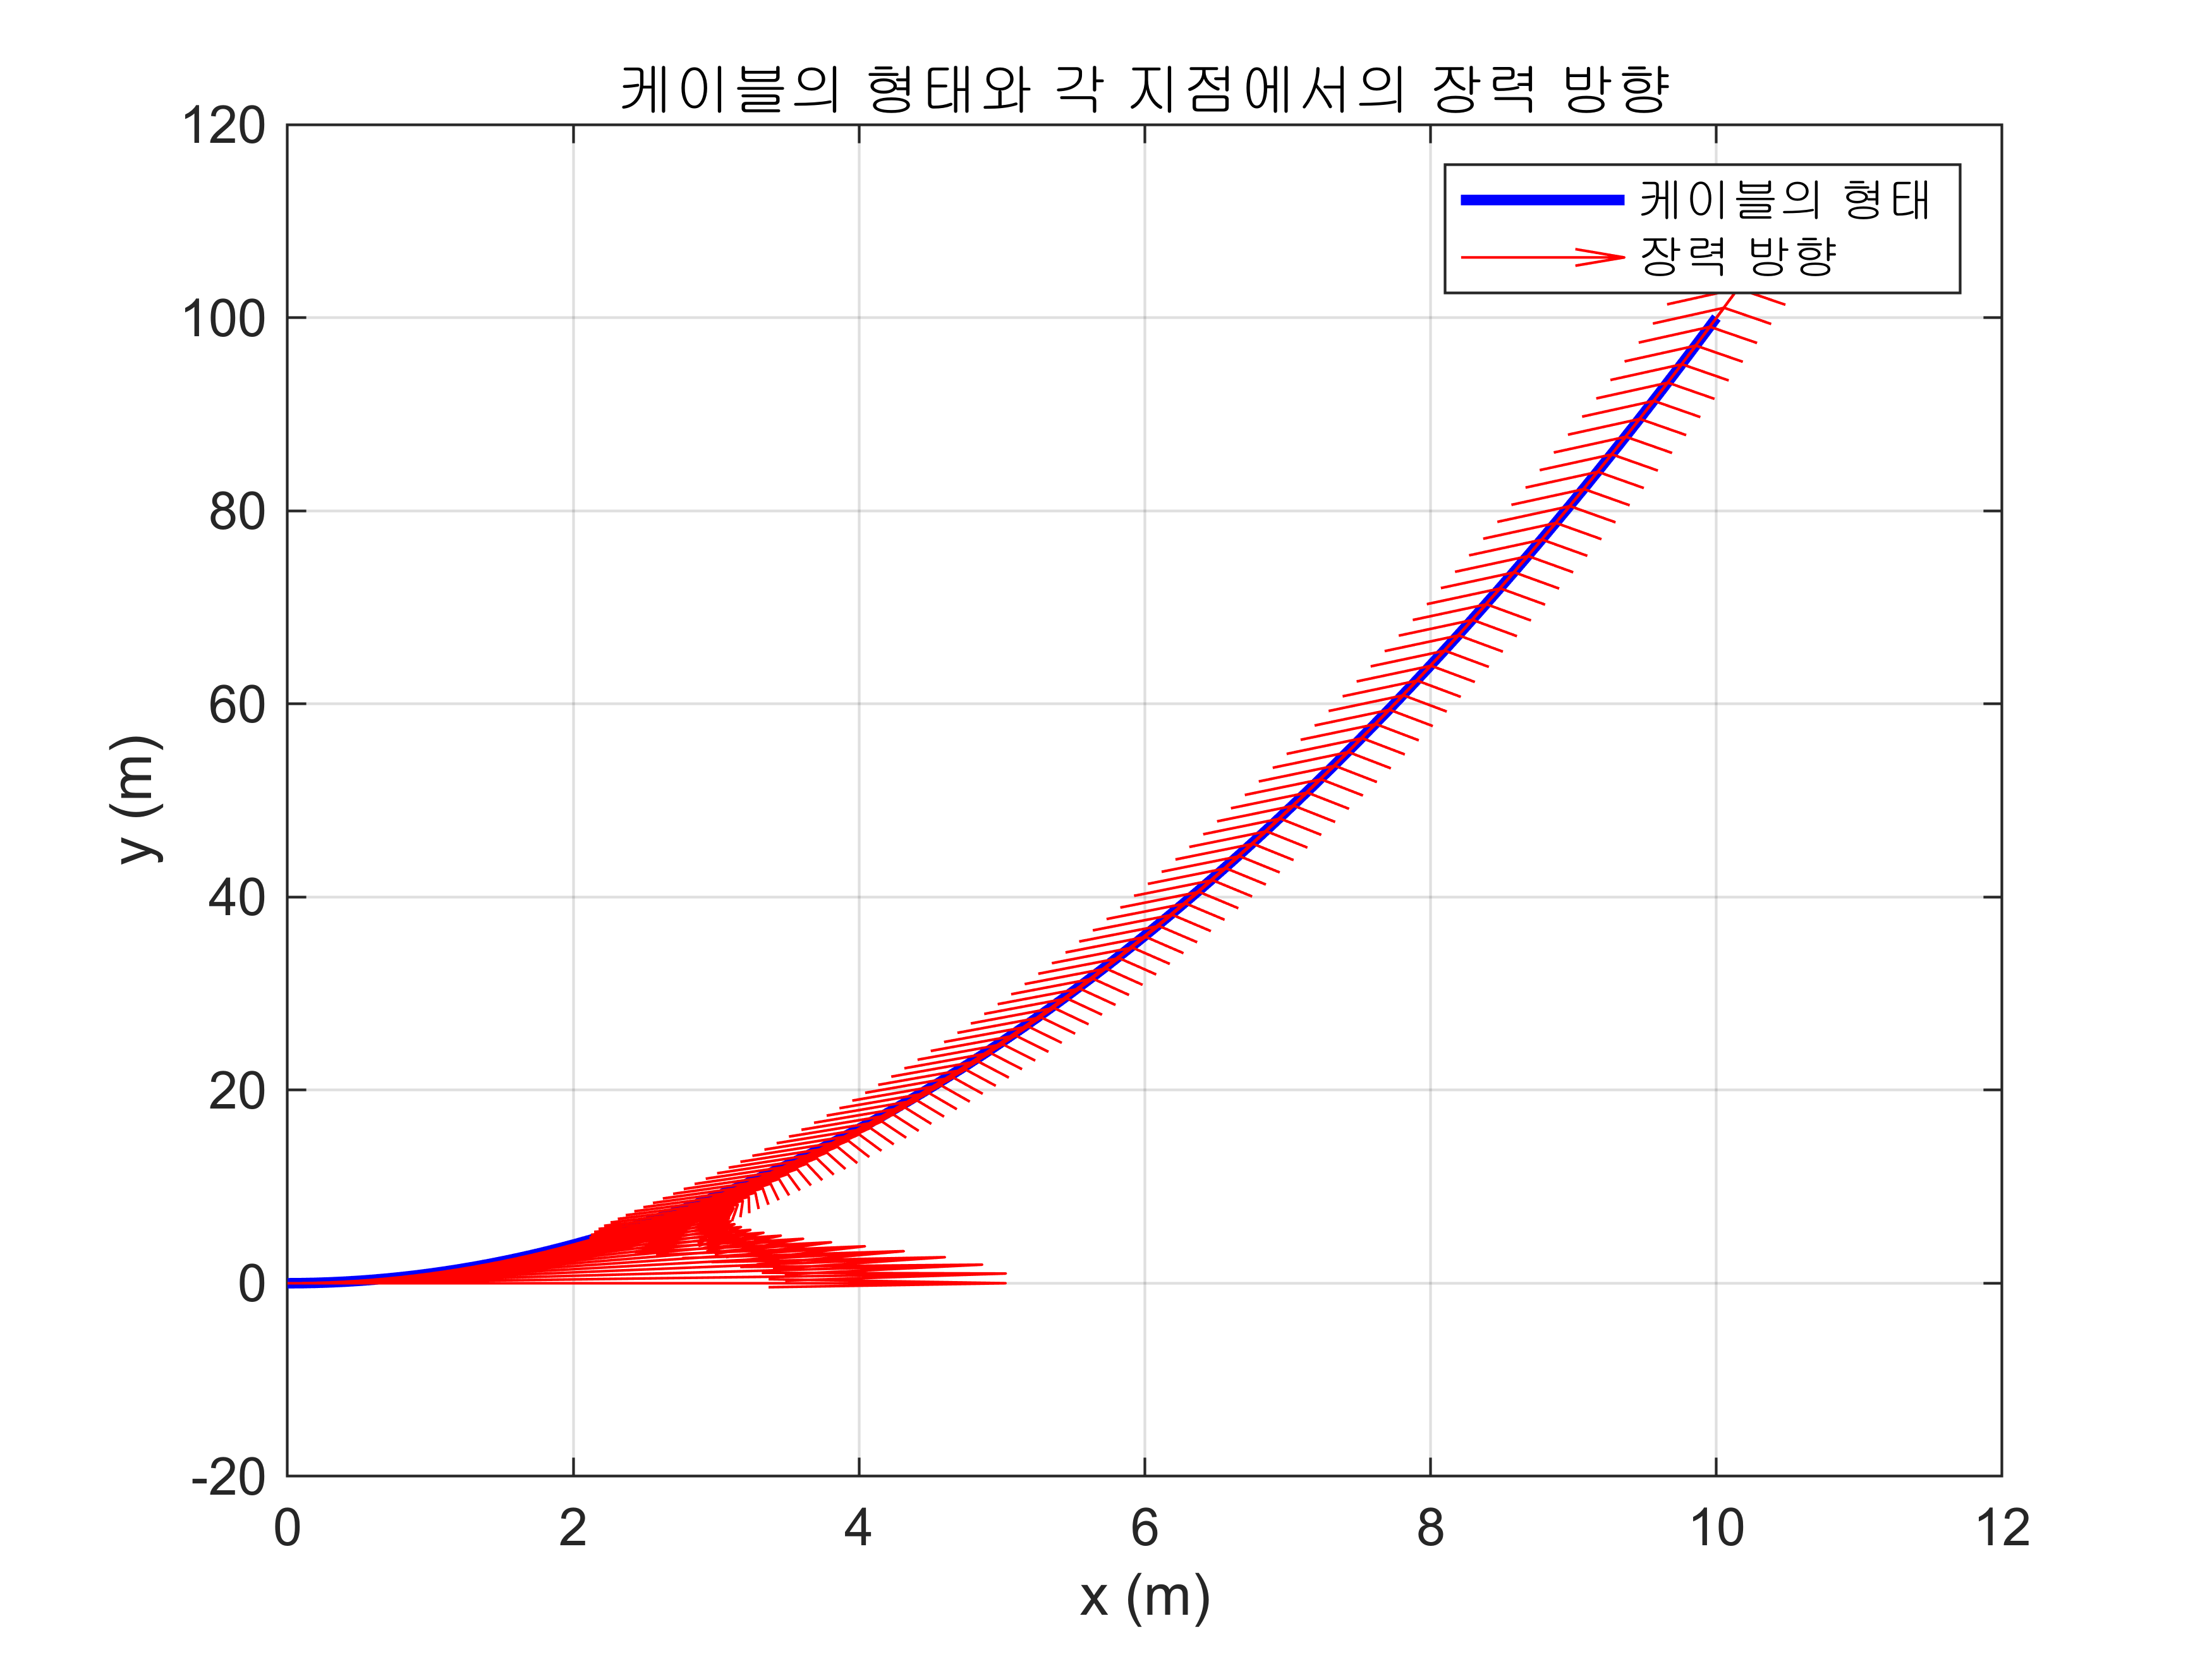

In [79]:
% 주어진 값
T0 = 500;  % 초기 장력 (N)
W = 1000;  % 분포하중 (N/m)

% x 좌표 생성 (케이블의 길이)
x = linspace(0, 10, 100);

% 케이블의 수직 변위 계산 (미분 방정식 이용)
y = (W / (2 * T0)) * x.^2;

% 각도 θ의 탄젠트와 장력 T 계산
theta_tan = W * x / T0;  % tan(θ) = W * x / T0
T = sqrt(W^2 + T0^2);    % T^2 = W^2 + T0^2

% 케이블의 형태 시각화
figure;
plot(x, y, 'b', 'LineWidth', 2);
hold on;
quiver(x, y, cos(atan(theta_tan)), sin(atan(theta_tan)), 0.5, 'r');
title('케이블의 형태와 각 지점에서의 장력 방향');
xlabel('x (m)');
ylabel('y (m)');
grid on;
legend('케이블의 형태', '장력 방향');

<p style="text-align:left">
   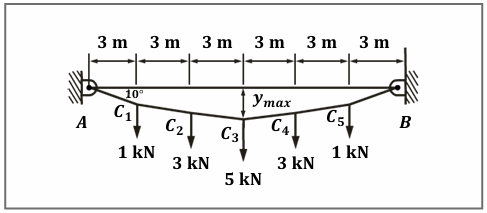
</p>


In [80]:
% 주어진 값
theta0 = 10; % 초기 변형각 (도)
P = [1, 3, 5, 3, 1]; % 각 지점에 걸리는 하중 (kN)
l = 3; % 각 구간의 길이 (m)
num_segments = length(P); % 케이블의 구간 수

% 케이블의 장력을 계산
theta0_rad = deg2rad(theta0); % 변형각을 라디안으로 변환
T = zeros(1, num_segments); % 각 구간의 장력
for i = 1:num_segments
    T(i) = P(i) / cos(theta0_rad); % 각 구간의 장력 계산
end

% 최대 처짐 계산 (간단한 형식으로 계산)
% C3에서 최대 처짐은 간단한 계산으로 근사화합니다.
y_max = max(P) * l / (2 * tan(theta0_rad));

% 결과 출력
disp('각 구간에서의 장력 (kN):');

각 구간에서의 장력 (kN):

In [81]:
disp(T);

1.0154    3.0463    5.0771    3.0463    1.0154

In [82]:
fprintf('C3 점에서의 최대 처짐: %.2f m\n', y_max);

C3 점에서의 최대 처짐: 42.53 m


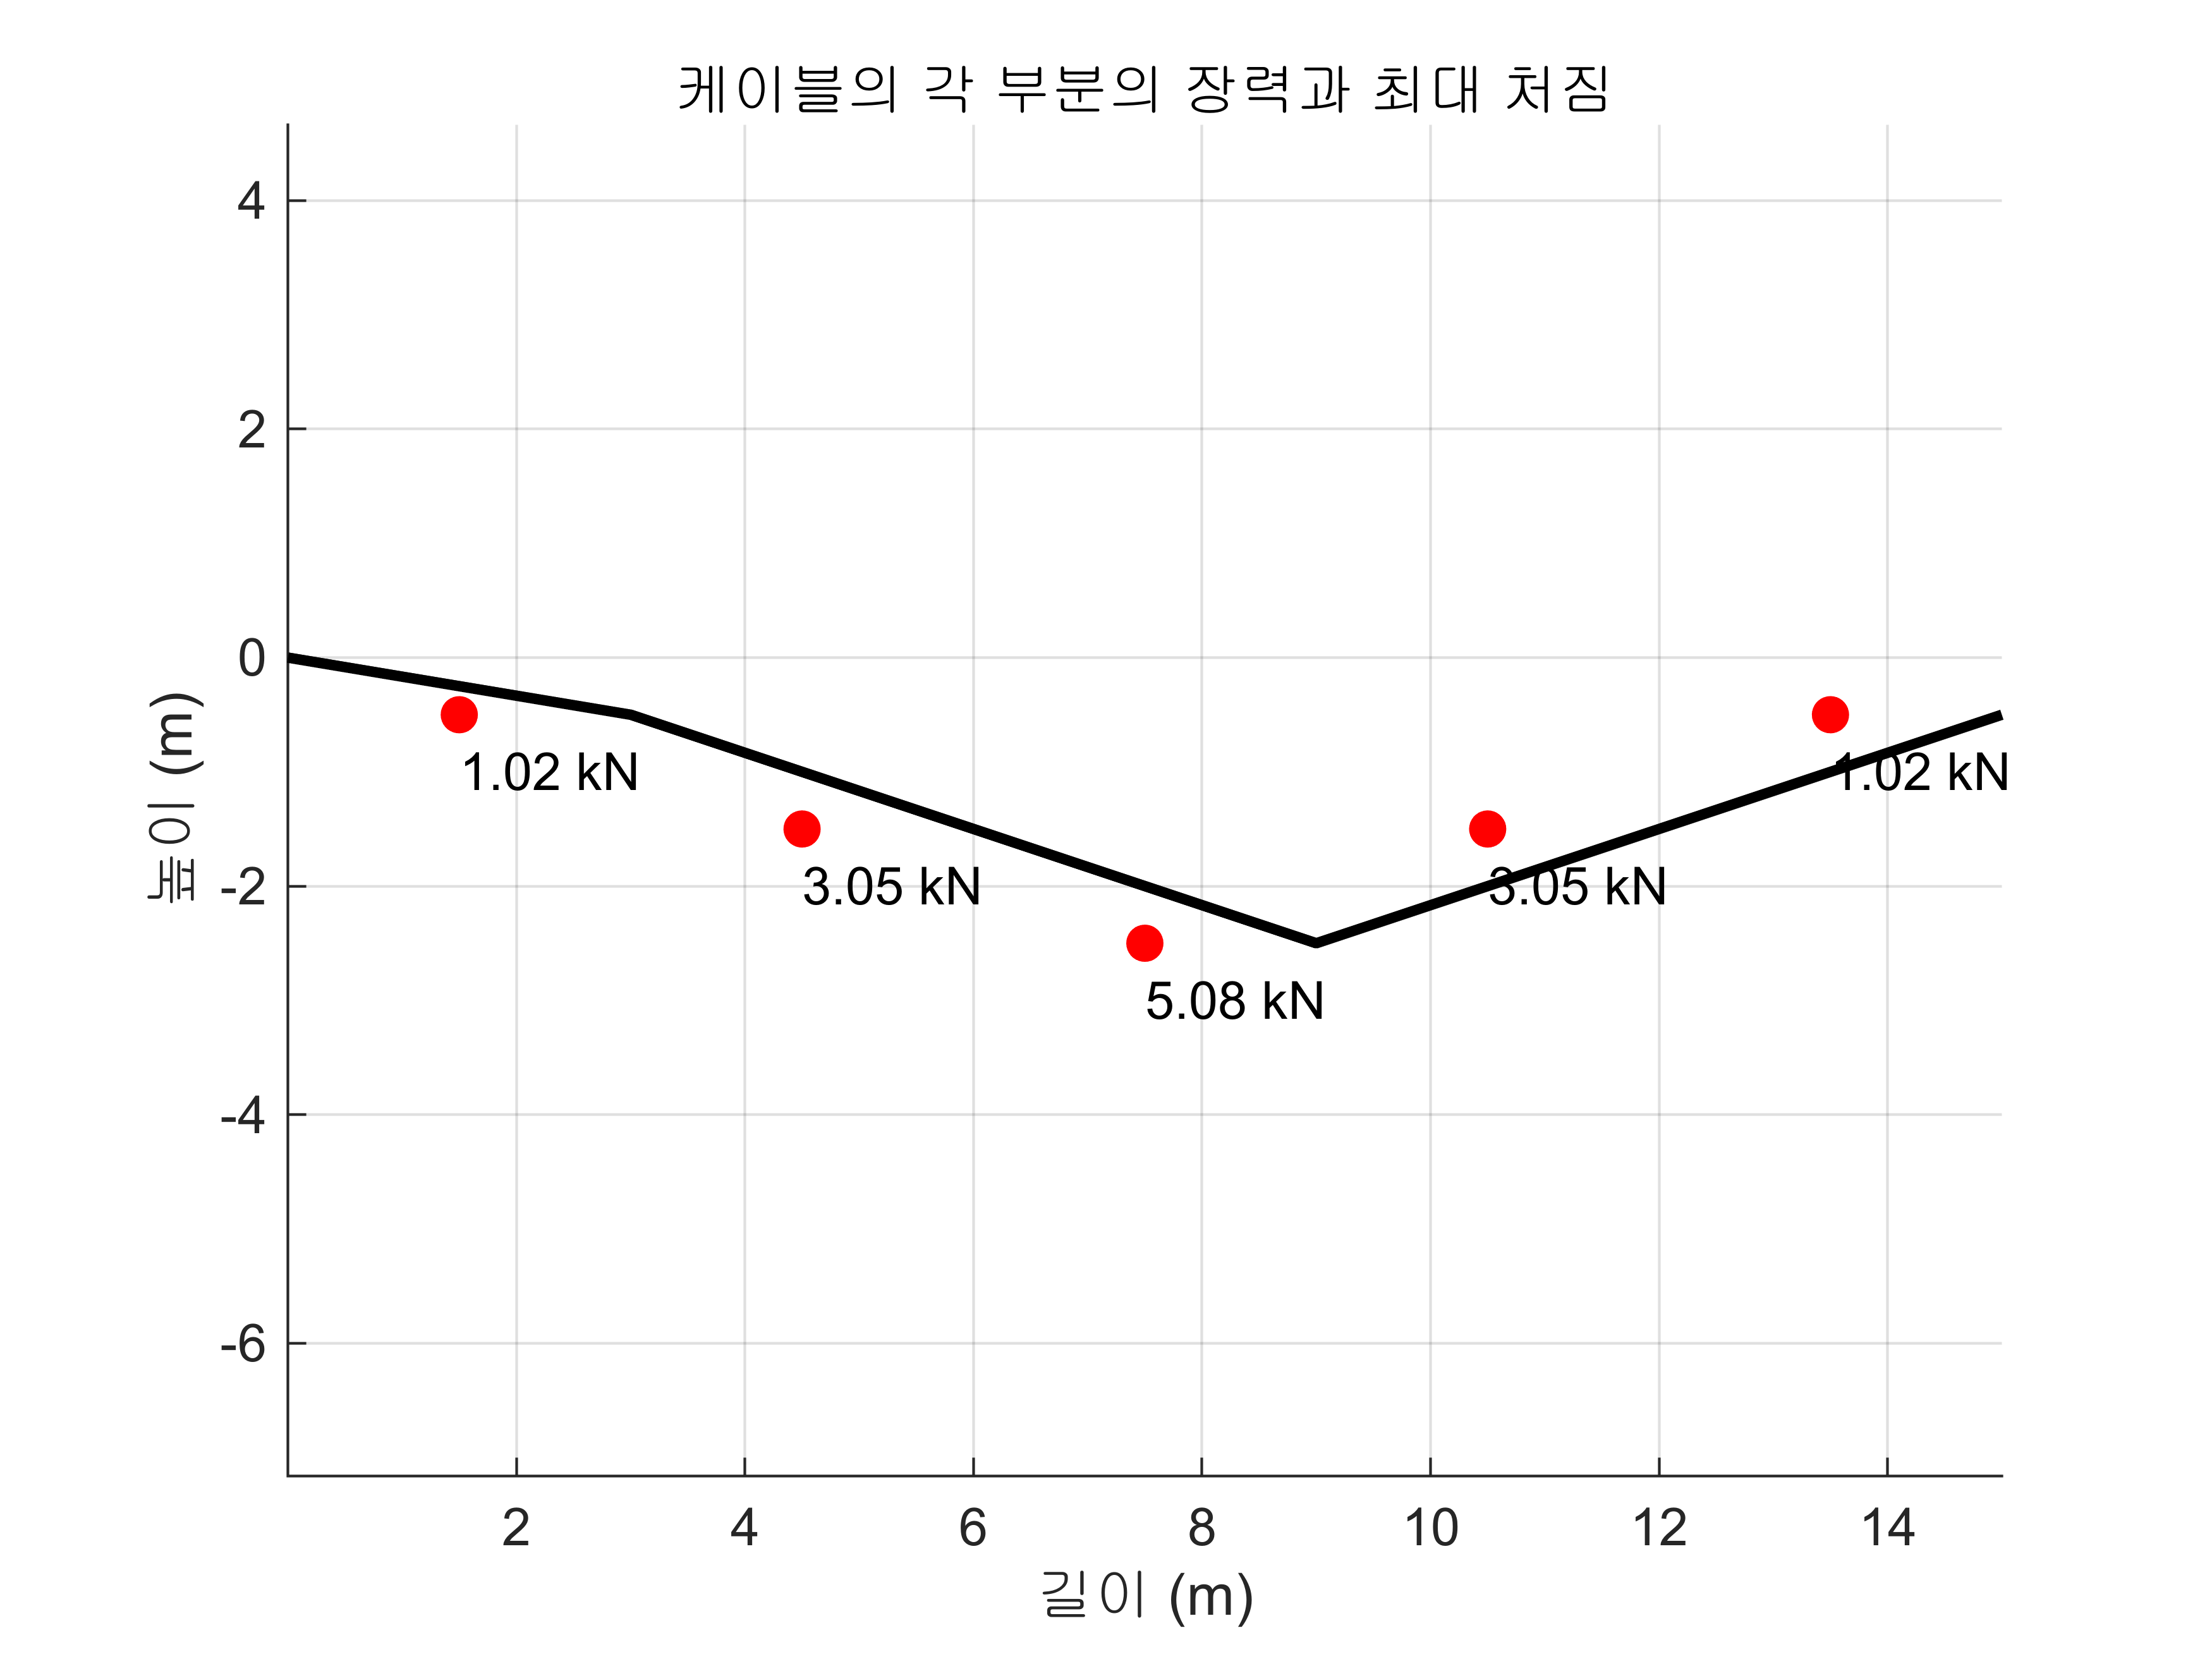

In [83]:

% 시각화
x_pos = linspace(0, l*num_segments, num_segments+1); % 케이블의 x축 위치
y_pos = -P * 0.5; % 각 지점의 y축 위치 (하중에 따른)
figure;
hold on;
plot(x_pos, [0, y_pos], 'k', 'LineWidth', 2); % 케이블의 형상
scatter(x_pos(2:end) - l/2, y_pos, 50, 'r', 'filled'); % 하중 위치
text(x_pos(2:end) - l/2, y_pos - 0.5, arrayfun(@(x) sprintf('%.2f kN', x), T, 'UniformOutput', false));
title('케이블의 각 부분의 장력과 최대 처짐');
xlabel('길이 (m)');
ylabel('높이 (m)');
grid on;
axis equal;
hold off;


<p style="text-align:left">
   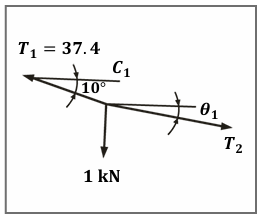
</p>


In [84]:
% 초기 각도 및 첫 구간의 장력
theta0 = 10; % 첫 변형각 (도)
T1 = 37.4; % 첫 구간의 장력 (kN)
P1 = 1; % 첫 하중 (kN)

% 기호 변수 선언
syms T2 theta1

% 수평 방향 및 수직 방향의 평형 방정식
eq1 = -T1 * cosd(theta0) + T2 * cosd(theta1) == 0;
eq2 = T1 * sind(theta0) - P1 - T2 * sind(theta1) == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [T2, theta1]);

% 결과 가져오기
T2_val = double(sol.T2);
theta1_val = double(sol.theta1);

% 결과 출력
fprintf('두 번째 구간의 장력 T2: %.2f kN\n', T2_val);

두 번째 구간의 장력 T2: 37.24 kN
두 번째 구간의 장력 T2: -37.24 kN

In [85]:
fprintf('각도 θ1: %.2f 도\n', theta1_val);

각도 θ1: 8.48 도
각도 θ1: -171.52 도

In [86]:

% 계산된 값 검증
T2_sin_theta1 = T1 * sind(theta0) - P1;
theta1_tan = T2_sin_theta1 / T2_val;
theta1_computed = atand(theta1_tan);

fprintf('검증된 θ1: %.2f 도\n', theta1_computed);

검증된 θ1: 8.39 도
검증된 θ1: 0.00 도

In [87]:
fprintf('T2 * sin(θ1): %.2f kN\n', T2_sin_theta1);

T2 * sin(θ1): 5.49 kN

In [88]:
% 두 번째 구간에서 얻은 값
theta1 = 8.5; % 두 번째 구간 각도 (도)
T2 = 37.2; % 두 번째 구간 장력 (kN)
P2 = 3; % 두 번째 구간 하중 (kN)

% 기호 변수 선언
syms T3 theta2

% 수평 방향 및 수직 방향의 평형 방정식
eq1 = -T2 * cosd(theta1) + T3 * cosd(theta2) == 0;
eq2 = T2 * sind(theta1) - P2 - T3 * sind(theta2) == 0;

% 방정식 풀기
sol = solve([eq1, eq2], [T3, theta2]);

% 결과 가져오기
T3_val = double(sol.T3);
theta2_val = double(sol.theta2);

% 결과 출력
fprintf('세 번째 구간의 장력 T3: %.2f kN\n', T3_val);

세 번째 구간의 장력 T3: 36.88 kN
세 번째 구간의 장력 T3: -36.88 kN

In [89]:
fprintf('각도 θ2: %.2f 도\n', theta2_val);

각도 θ2: 3.89 도
각도 θ2: -176.11 도

In [90]:

% 계산된 값 검증
T3_sin_theta2 = T2 * sind(theta1) - P2;
theta2_tan = T3_sin_theta2 / T3_val;
theta2_computed = atand(theta2_tan);

fprintf('검증된 θ2: %.2f 도\n', theta2_computed);

검증된 θ2: 3.88 도
검증된 θ2: 0.00 도

In [91]:
fprintf('T3 * sin(θ2): %.2f kN\n', T3_sin_theta2);

T3 * sin(θ2): 2.50 kN


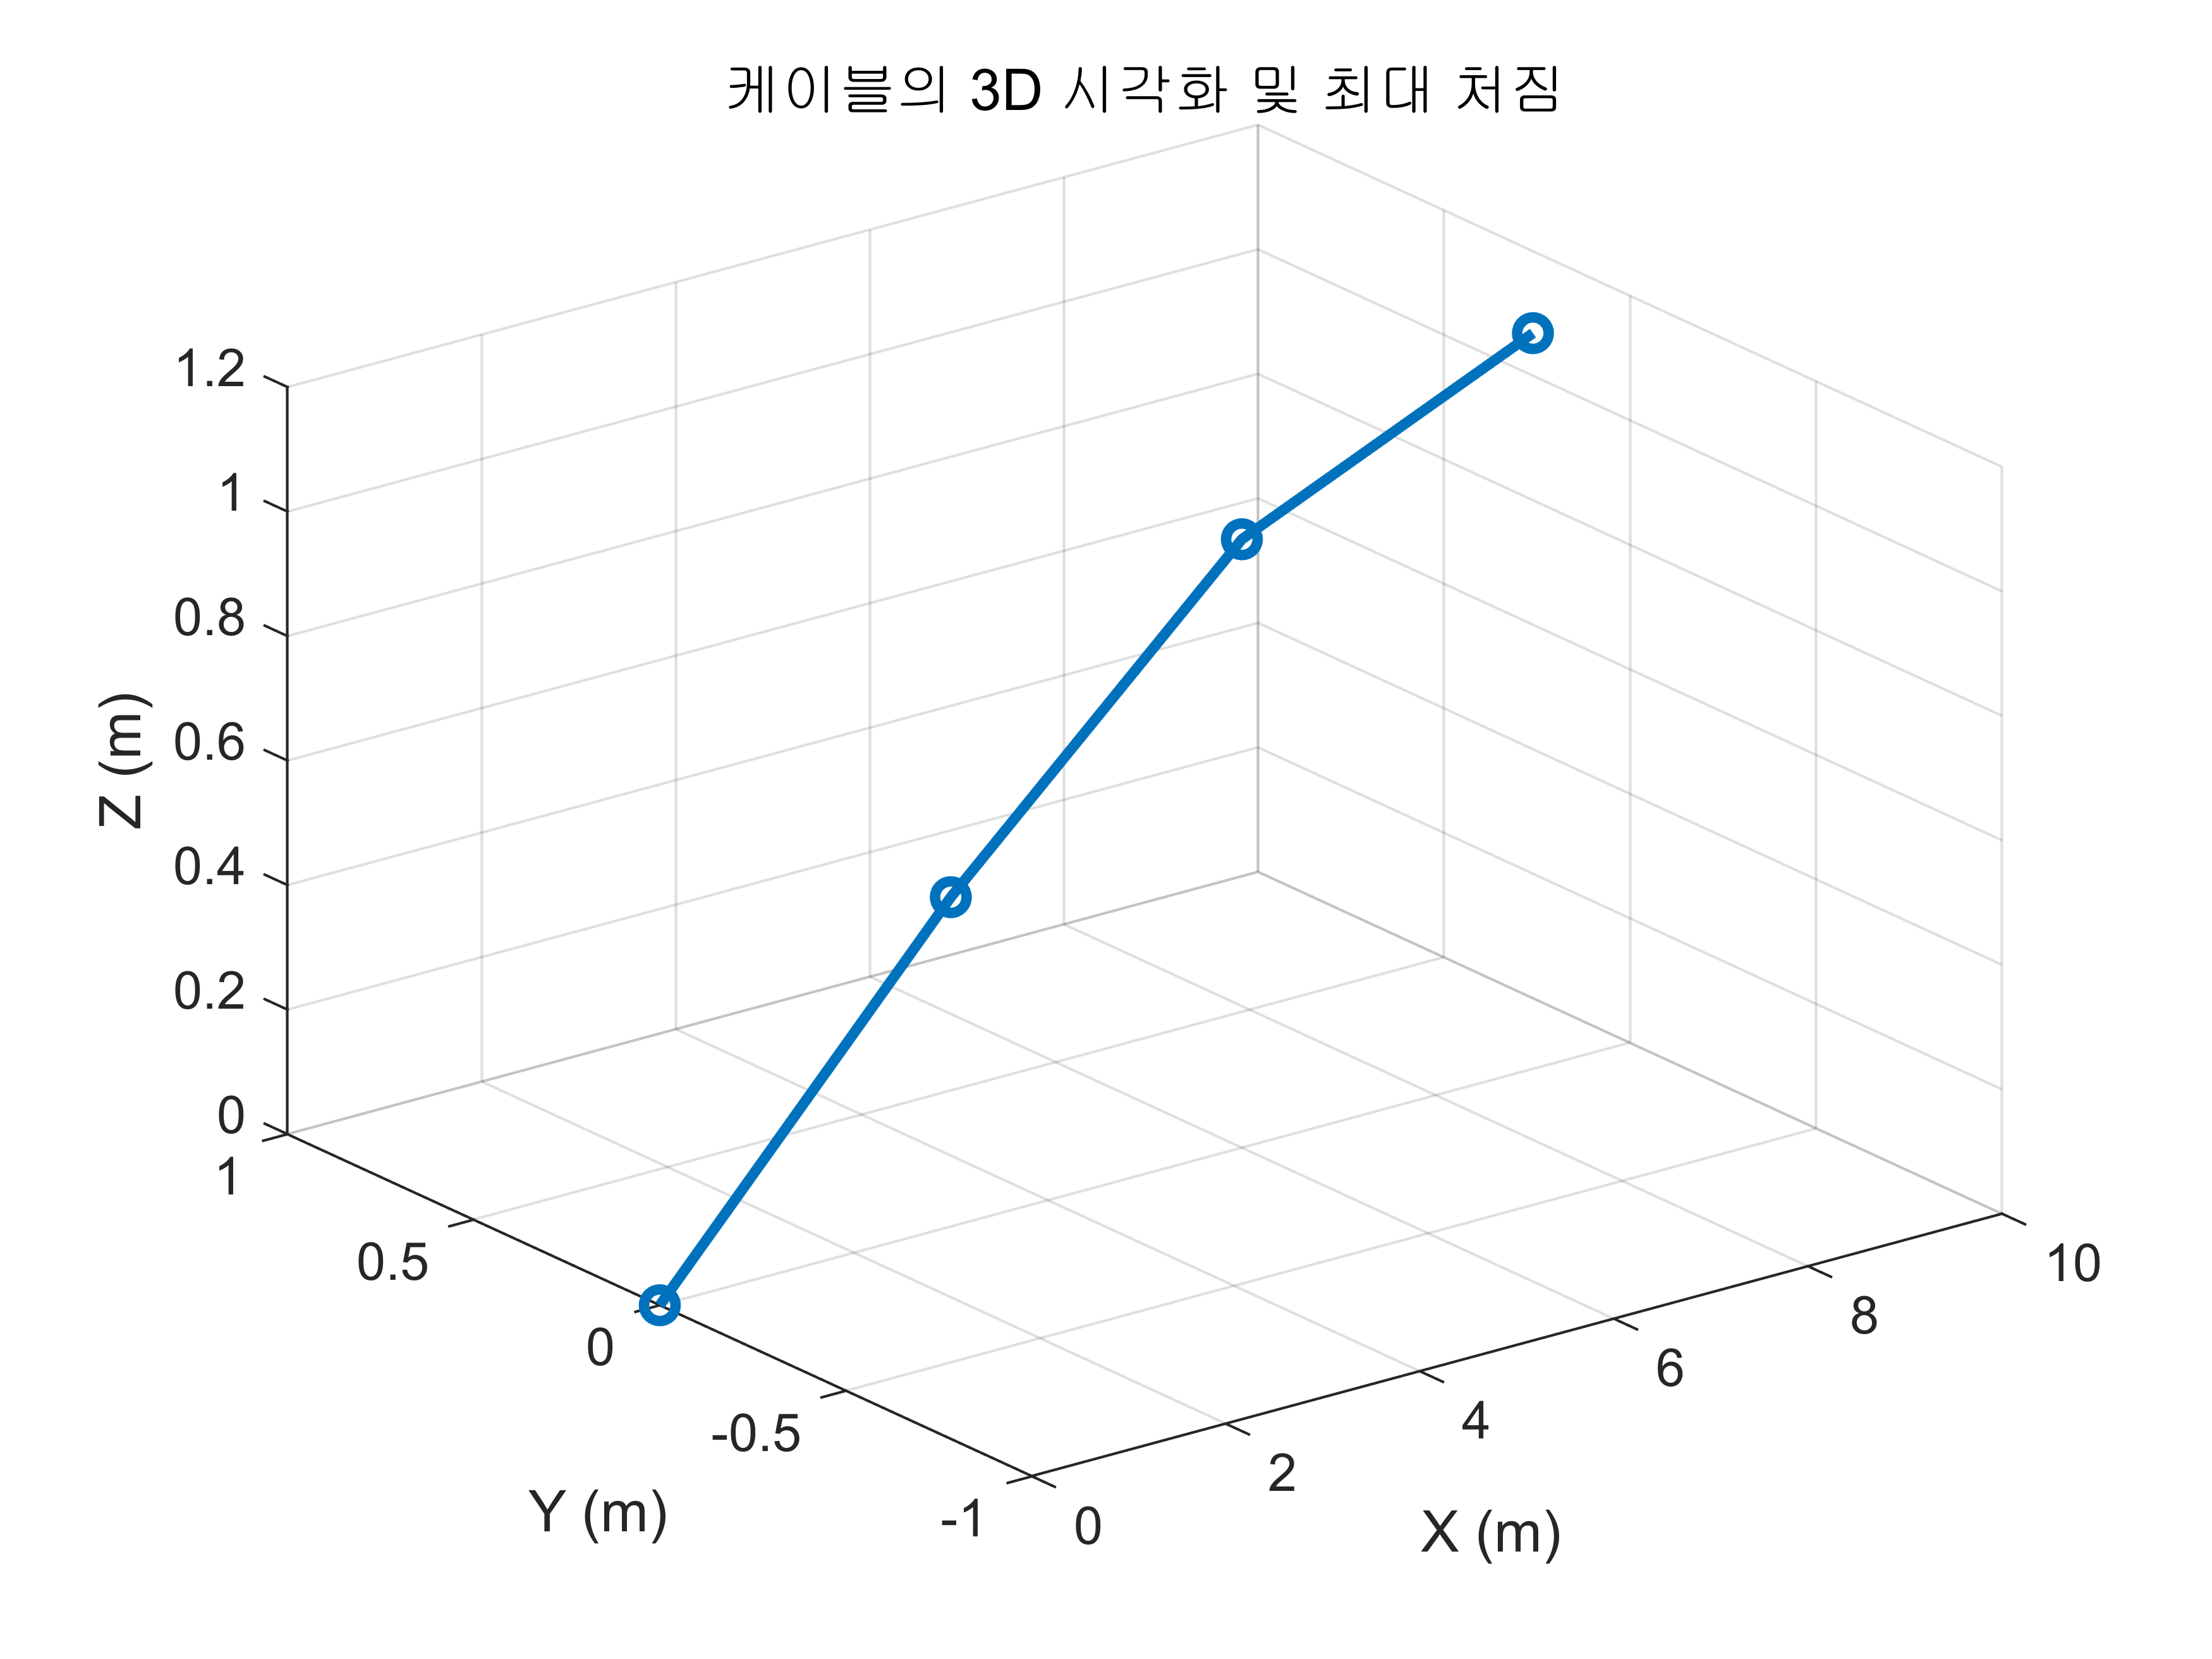

In [92]:

% 케이블의 각 구간에 대한 각도 및 장력
theta1 = 10; % 첫 번째 구간 각도 (deg)
theta2 = 8.5; % 두 번째 구간 각도 (deg)
theta3 = 3.9; % 세 번째 구간 각도 (deg)
T1 = 37.4; % 첫 번째 구간 장력 (kN)
T2 = 37.2; % 두 번째 구간 장력 (kN)
T3 = 36.9; % 세 번째 구간 장력 (kN)

% 각 구간의 길이 (m)
span = 3; % 각 구간의 길이

% x, y 좌표 계산
x = [0, span, 2*span, 3*span];
y = [0, span*tand(theta1), span*(tand(theta1) + tand(theta2)), span*(tand(theta1) + tand(theta2) + tand(theta3))];

% 3D 플롯 생성
figure;
plot3(x, [0, 0, 0, 0], y, '-o', 'LineWidth', 2); % 케이블 시각화
xlabel('X (m)');
ylabel('Y (m)');
zlabel('Z (m)');
title('케이블의 3D 시각화 및 최대 처짐');
grid on;

In [93]:

% 최대 처짐
y_max = span * tand(theta1) + span * tand(theta2) + span * tand(theta3);
fprintf('케이블의 최대 처짐 y_max: %.2f m\n', y_max);

케이블의 최대 처짐 y_max: 1.18 m

## 경제적 내용연수 산출방법
1.  **Y축:** 비용(원)을 나타냅니다.
2. **X축:** 경제연수(년)를 나타냅니다.
3. **그래프 곡선:**

-  **유지 비용:** 시간이 지남에 따라 증가하는 경향을 보여주는 곡선입니다.
-  **감가 상각비:** 시간이 지남에 따라 감소하는 경향을 보여주는 곡선입니다.
-  **총 비용 곡선:** 유지 비용과 감가 상각비를 합한 총 비용의 변화입니다.
-  두 곡선이 교차하는 지점이 **최적 경제수명**을 나타냅니다.

-  자산의 **유지 비용**은 시간이 지남에 따라 증가하고, 자산의 **감가 상각비**는 시간이 지남에 따라 감소합니다.
-  이 두 비용의 합이 가장 작아지는 시점이 **경제적 내용연수**입니다.
-  이 시점에서 자산을 교체하거나 폐기하는 것이 가장 비용 효율적입니다.


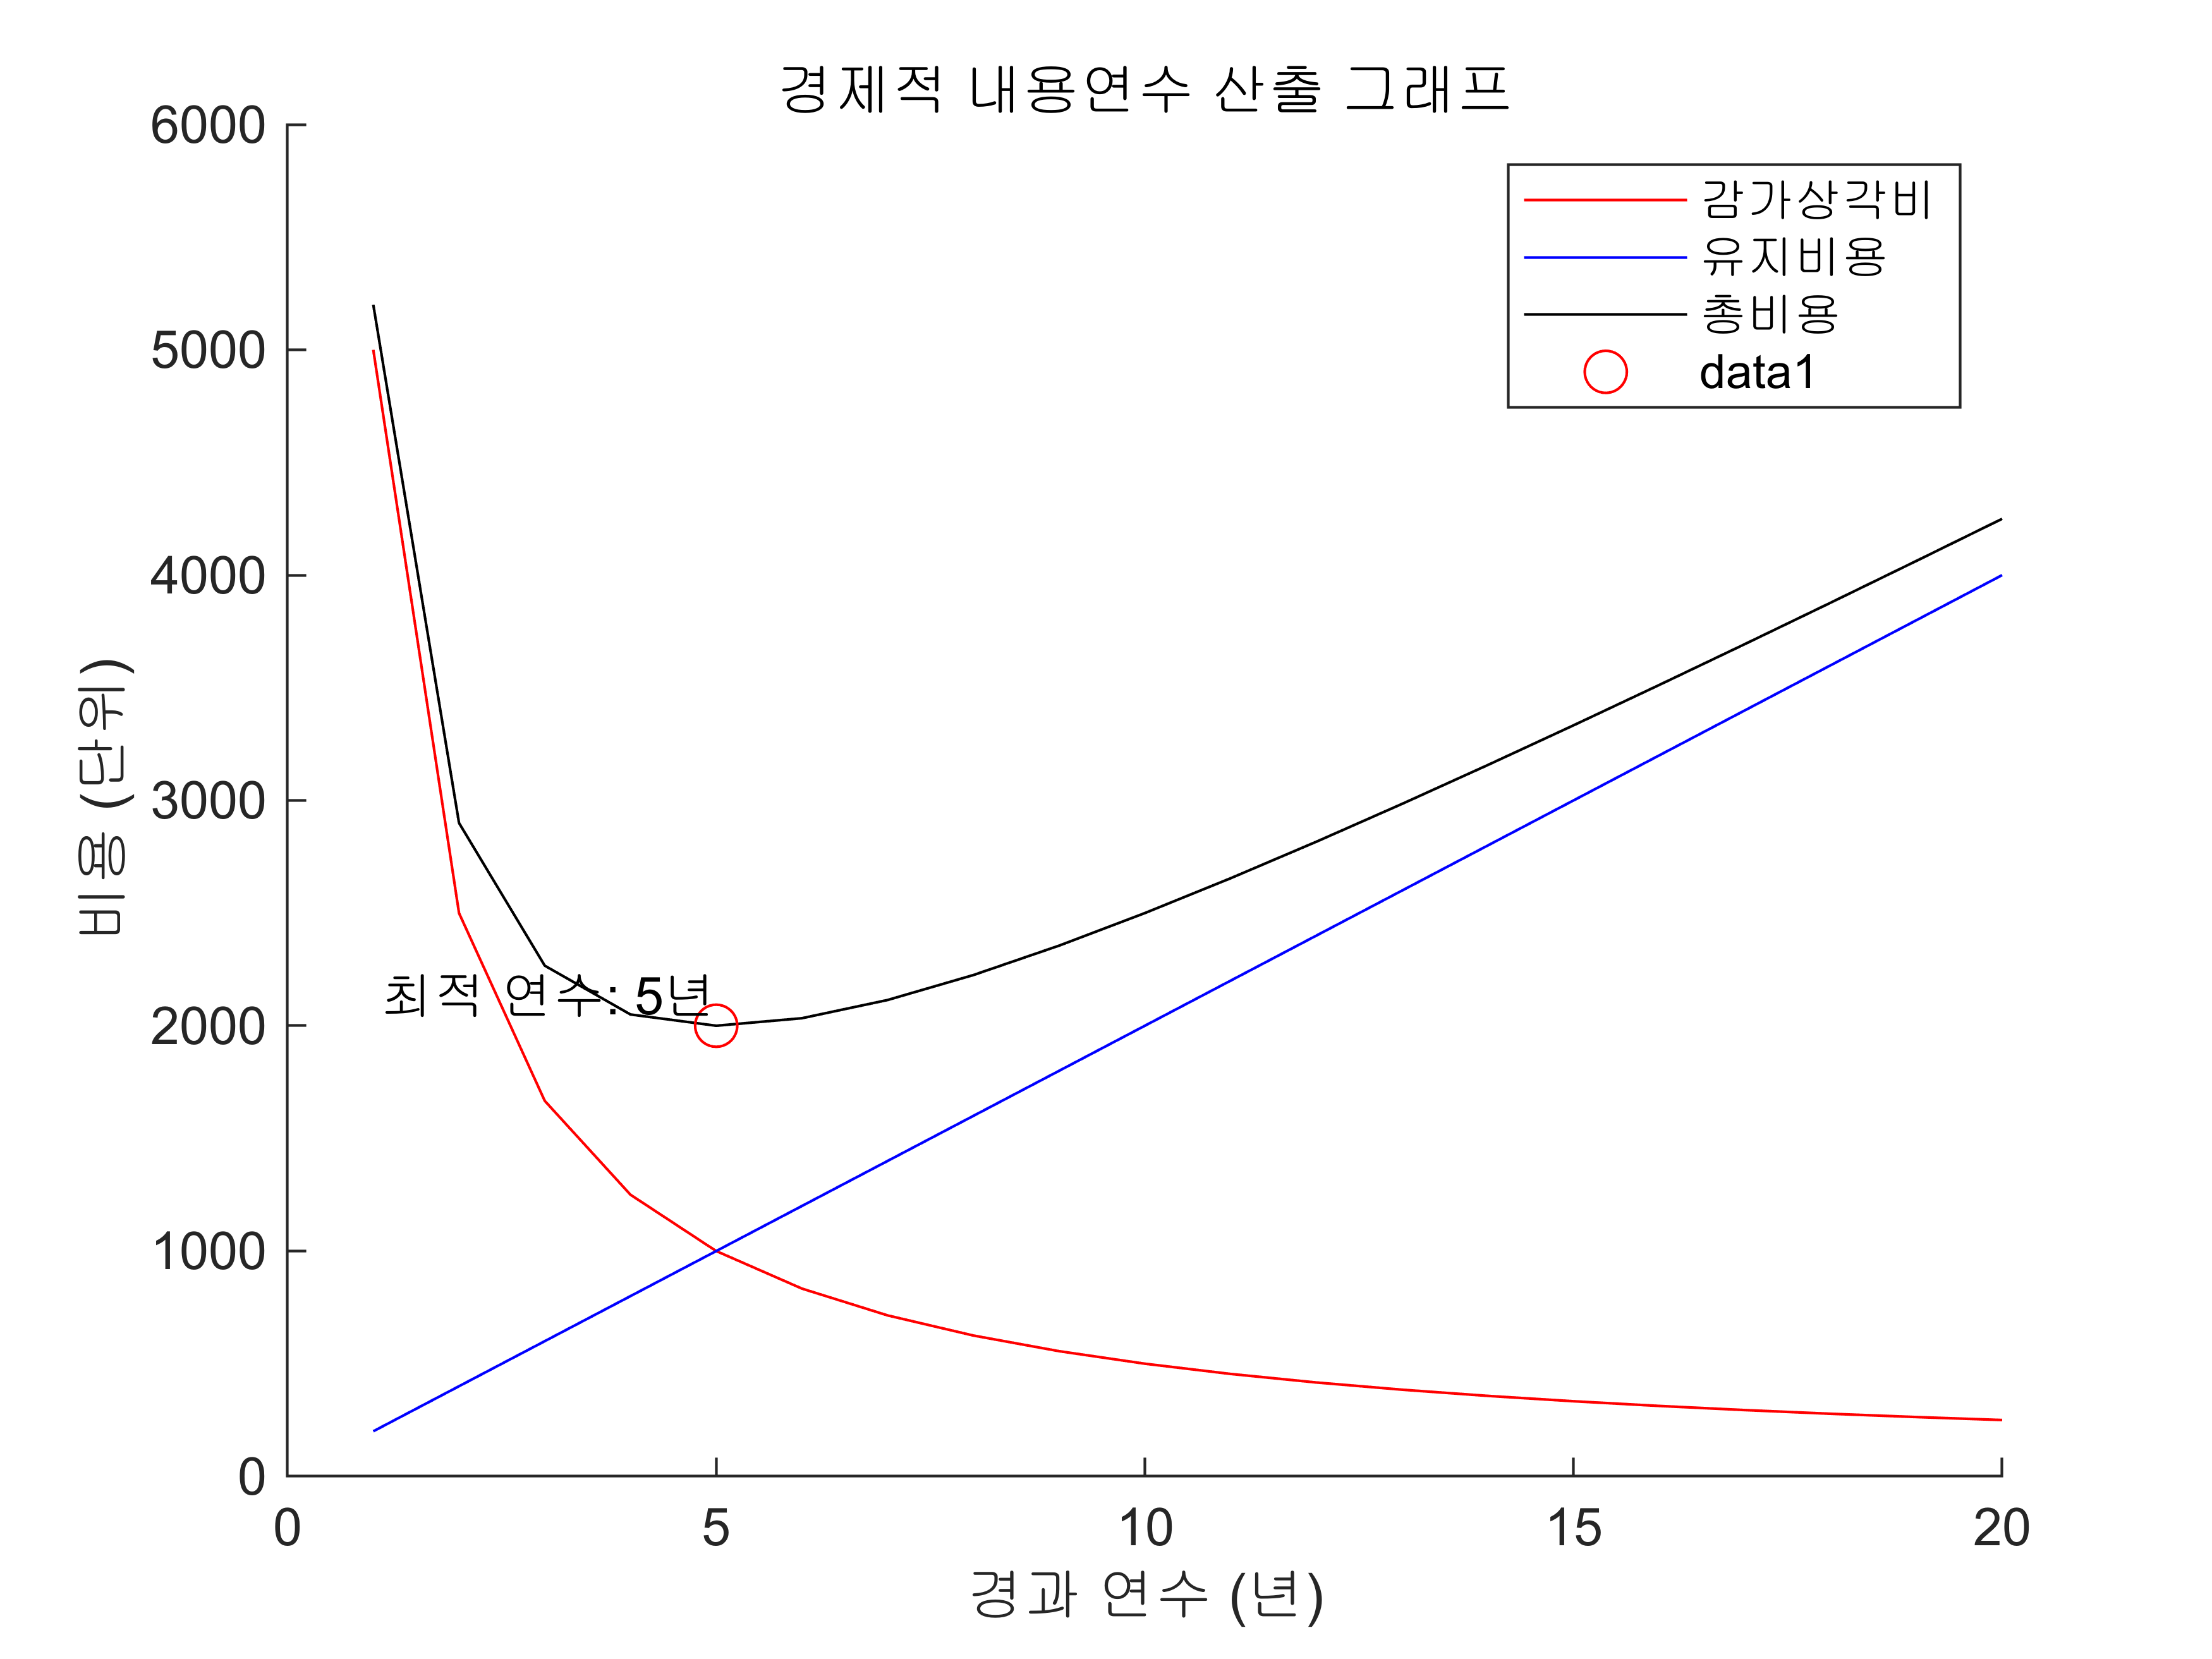

In [94]:
% 경과 연수 (X축)
n = 1:20; % 내용연수 1년부터 20년까지

% 감가상각비와 유지비용을 모델링
depreciation_cost = 5000 ./ n; % 예시 감가상각비 (연수 증가에 따라 감소)
maintenance_cost = 200 * n; % 예시 유지비용 (연수 증가에 따라 증가)

% 총비용 계산
total_cost = depreciation_cost + maintenance_cost;

% 그래프 그리기
figure;
hold on;
plot(n, depreciation_cost, '-r', 'DisplayName', '감가상각비');
plot(n, maintenance_cost, '-b', 'DisplayName', '유지비용');
plot(n, total_cost, '-k', 'DisplayName', '총비용');
xlabel('경과 연수 (년)');
ylabel('비용 (단위)');
legend;
title('경제적 내용연수 산출 그래프');

% 총비용이 최소가 되는 지점 표시
[~, optimal_index] = min(total_cost);
optimal_n = n(optimal_index);
optimal_cost = total_cost(optimal_index);
plot(optimal_n, optimal_cost, 'ro', 'MarkerSize', 8);
text(optimal_n, optimal_cost, sprintf(' 최적 연수: %d년', optimal_n), 'VerticalAlignment', 'bottom', 'HorizontalAlignment', 'right');
hold off;


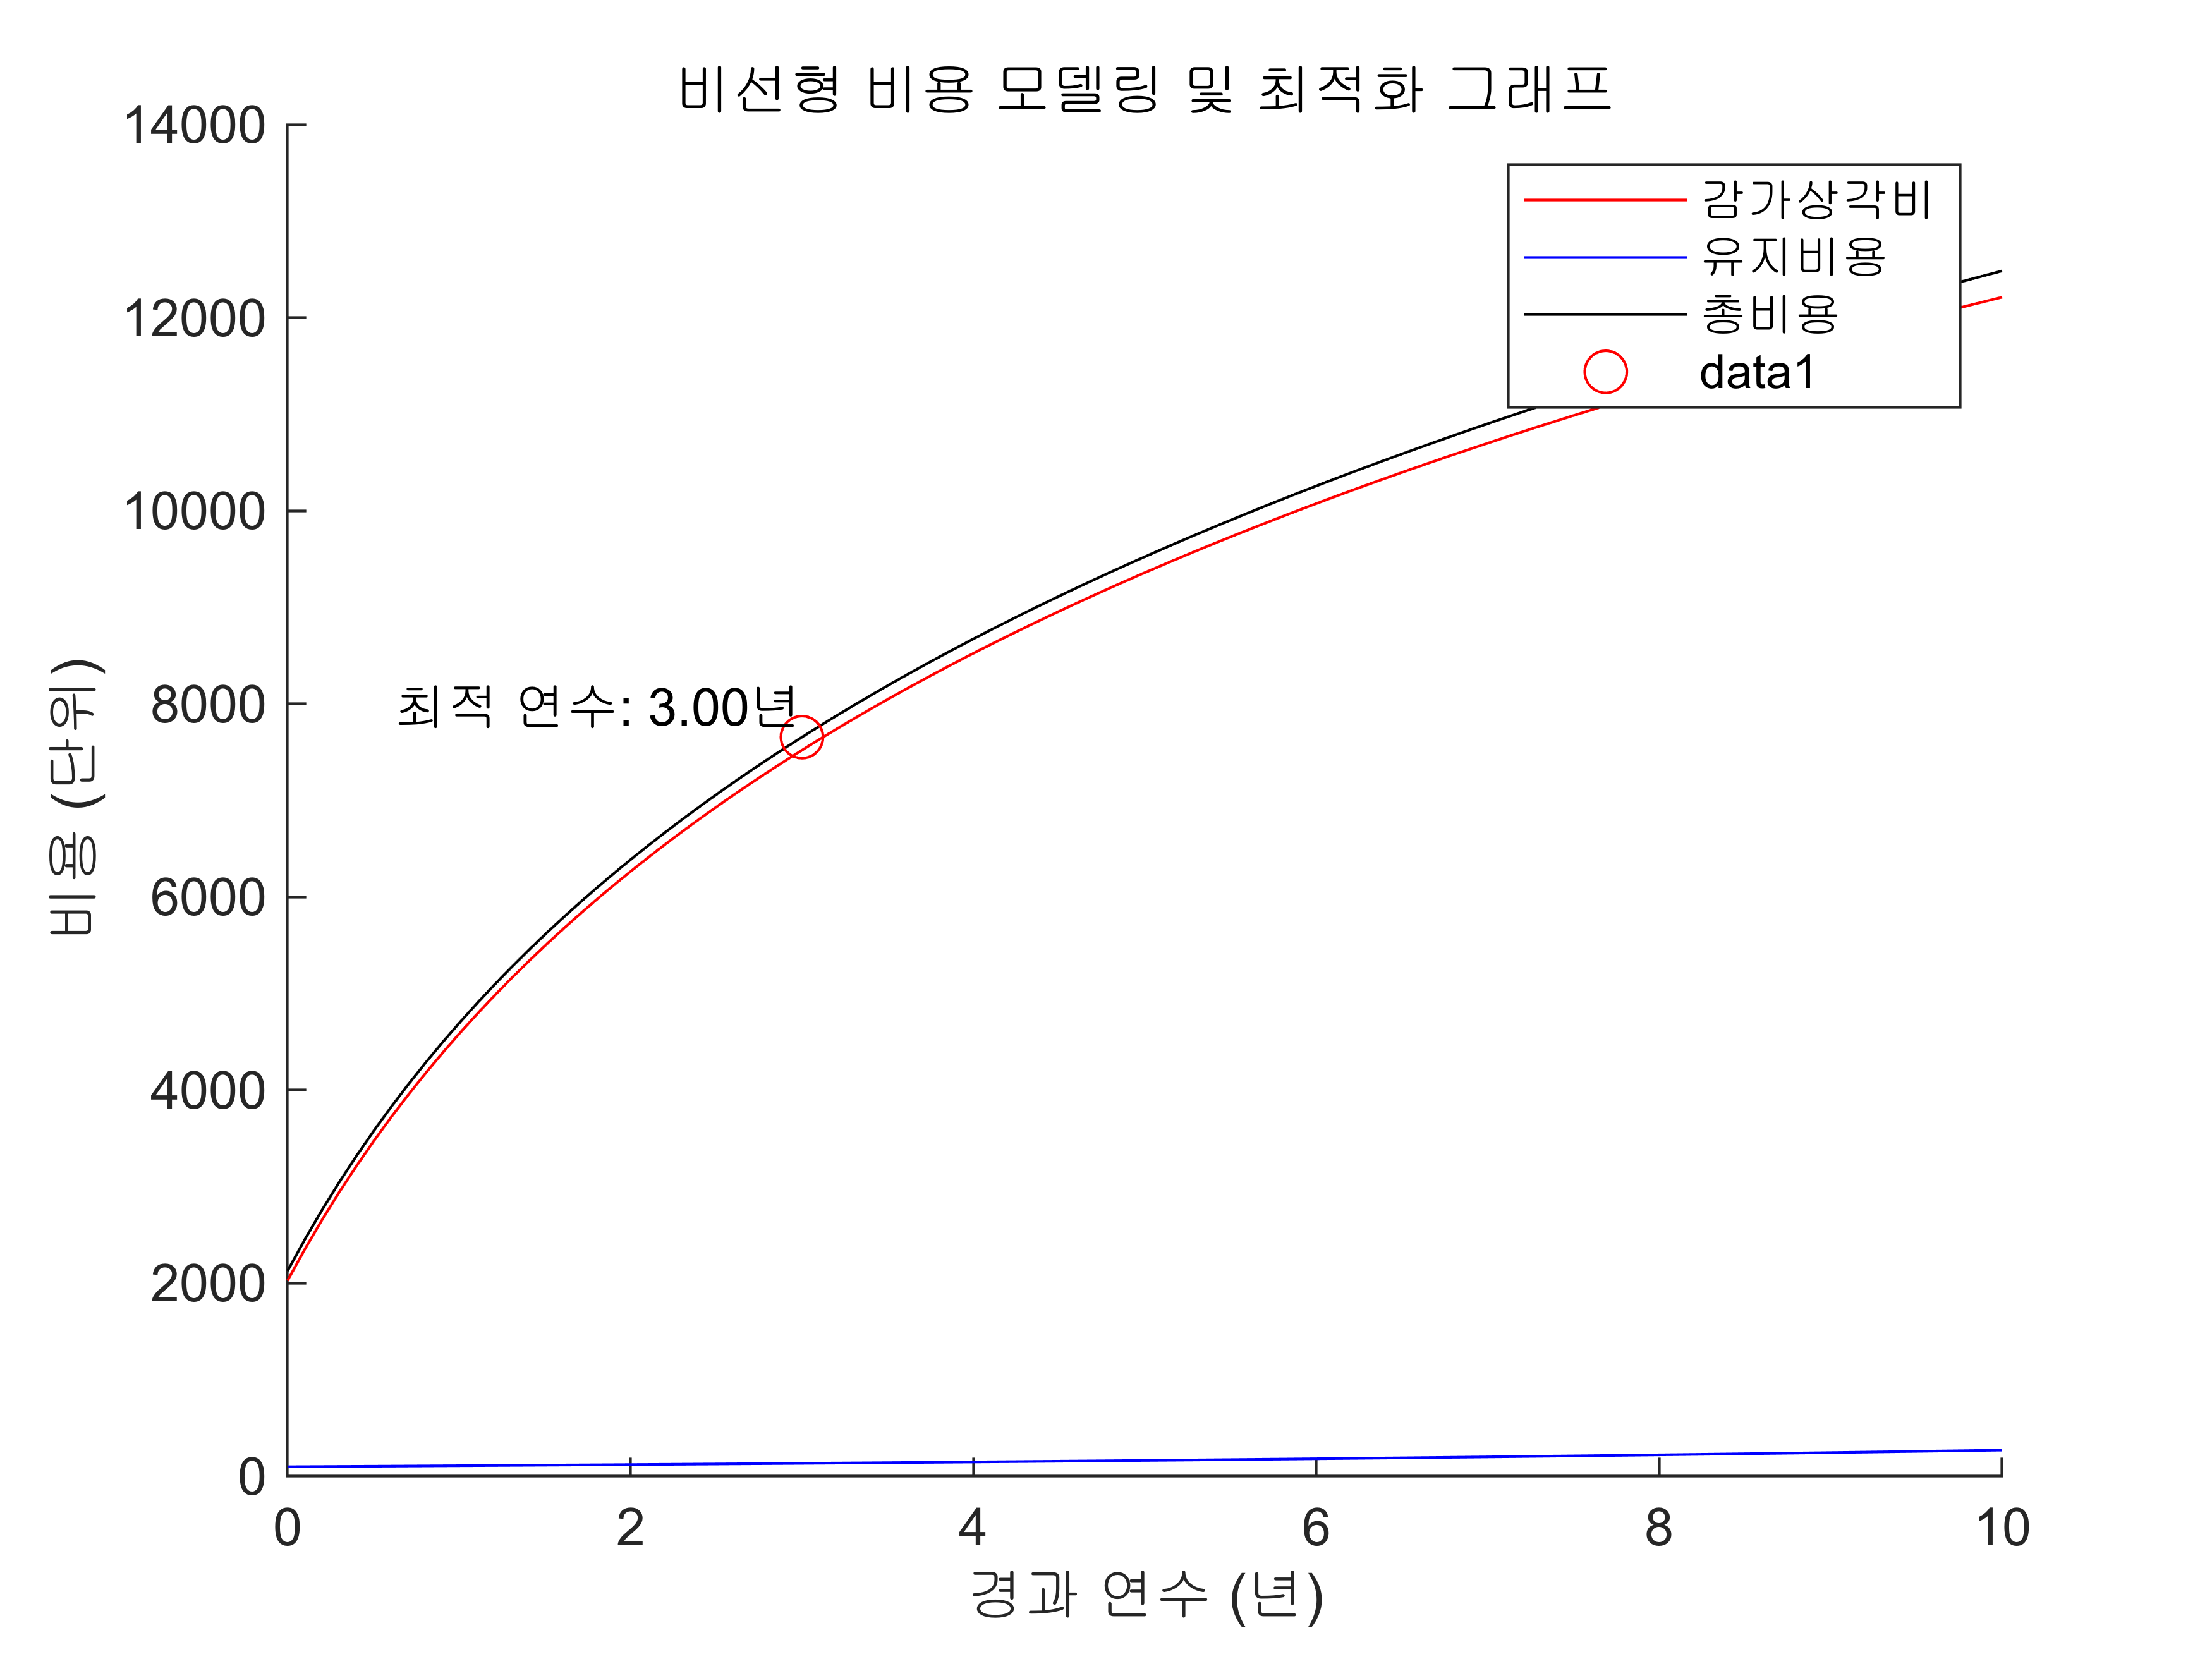

In [95]:
% 총비용의 함수 정의
depreciation_cost_func = @(x) 5000 * log(1.5 + x);
maintenance_cost_func = @(x) 100 * exp(0.1 * x);
total_cost_func = @(x) depreciation_cost_func(x) + maintenance_cost_func(x);

% fminbnd를 사용하여 최소 지점 찾기 (0 ~ 10 사이의 범위에서)
[optimal_n, optimal_cost] = fminbnd(total_cost_func, 3, 10);

% 비용 함수를 평가할 연수 범위
n = linspace(0, 10, 100);
depreciation_cost = 5000 * log(1.5 + n);
maintenance_cost = 100 * exp(0.1 * n);
total_cost = depreciation_cost + maintenance_cost;

% 그래프 그리기
figure;
hold on;
plot(n, depreciation_cost, '-r', 'DisplayName', '감가상각비');
plot(n, maintenance_cost, '-b', 'DisplayName', '유지비용');
plot(n, total_cost, '-k', 'DisplayName', '총비용');
xlabel('경과 연수 (년)');
ylabel('비용 (단위)');
legend;
title('비선형 비용 모델링 및 최적화 그래프');

% 최적 지점 표시
plot(optimal_n, optimal_cost, 'ro', 'MarkerSize', 8);
text(optimal_n, optimal_cost, sprintf(' 최적 연수: %.2f년', optimal_n), 'VerticalAlignment', 'bottom', 'HorizontalAlignment', 'right');
hold off;

In [96]:

% 결과 출력
fprintf('최적 연수: %.2f년\n', optimal_n);

최적 연수: 3.00년

In [97]:
fprintf('최소 총비용: %.2f 단위\n', optimal_cost);

최소 총비용: 7655.41 단위




!!!EndOutputRegion!!!